# **Optimisers With Early stopping and Learning rate reduction**

In [41]:
!pip install soundfile

In [18]:
import matplotlib.pyplot as plt

In [19]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
#DataFlair - Emotions in the RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "disgust",
    "08": "ps"
}

# Define the emotions available in all datasets
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy",
    "fear",
    "disgust",
    "ps"
    
}

In [21]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result


In [22]:
# Function to load data from multiple datasets
def load_data(data_paths, test_size=0.2):
    X, y = [], []
    for data_path in data_paths:
        for file in glob.glob(os.path.join(data_path, "*.wav")):
            # get the base name of the audio file
            basename = os.path.basename(file)
            # print the file name for debugging
            print("Processing file:", basename)
            
            # Dynamically identify the emotion label from the file name
            emotion = None
            for label in int2emotion.values():
                if label.lower() in basename.lower():
                    emotion = label
                    break
            
            # If emotion is not found, skip the file
            if emotion is None:
                print("Error extracting emotion from:", basename)
                continue
            
            # we allow only AVAILABLE_EMOTIONS we set
            if emotion not in AVAILABLE_EMOTIONS:
                continue
            
            # extract speech features
            features = extract_feature(file, mfcc=True, chroma=True, mel=True)
            # add to data
            X.append(features)
            l={'angry':1,'sad':2,'neutral':3,'happy':4,'fear':5,'disgust':6,'ps':7}
            y.append(l[emotion])
    
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [23]:
data_paths = [
    "C:\\Users\\\Desktop\\Train data\\Ravdess data\\Actor_*",
    "C:\\Users\\Desktop\\Train data\\Tess data",
    "C:\\Users\\Desktop\\Train data\\wav",
    "C:\\Users\\Desktop\\Train data\\ESR_data",
    "C:\\Users\\Desktop\\Train data\\data1",


   
]

In [24]:
X_train, X_test, y_train, y_test = load_data(data_paths,test_size=0.25)

Processing file: 01_01_01_01_dogs-sitting_disgust.wav
Processing file: 01_01_01_01_dogs-sitting_fear.wav
Processing file: 01_01_01_01_dogs-sitting_neutral.wav
Processing file: 01_01_01_01_dogs-sitting_ps.wav
Processing file: 01_01_01_01_dogs-sitting_sad.wav
Processing file: 01_01_01_01_kids-talking_angry.wav
Processing file: 01_01_01_01_kids-talking_disgust.wav
Processing file: 01_01_01_01_kids-talking_fear.wav
Processing file: 01_01_01_01_kids-talking_happy.wav
Processing file: 01_01_01_01_kids-talking_neutral.wav
Processing file: 01_01_01_01_kids-talking_ps.wav
Processing file: 01_01_01_01_kids-talking_sad.wav
Processing file: 01_01_01_02_dogs-sitting_angry.wav
Processing file: 01_01_01_02_dogs-sitting_disgust.wav
Processing file: 01_01_01_02_dogs-sitting_fear.wav
Processing file: 01_01_01_02_dogs-sitting_happy.wav
Processing file: 01_01_01_02_dogs-sitting_neutral.wav
Processing file: 01_01_01_02_dogs-sitting_ps.wav
Processing file: 01_01_01_02_dogs-sitting_sad.wav
Processing file: 0

Processing file: 02_01_02_01_dogs-sitting_disgust.wav
Processing file: 02_01_02_01_dogs-sitting_fear.wav
Processing file: 02_01_02_01_dogs-sitting_happy.wav
Processing file: 02_01_02_01_dogs-sitting_ps.wav
Processing file: 02_01_02_01_dogs-sitting_sad.wav
Processing file: 02_01_02_01_kids-talking_angry.wav
Processing file: 02_01_02_01_kids-talking_disgust.wav
Processing file: 02_01_02_01_kids-talking_fear.wav
Processing file: 02_01_02_01_kids-talking_happy.wav
Processing file: 02_01_02_01_kids-talking_ps.wav
Processing file: 02_01_02_01_kids-talking_sad.wav
Processing file: 02_01_02_02_dogs-sitting_angry.wav
Processing file: 02_01_02_02_dogs-sitting_disgust.wav
Processing file: 02_01_02_02_dogs-sitting_fear.wav
Processing file: 02_01_02_02_dogs-sitting_happy.wav
Processing file: 02_01_02_02_dogs-sitting_ps.wav
Processing file: 02_01_02_02_dogs-sitting_sad.wav
Processing file: 02_01_02_02_kids-talking_angry.wav
Processing file: 02_01_02_02_kids-talking_disgust.wav
Processing file: 02_01

Processing file: 03_01_01_01_dogs-sitting_ps.wav
Processing file: 03_01_01_01_dogs-sitting_sad.wav
Processing file: 03_01_01_01_kids-talking_angry.wav
Processing file: 03_01_01_01_kids-talking_disgust.wav
Processing file: 03_01_01_01_kids-talking_fear.wav
Processing file: 03_01_01_01_kids-talking_happy.wav
Processing file: 03_01_01_01_kids-talking_neutral.wav
Processing file: 03_01_01_01_kids-talking_ps.wav
Processing file: 03_01_01_01_kids-talking_sad.wav
Processing file: 03_01_01_02_dogs-sitting_angry.wav
Processing file: 03_01_01_02_dogs-sitting_disgust.wav
Processing file: 03_01_01_02_dogs-sitting_fear.wav
Processing file: 03_01_01_02_dogs-sitting_happy.wav
Processing file: 03_01_01_02_dogs-sitting_neutral.wav
Processing file: 03_01_01_02_dogs-sitting_ps.wav
Processing file: 03_01_01_02_dogs-sitting_sad.wav
Processing file: 03_01_01_02_kids-talking_angry.wav
Processing file: 03_01_01_02_kids-talking_disgust.wav
Processing file: 03_01_01_02_kids-talking_fear.wav
Processing file: 03_

Processing file: 04_01_02_01_dogs-sitting_happy.wav
Processing file: 04_01_02_01_dogs-sitting_ps.wav
Processing file: 04_01_02_01_dogs-sitting_sad.wav
Processing file: 04_01_02_01_kids-talking_angry.wav
Processing file: 04_01_02_01_kids-talking_disgust.wav
Processing file: 04_01_02_01_kids-talking_fear.wav
Processing file: 04_01_02_01_kids-talking_happy.wav
Processing file: 04_01_02_01_kids-talking_ps.wav
Processing file: 04_01_02_01_kids-talking_sad.wav
Processing file: 04_01_02_02_dogs-sitting_angry.wav
Processing file: 04_01_02_02_dogs-sitting_disgust.wav
Processing file: 04_01_02_02_dogs-sitting_fear.wav
Processing file: 04_01_02_02_dogs-sitting_happy.wav
Processing file: 04_01_02_02_dogs-sitting_ps.wav
Processing file: 04_01_02_02_dogs-sitting_sad.wav
Processing file: 04_01_02_02_kids-talking_angry.wav
Processing file: 04_01_02_02_kids-talking_disgust.wav
Processing file: 04_01_02_02_kids-talking_fear.wav
Processing file: 04_01_02_02_kids-talking_happy.wav
Processing file: 04_01_0

Processing file: 05_02_01_01_kids-talking_happy.wav
Processing file: 05_02_01_01_kids-talking_neutral.wav
Processing file: 05_02_01_01_kids-talking_sad.wav
Processing file: 05_02_01_02_dogs-sitting_angry.wav
Processing file: 05_02_01_02_dogs-sitting_fear.wav
Processing file: 05_02_01_02_dogs-sitting_happy.wav
Processing file: 05_02_01_02_dogs-sitting_neutral.wav
Processing file: 05_02_01_02_dogs-sitting_sad.wav
Processing file: 05_02_01_02_kids-talking_angry.wav
Processing file: 05_02_01_02_kids-talking_fear.wav
Processing file: 05_02_01_02_kids-talking_happy.wav
Processing file: 05_02_01_02_kids-talking_neutral.wav
Processing file: 05_02_01_02_kids-talking_sad.wav
Processing file: 05_02_02_01_dogs-sitting_angry.wav
Processing file: 05_02_02_01_dogs-sitting_fear.wav
Processing file: 05_02_02_01_dogs-sitting_happy.wav
Processing file: 05_02_02_01_dogs-sitting_sad.wav
Processing file: 05_02_02_01_kids-talking_angry.wav
Processing file: 05_02_02_01_kids-talking_fear.wav
Processing file: 0

Processing file: 06_02_02_02_kids-talking_angry.wav
Processing file: 06_02_02_02_kids-talking_fear.wav
Processing file: 06_02_02_02_kids-talking_happy.wav
Processing file: 06_02_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-07_calm.wav
Processing file: 03-01-02-01-01-02-07_calm.wav
Processing file: 03-01-02-01-02-01-07_calm.wav
Processing file: 03-01-02-01-02-02-07_calm.wav
Processing file: 03-01-02-02-01-01-07_calm.wav
Processing file: 03-01-02-02-01-02-07_calm.wav
Processing file: 03-01-02-02-02-01-07_calm.wav
Processing file: 03-01-02-02-02-02-07_calm.wav
Processing file: 03-02-02-01-01-01-07_calm.wav
Processing file: 03-02-02-01-01-02-07_calm.wav
Processing file: 03-02-02-01-02-01-07_calm.wav
Processing file: 03-02-02-01-02-02-07_calm.wav
Processing file: 03-02-02-02-01-01-07_calm.wav
Processing file: 03-02-02-02-01-02-07_calm.wav
Processing file: 03-02-02-02-02-01-07_calm.wav
Processing file: 03-02-02-02-02-02-07_calm.wav
Processing file: 07_01_01_01_dogs-sitting_a

Processing file: 08_01_02_01_kids-talking_sad.wav
Processing file: 08_01_02_02_dogs-sitting_angry.wav
Processing file: 08_01_02_02_dogs-sitting_disgust.wav
Processing file: 08_01_02_02_dogs-sitting_fear.wav
Processing file: 08_01_02_02_dogs-sitting_happy.wav
Processing file: 08_01_02_02_dogs-sitting_ps.wav
Processing file: 08_01_02_02_dogs-sitting_sad.wav
Processing file: 08_01_02_02_kids-talking_angry.wav
Processing file: 08_01_02_02_kids-talking_disgust.wav
Processing file: 08_01_02_02_kids-talking_fear.wav
Processing file: 08_01_02_02_kids-talking_happy.wav
Processing file: 08_01_02_02_kids-talking_ps.wav
Processing file: 08_01_02_02_kids-talking_sad.wav
Processing file: 08_02_01_01_dogs-sitting_angry.wav
Processing file: 08_02_01_01_dogs-sitting_fear.wav
Processing file: 08_02_01_01_dogs-sitting_happy.wav
Processing file: 08_02_01_01_dogs-sitting_neutral.wav
Processing file: 08_02_01_01_dogs-sitting_sad.wav
Processing file: 08_02_01_01_kids-talking_angry.wav
Processing file: 08_02_

Processing file: 10_01_01_01_dogs-sitting_fear.wav
Processing file: 10_01_01_01_dogs-sitting_happy.wav
Processing file: 10_01_01_01_dogs-sitting_neutral.wav
Processing file: 10_01_01_01_dogs-sitting_ps.wav
Processing file: 10_01_01_01_dogs-sitting_sad.wav
Processing file: 10_01_01_01_kids-talking_angry.wav
Processing file: 10_01_01_01_kids-talking_disgust.wav
Processing file: 10_01_01_01_kids-talking_fear.wav
Processing file: 10_01_01_01_kids-talking_happy.wav
Processing file: 10_01_01_01_kids-talking_neutral.wav
Processing file: 10_01_01_01_kids-talking_ps.wav
Processing file: 10_01_01_01_kids-talking_sad.wav
Processing file: 10_01_01_02_dogs-sitting_angry.wav
Processing file: 10_01_01_02_dogs-sitting_disgust.wav
Processing file: 10_01_01_02_dogs-sitting_fear.wav
Processing file: 10_01_01_02_dogs-sitting_happy.wav
Processing file: 10_01_01_02_dogs-sitting_neutral.wav
Processing file: 10_01_01_02_dogs-sitting_ps.wav
Processing file: 10_01_01_02_dogs-sitting_sad.wav
Processing file: 10_

Processing file: 11_01_02_01_dogs-sitting_angry.wav
Processing file: 11_01_02_01_dogs-sitting_disgust.wav
Processing file: 11_01_02_01_dogs-sitting_fear.wav
Processing file: 11_01_02_01_dogs-sitting_happy.wav
Processing file: 11_01_02_01_dogs-sitting_ps.wav
Processing file: 11_01_02_01_dogs-sitting_sad.wav
Processing file: 11_01_02_01_kids-talking_angry.wav
Processing file: 11_01_02_01_kids-talking_disgust.wav
Processing file: 11_01_02_01_kids-talking_fear.wav
Processing file: 11_01_02_01_kids-talking_happy.wav
Processing file: 11_01_02_01_kids-talking_ps.wav
Processing file: 11_01_02_01_kids-talking_sad.wav
Processing file: 11_01_02_02_dogs-sitting_angry.wav
Processing file: 11_01_02_02_dogs-sitting_disgust.wav
Processing file: 11_01_02_02_dogs-sitting_fear.wav
Processing file: 11_01_02_02_dogs-sitting_happy.wav
Processing file: 11_01_02_02_dogs-sitting_ps.wav
Processing file: 11_01_02_02_dogs-sitting_sad.wav
Processing file: 11_01_02_02_kids-talking_angry.wav
Processing file: 11_01_0

Processing file: 12_02_01_01_dogs-sitting_angry.wav
Processing file: 12_02_01_01_dogs-sitting_fear.wav
Processing file: 12_02_01_01_dogs-sitting_happy.wav
Processing file: 12_02_01_01_dogs-sitting_neutral.wav
Processing file: 12_02_01_01_dogs-sitting_sad.wav
Processing file: 12_02_01_01_kids-talking_angry.wav
Processing file: 12_02_01_01_kids-talking_fear.wav
Processing file: 12_02_01_01_kids-talking_happy.wav
Processing file: 12_02_01_01_kids-talking_neutral.wav
Processing file: 12_02_01_01_kids-talking_sad.wav
Processing file: 12_02_01_02_dogs-sitting_angry.wav
Processing file: 12_02_01_02_dogs-sitting_fear.wav
Processing file: 12_02_01_02_dogs-sitting_happy.wav
Processing file: 12_02_01_02_dogs-sitting_neutral.wav
Processing file: 12_02_01_02_dogs-sitting_sad.wav
Processing file: 12_02_01_02_kids-talking_angry.wav
Processing file: 12_02_01_02_kids-talking_fear.wav
Processing file: 12_02_01_02_kids-talking_happy.wav
Processing file: 12_02_01_02_kids-talking_neutral.wav
Processing fil

Processing file: 13_02_02_01_kids-talking_happy.wav
Processing file: 13_02_02_01_kids-talking_sad.wav
Processing file: 13_02_02_02_dogs-sitting_angry.wav
Processing file: 13_02_02_02_dogs-sitting_fear.wav
Processing file: 13_02_02_02_dogs-sitting_happy.wav
Processing file: 13_02_02_02_dogs-sitting_sad.wav
Processing file: 13_02_02_02_kids-talking_angry.wav
Processing file: 13_02_02_02_kids-talking_fear.wav
Processing file: 13_02_02_02_kids-talking_happy.wav
Processing file: 13_02_02_02_kids-talking_sad.wav
Processing file: 03-02-01-01-01-01-14_neutral.wav
Processing file: 03-02-01-01-01-02-14_neutral.wav
Processing file: 03-02-01-01-02-01-14_neutral.wav
Processing file: 03-02-01-01-02-02-14_neutral.wav
Processing file: 03-02-02-01-01-01-14_calm.wav
Processing file: 03-02-02-01-01-02-14_calm.wav
Processing file: 03-02-02-01-02-01-14_calm.wav
Processing file: 03-02-02-01-02-02-14_calm.wav
Processing file: 03-02-02-02-01-01-14_calm.wav
Processing file: 03-02-02-02-01-02-14_calm.wav
Proces

Processing file: 15_02_02_02_kids-talking_happy.wav
Processing file: 15_02_02_02_kids-talking_sad.wav
Processing file: 03-02-01-01-01-01-16_neutral.wav
Processing file: 03-02-01-01-01-02-16_neutral.wav
Processing file: 03-02-01-01-02-01-16_neutral.wav
Processing file: 03-02-01-01-02-02-16_neutral.wav
Processing file: 03-02-02-01-01-01-16_calm.wav
Processing file: 03-02-02-01-01-02-16_calm.wav
Processing file: 03-02-02-01-02-01-16_calm.wav
Processing file: 03-02-02-01-02-02-16_calm.wav
Processing file: 03-02-02-02-01-01-16_calm.wav
Processing file: 03-02-02-02-01-02-16_calm.wav
Processing file: 03-02-02-02-02-01-16_calm.wav
Processing file: 03-02-02-02-02-02-16_calm.wav
Processing file: 03-02-03-01-01-01-16_happy.wav
Processing file: 03-02-03-01-01-02-16_happy.wav
Processing file: 03-02-03-01-02-01-16_happy.wav
Processing file: 03-02-03-01-02-02-16_happy.wav
Processing file: 03-02-03-02-01-01-16_happy.wav
Processing file: 03-02-03-02-01-02-16_happy.wav
Processing file: 03-02-03-02-02-01

Processing file: 18_01_01_01_dogs-sitting_fear.wav
Processing file: 18_01_01_01_dogs-sitting_happy.wav
Processing file: 18_01_01_01_dogs-sitting_neutral.wav
Processing file: 18_01_01_01_dogs-sitting_ps.wav
Processing file: 18_01_01_01_dogs-sitting_sad.wav
Processing file: 18_01_01_01_kids-talking_angry.wav
Processing file: 18_01_01_01_kids-talking_disgust.wav
Processing file: 18_01_01_01_kids-talking_fear.wav
Processing file: 18_01_01_01_kids-talking_happy.wav
Processing file: 18_01_01_01_kids-talking_neutral.wav
Processing file: 18_01_01_01_kids-talking_ps.wav
Processing file: 18_01_01_01_kids-talking_sad.wav
Processing file: 18_01_01_02_dogs-sitting_angry.wav
Processing file: 18_01_01_02_dogs-sitting_disgust.wav
Processing file: 18_01_01_02_dogs-sitting_fear.wav
Processing file: 18_01_01_02_dogs-sitting_happy.wav
Processing file: 18_01_01_02_dogs-sitting_neutral.wav
Processing file: 18_01_01_02_dogs-sitting_ps.wav
Processing file: 18_01_01_02_dogs-sitting_sad.wav
Processing file: 18_

Processing file: 19_02_01_02_dogs-sitting_happy.wav
Processing file: 19_02_01_02_dogs-sitting_neutral.wav
Processing file: 19_02_01_02_dogs-sitting_sad.wav
Processing file: 19_02_01_02_kids-talking_angry.wav
Processing file: 19_02_01_02_kids-talking_fear.wav
Processing file: 19_02_01_02_kids-talking_happy.wav
Processing file: 19_02_01_02_kids-talking_neutral.wav
Processing file: 19_02_01_02_kids-talking_sad.wav
Processing file: 19_02_02_01_dogs-sitting_angry.wav
Processing file: 19_02_02_01_dogs-sitting_fear.wav
Processing file: 19_02_02_01_dogs-sitting_happy.wav
Processing file: 19_02_02_01_dogs-sitting_sad.wav
Processing file: 19_02_02_01_kids-talking_angry.wav
Processing file: 19_02_02_01_kids-talking_fear.wav
Processing file: 19_02_02_01_kids-talking_happy.wav
Processing file: 19_02_02_01_kids-talking_sad.wav
Processing file: 19_02_02_02_dogs-sitting_angry.wav
Processing file: 19_02_02_02_dogs-sitting_fear.wav
Processing file: 19_02_02_02_dogs-sitting_happy.wav
Processing file: 19_

Processing file: 03-02-05-01-02-02-21_angry.wav
Processing file: 03-02-05-02-01-01-21_angry.wav
Processing file: 03-02-05-02-01-02-21_angry.wav
Processing file: 03-02-05-02-02-01-21_angry.wav
Processing file: 03-02-05-02-02-02-21_angry.wav
Processing file: 03-02-06-01-01-01-21_fear.wav
Processing file: 03-02-06-01-01-02-21_fear.wav
Processing file: 03-02-06-01-02-01-21_fear.wav
Processing file: 03-02-06-01-02-02-21_fear.wav
Processing file: 03-02-06-02-01-01-21_fear.wav
Processing file: 03-02-06-02-01-02-21_fear.wav
Processing file: 03-02-06-02-02-01-21_fear.wav
Processing file: 03-02-06-02-02-02-21_fear.wav
Processing file: 21_01_01_01_dogs-sitting_angry.wav
Processing file: 21_01_01_01_dogs-sitting_disgust.wav
Processing file: 21_01_01_01_dogs-sitting_fear.wav
Processing file: 21_01_01_01_dogs-sitting_happy.wav
Processing file: 21_01_01_01_dogs-sitting_neutral.wav
Processing file: 21_01_01_01_dogs-sitting_ps.wav
Processing file: 21_01_01_01_dogs-sitting_sad.wav
Processing file: 21_01

Processing file: 22_01_02_02_kids-talking_fear.wav
Processing file: 22_01_02_02_kids-talking_happy.wav
Processing file: 22_01_02_02_kids-talking_ps.wav
Processing file: 22_01_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-23_calm.wav
Processing file: 03-01-02-01-01-02-23_calm.wav
Processing file: 03-01-02-01-02-01-23_calm.wav
Processing file: 03-01-02-01-02-02-23_calm.wav
Processing file: 03-01-02-02-01-01-23_calm.wav
Processing file: 03-01-02-02-01-02-23_calm.wav
Processing file: 03-01-02-02-02-01-23_calm.wav
Processing file: 03-01-02-02-02-02-23_calm.wav
Processing file: 03-02-01-01-01-01-23_neutral.wav
Processing file: 03-02-01-01-01-02-23_neutral.wav
Processing file: 03-02-01-01-02-01-23_neutral.wav
Processing file: 03-02-01-01-02-02-23_neutral.wav
Processing file: 03-02-02-01-01-01-23_calm.wav
Processing file: 03-02-02-01-01-02-23_calm.wav
Processing file: 03-02-02-01-02-01-23_calm.wav
Processing file: 03-02-02-01-02-02-23_calm.wav
Processing file: 03-02-02-02-01-01

Processing file: 24_01_01_01_kids-talking_happy.wav
Processing file: 24_01_01_01_kids-talking_neutral.wav
Processing file: 24_01_01_01_kids-talking_ps.wav
Processing file: 24_01_01_01_kids-talking_sad.wav
Processing file: 24_01_01_02_dogs-sitting_angry.wav
Processing file: 24_01_01_02_dogs-sitting_disgust.wav
Processing file: 24_01_01_02_dogs-sitting_fear.wav
Processing file: 24_01_01_02_dogs-sitting_happy.wav
Processing file: 24_01_01_02_dogs-sitting_neutral.wav
Processing file: 24_01_01_02_dogs-sitting_ps.wav
Processing file: 24_01_01_02_dogs-sitting_sad.wav
Processing file: 24_01_01_02_kids-talking_angry.wav
Processing file: 24_01_01_02_kids-talking_disgust.wav
Processing file: 24_01_01_02_kids-talking_fear.wav
Processing file: 24_01_01_02_kids-talking_happy.wav
Processing file: 24_01_01_02_kids-talking_neutral.wav
Processing file: 24_01_01_02_kids-talking_ps.wav
Processing file: 24_01_01_02_kids-talking_sad.wav
Processing file: 24_01_02_01_dogs-sitting_angry.wav
Processing file: 24

Processing file: 25_01_01_01_half_disgust.wav
Processing file: 25_01_01_01_half_fear.wav
Processing file: 25_01_01_01_half_happy.wav
Processing file: 25_01_01_01_half_neutral.wav
Processing file: 25_01_01_01_half_ps.wav
Processing file: 25_01_01_01_half_sad.wav
Processing file: 25_01_01_01_hall_angry.wav
Processing file: 25_01_01_01_hall_disgust.wav
Processing file: 25_01_01_01_hall_fear.wav
Processing file: 25_01_01_01_hall_happy.wav
Processing file: 25_01_01_01_hall_neutral.wav
Processing file: 25_01_01_01_hall_ps.wav
Processing file: 25_01_01_01_hall_sad.wav
Processing file: 25_01_01_01_hash_angry.wav
Processing file: 25_01_01_01_hash_disgust.wav
Processing file: 25_01_01_01_hash_fear.wav
Processing file: 25_01_01_01_hash_happy.wav
Processing file: 25_01_01_01_hash_neutral.wav
Processing file: 25_01_01_01_hash_ps.wav
Processing file: 25_01_01_01_hash_sad.wav
Processing file: 25_01_01_01_hate_angry.wav
Processing file: 25_01_01_01_hate_disgust.wav
Processing file: 25_01_01_01_hate_fe

Processing file: 25_01_01_01_laud_happy.wav
Processing file: 25_01_01_01_laud_neutral.wav
Processing file: 25_01_01_01_laud_ps.wav
Processing file: 25_01_01_01_laud_sad.wav
Processing file: 25_01_01_01_lean_angry.wav
Processing file: 25_01_01_01_lean_disgust.wav
Processing file: 25_01_01_01_lean_fear.wav
Processing file: 25_01_01_01_lean_happy.wav
Processing file: 25_01_01_01_lean_neutral.wav
Processing file: 25_01_01_01_lean_ps.wav
Processing file: 25_01_01_01_lean_sad.wav
Processing file: 25_01_01_01_learn_angry.wav
Processing file: 25_01_01_01_learn_disgust.wav
Processing file: 25_01_01_01_learn_fear.wav
Processing file: 25_01_01_01_learn_happy.wav
Processing file: 25_01_01_01_learn_neutral.wav
Processing file: 25_01_01_01_learn_ps.wav
Processing file: 25_01_01_01_learn_sad.wav
Processing file: 25_01_01_01_lease_angry.wav
Processing file: 25_01_01_01_lease_disgust.wav
Processing file: 25_01_01_01_lease_fear.wav
Processing file: 25_01_01_01_lease_happy.wav
Processing file: 25_01_01_0

Processing file: 25_01_01_01_name_fear.wav
Processing file: 25_01_01_01_name_happy.wav
Processing file: 25_01_01_01_name_neutral.wav
Processing file: 25_01_01_01_name_ps.wav
Processing file: 25_01_01_01_name_sad.wav
Processing file: 25_01_01_01_near_angry.wav
Processing file: 25_01_01_01_near_disgust.wav
Processing file: 25_01_01_01_near_fear.wav
Processing file: 25_01_01_01_near_happy.wav
Processing file: 25_01_01_01_near_neutral.wav
Processing file: 25_01_01_01_near_ps.wav
Processing file: 25_01_01_01_near_sad.wav
Processing file: 25_01_01_01_neat_angry.wav
Processing file: 25_01_01_01_neat_disgust.wav
Processing file: 25_01_01_01_neat_fear.wav
Processing file: 25_01_01_01_neat_happy.wav
Processing file: 25_01_01_01_neat_neutral.wav
Processing file: 25_01_01_01_neat_ps.wav
Processing file: 25_01_01_01_neat_sad.wav
Processing file: 25_01_01_01_nice_angry.wav
Processing file: 25_01_01_01_nice_disgust.wav
Processing file: 25_01_01_01_nice_fear.wav
Processing file: 25_01_01_01_nice_happy

Processing file: 25_01_01_01_ripe_disgust.wav
Processing file: 25_01_01_01_ripe_fear.wav
Processing file: 25_01_01_01_ripe_happy.wav
Processing file: 25_01_01_01_ripe_neutral.wav
Processing file: 25_01_01_01_ripe_ps.wav
Processing file: 25_01_01_01_ripe_sad.wav
Processing file: 25_01_01_01_road_angry.wav
Processing file: 25_01_01_01_road_disgust.wav
Processing file: 25_01_01_01_road_fear.wav
Processing file: 25_01_01_01_road_happy.wav
Processing file: 25_01_01_01_road_neutral.wav
Processing file: 25_01_01_01_road_ps.wav
Processing file: 25_01_01_01_road_sad.wav
Processing file: 25_01_01_01_room_angry.wav
Processing file: 25_01_01_01_room_disgust.wav
Processing file: 25_01_01_01_room_fear.wav
Processing file: 25_01_01_01_room_happy.wav
Processing file: 25_01_01_01_room_neutral.wav
Processing file: 25_01_01_01_room_ps.wav
Processing file: 25_01_01_01_room_sad.wav
Processing file: 25_01_01_01_rose_angry.wav
Processing file: 25_01_01_01_rose_disgust.wav
Processing file: 25_01_01_01_rose_fe

Processing file: 25_01_01_01_sure_sad.wav
Processing file: 25_01_01_01_take_angry.wav
Processing file: 25_01_01_01_take_disgust.wav
Processing file: 25_01_01_01_take_fear.wav
Processing file: 25_01_01_01_take_happy.wav
Processing file: 25_01_01_01_take_neutral.wav
Processing file: 25_01_01_01_take_ps.wav
Processing file: 25_01_01_01_take_sad.wav
Processing file: 25_01_01_01_talk_angry.wav
Processing file: 25_01_01_01_talk_disgust.wav
Processing file: 25_01_01_01_talk_fear.wav
Processing file: 25_01_01_01_talk_happy.wav
Processing file: 25_01_01_01_talk_neutral.wav
Processing file: 25_01_01_01_talk_ps.wav
Processing file: 25_01_01_01_talk_sad.wav
Processing file: 25_01_01_01_tape_angry.wav
Processing file: 25_01_01_01_tape_disgust.wav
Processing file: 25_01_01_01_tape_fear.wav
Processing file: 25_01_01_01_tape_happy.wav
Processing file: 25_01_01_01_tape_neutral.wav
Processing file: 25_01_01_01_tape_ps.wav
Processing file: 25_01_01_01_tape_sad.wav
Processing file: 25_01_01_01_team_angry.

Processing file: 25_01_01_01_which_neutral.wav
Processing file: 25_01_01_01_which_ps.wav
Processing file: 25_01_01_01_which_sad.wav
Processing file: 25_01_01_01_whip_angry.wav
Processing file: 25_01_01_01_whip_disgust.wav
Processing file: 25_01_01_01_whip_fear.wav
Processing file: 25_01_01_01_whip_happy.wav
Processing file: 25_01_01_01_whip_neutral.wav
Processing file: 25_01_01_01_whip_ps.wav
Processing file: 25_01_01_01_whip_sad.wav
Processing file: 25_01_01_01_white_angry.wav
Processing file: 25_01_01_01_white_disgust.wav
Processing file: 25_01_01_01_white_fear.wav
Processing file: 25_01_01_01_white_happy.wav
Processing file: 25_01_01_01_white_neutral.wav
Processing file: 25_01_01_01_white_ps.wav
Processing file: 25_01_01_01_white_sad.wav
Processing file: 25_01_01_01_wife_angry.wav
Processing file: 25_01_01_01_wife_disgust.wav
Processing file: 25_01_01_01_wife_fear.wav
Processing file: 25_01_01_01_wife_happy.wav
Processing file: 25_01_01_01_wife_neutral.wav
Processing file: 25_01_01_

Processing file: 26_01_01_01_check_fear.wav
Processing file: 26_01_01_01_check_happy.wav
Processing file: 26_01_01_01_check_neutral.wav
Processing file: 26_01_01_01_check_ps.wav
Processing file: 26_01_01_01_check_sad.wav
Processing file: 26_01_01_01_cheek_angry.wav
Processing file: 26_01_01_01_cheek_disgust.wav
Processing file: 26_01_01_01_cheek_fear.wav
Processing file: 26_01_01_01_cheek_happy.wav
Processing file: 26_01_01_01_cheek_neutral.wav
Processing file: 26_01_01_01_cheek_ps.wav
Processing file: 26_01_01_01_cheek_sad.wav
Processing file: 26_01_01_01_chief_angry.wav
Processing file: 26_01_01_01_chief_disgust.wav
Processing file: 26_01_01_01_chief_fear.wav
Processing file: 26_01_01_01_chief_happy.wav
Processing file: 26_01_01_01_chief_neutral.wav
Processing file: 26_01_01_01_chief_ps.wav
Processing file: 26_01_01_01_chief_sad.wav
Processing file: 26_01_01_01_choice_angry.wav
Processing file: 26_01_01_01_choice_disgust.wav
Processing file: 26_01_01_01_choice_fear.wav
Processing fil

Processing file: 26_01_01_01_get_fear.wav
Processing file: 26_01_01_01_get_happy.wav
Processing file: 26_01_01_01_get_neutral.wav
Processing file: 26_01_01_01_get_ps.wav
Processing file: 26_01_01_01_get_sad.wav
Processing file: 26_01_01_01_gin_angry.wav
Processing file: 26_01_01_01_gin_disgust.wav
Processing file: 26_01_01_01_gin_fear.wav
Processing file: 26_01_01_01_gin_happy.wav
Processing file: 26_01_01_01_gin_neutral.wav
Processing file: 26_01_01_01_gin_ps.wav
Processing file: 26_01_01_01_gin_sad.wav
Processing file: 26_01_01_01_goal_angry.wav
Processing file: 26_01_01_01_goal_disgust.wav
Processing file: 26_01_01_01_goal_fear.wav
Processing file: 26_01_01_01_goal_happy.wav
Processing file: 26_01_01_01_goal_neutral.wav
Processing file: 26_01_01_01_goal_ps.wav
Processing file: 26_01_01_01_goal_sad.wav
Processing file: 26_01_01_01_good_angry.wav
Processing file: 26_01_01_01_good_disgust.wav
Processing file: 26_01_01_01_good_fear.wav
Processing file: 26_01_01_01_good_happy.wav
Process

Processing file: 26_01_01_01_kill_sad.wav
Processing file: 26_01_01_01_king_angry.wav
Processing file: 26_01_01_01_king_disgust.wav
Processing file: 26_01_01_01_king_fear.wav
Processing file: 26_01_01_01_king_happy.wav
Processing file: 26_01_01_01_king_neutral.wav
Processing file: 26_01_01_01_king_ps.wav
Processing file: 26_01_01_01_king_sad.wav
Processing file: 26_01_01_01_kite_angry.wav
Processing file: 26_01_01_01_kite_disgust.wav
Processing file: 26_01_01_01_kite_fear.wav
Processing file: 26_01_01_01_kite_happy.wav
Processing file: 26_01_01_01_kite_neutral.wav
Processing file: 26_01_01_01_kite_ps.wav
Processing file: 26_01_01_01_kite_sad.wav
Processing file: 26_01_01_01_knock_angry.wav
Processing file: 26_01_01_01_knock_disgust.wav
Processing file: 26_01_01_01_knock_fear.wav
Processing file: 26_01_01_01_knock_happy.wav
Processing file: 26_01_01_01_knock_neutral.wav
Processing file: 26_01_01_01_knock_ps.wav
Processing file: 26_01_01_01_knock_sad.wav
Processing file: 26_01_01_01_late

Processing file: 26_01_01_01_mood_fear.wav
Processing file: 26_01_01_01_mood_happy.wav
Processing file: 26_01_01_01_mood_neutral.wav
Processing file: 26_01_01_01_mood_ps.wav
Processing file: 26_01_01_01_mood_sad.wav
Processing file: 26_01_01_01_moon_angry.wav
Processing file: 26_01_01_01_moon_disgust.wav
Processing file: 26_01_01_01_moon_fear.wav
Processing file: 26_01_01_01_moon_happy.wav
Processing file: 26_01_01_01_moon_neutral.wav
Processing file: 26_01_01_01_moon_ps.wav
Processing file: 26_01_01_01_moon_sad.wav
Processing file: 26_01_01_01_mop_angry.wav
Processing file: 26_01_01_01_mop_fear.wav
Processing file: 26_01_01_01_mop_happy.wav
Processing file: 26_01_01_01_mop_neutral.wav
Processing file: 26_01_01_01_mop_ps.wav
Processing file: 26_01_01_01_mop_sad.wav
Processing file: 26_01_01_01_mouse_angry.wav
Processing file: 26_01_01_01_mouse_fear.wav
Processing file: 26_01_01_01_mouse_happy.wav
Processing file: 26_01_01_01_mouse_neutral.wav
Processing file: 26_01_01_01_mouse_ps.wav
P

Processing file: 26_01_01_01_rat_happy.wav
Processing file: 26_01_01_01_rat_neutral.wav
Processing file: 26_01_01_01_rat_ps.wav
Processing file: 26_01_01_01_rat_sad.wav
Processing file: 26_01_01_01_reach_angry.wav
Processing file: 26_01_01_01_reach_disgust.wav
Processing file: 26_01_01_01_reach_fear.wav
Processing file: 26_01_01_01_reach_happy.wav
Processing file: 26_01_01_01_reach_neutral.wav
Processing file: 26_01_01_01_reach_ps.wav
Processing file: 26_01_01_01_reach_sad.wav
Processing file: 26_01_01_01_read_angry.wav
Processing file: 26_01_01_01_read_disgust.wav
Processing file: 26_01_01_01_read_fear.wav
Processing file: 26_01_01_01_read_happy.wav
Processing file: 26_01_01_01_read_neutral.wav
Processing file: 26_01_01_01_read_ps.wav
Processing file: 26_01_01_01_read_sad.wav
Processing file: 26_01_01_01_red_angry.wav
Processing file: 26_01_01_01_red_disgust.wav
Processing file: 26_01_01_01_red_fear.wav
Processing file: 26_01_01_01_red_happy.wav
Processing file: 26_01_01_01_red_neutra

Processing file: 26_01_01_01_sour_fear.wav
Processing file: 26_01_01_01_sour_happy.wav
Processing file: 26_01_01_01_sour_neutral.wav
Processing file: 26_01_01_01_sour_ps.wav
Processing file: 26_01_01_01_sour_sad.wav
Processing file: 26_01_01_01_south_angry.wav
Processing file: 26_01_01_01_south_disgust.wav
Processing file: 26_01_01_01_south_fear.wav
Processing file: 26_01_01_01_south_happy.wav
Processing file: 26_01_01_01_south_neutral.wav
Processing file: 26_01_01_01_south_ps.wav
Processing file: 26_01_01_01_south_sad.wav
Processing file: 26_01_01_01_sub_angry.wav
Processing file: 26_01_01_01_sub_disgust.wav
Processing file: 26_01_01_01_sub_fear.wav
Processing file: 26_01_01_01_sub_happy.wav
Processing file: 26_01_01_01_sub_neutral.wav
Processing file: 26_01_01_01_sub_ps.wav
Processing file: 26_01_01_01_sub_sad.wav
Processing file: 26_01_01_01_such_angry.wav
Processing file: 26_01_01_01_such_disgust.wav
Processing file: 26_01_01_01_such_fear.wav
Processing file: 26_01_01_01_such_happy

Processing file: 26_01_01_01_week_happy.wav
Processing file: 26_01_01_01_week_neutral.wav
Processing file: 26_01_01_01_week_ps.wav
Processing file: 26_01_01_01_week_sad.wav
Processing file: 26_01_01_01_wheat_angry.wav
Processing file: 26_01_01_01_wheat_disgust.wav
Processing file: 26_01_01_01_wheat_fear.wav
Processing file: 26_01_01_01_wheat_happy.wav
Processing file: 26_01_01_01_wheat_neutral.wav
Processing file: 26_01_01_01_wheat_ps.wav
Processing file: 26_01_01_01_wheat_sad.wav
Processing file: 26_01_01_01_when_angry.wav
Processing file: 26_01_01_01_when_disgust.wav
Processing file: 26_01_01_01_when_fear.wav
Processing file: 26_01_01_01_when_happy.wav
Processing file: 26_01_01_01_when_neutral.wav
Processing file: 26_01_01_01_when_ps.wav
Processing file: 26_01_01_01_when_sad.wav
Processing file: 26_01_01_01_which_angry.wav
Processing file: 26_01_01_01_which_disgust.wav
Processing file: 26_01_01_01_which_fear.wav
Processing file: 26_01_01_01_which_happy.wav
Processing file: 26_01_01_0

Processing file: OAF_chair_ps.wav
Processing file: OAF_chair_sad.wav
Processing file: OAF_chalk_angry.wav
Processing file: OAF_chalk_disgust.wav
Processing file: OAF_chalk_fear.wav
Processing file: OAF_chalk_happy.wav
Processing file: OAF_chalk_neutral.wav
Processing file: OAF_chalk_ps.wav
Processing file: OAF_chalk_sad.wav
Processing file: OAF_chat_angry.wav
Processing file: OAF_chat_disgust.wav
Processing file: OAF_chat_fear.wav
Processing file: OAF_chat_happy.wav
Processing file: OAF_chat_neutral.wav
Processing file: OAF_chat_ps.wav
Processing file: OAF_chat_sad.wav
Processing file: OAF_check_angry.wav
Processing file: OAF_check_disgust.wav
Processing file: OAF_check_fear.wav
Processing file: OAF_check_happy.wav
Processing file: OAF_check_neutral.wav
Processing file: OAF_check_ps.wav
Processing file: OAF_check_sad.wav
Processing file: OAF_cheek_angry.wav
Processing file: OAF_cheek_disgust.wav
Processing file: OAF_cheek_fear.wav
Processing file: OAF_cheek_happy.wav
Processing file: O

Processing file: OAF_good_fear.wav
Processing file: OAF_good_happy.wav
Processing file: OAF_good_neutral.wav
Processing file: OAF_good_ps.wav
Processing file: OAF_good_sad.wav
Processing file: OAF_goose_angry.wav
Processing file: OAF_goose_disgust.wav
Processing file: OAF_goose_fear.wav
Processing file: OAF_goose_happy.wav
Processing file: OAF_goose_neutral.wav
Processing file: OAF_goose_ps.wav
Processing file: OAF_goose_sad.wav
Processing file: OAF_gun_angry.wav
Processing file: OAF_gun_disgust.wav
Processing file: OAF_gun_fear.wav
Processing file: OAF_gun_happy.wav
Processing file: OAF_gun_neutral.wav
Processing file: OAF_gun_ps.wav
Processing file: OAF_gun_sad.wav
Processing file: OAF_half_angry.wav
Processing file: OAF_half_disgust.wav
Processing file: OAF_half_fear.wav
Processing file: OAF_half_happy.wav
Processing file: OAF_half_neutral.wav
Processing file: OAF_half_ps.wav
Processing file: OAF_half_sad.wav
Processing file: OAF_hall_angry.wav
Processing file: OAF_hall_disgust.wav


Processing file: OAF_lid_angry.wav
Processing file: OAF_lid_disgust.wav
Processing file: OAF_lid_fear.wav
Processing file: OAF_lid_happy.wav
Processing file: OAF_lid_neutral.wav
Processing file: OAF_lid_ps.wav
Processing file: OAF_lid_sad.wav
Processing file: OAF_life_angry.wav
Processing file: OAF_life_disgust.wav
Processing file: OAF_life_fear.wav
Processing file: OAF_life_happy.wav
Processing file: OAF_life_neutral.wav
Processing file: OAF_life_ps.wav
Processing file: OAF_life_sad.wav
Processing file: OAF_limb_angry.wav
Processing file: OAF_limb_disgust.wav
Processing file: OAF_limb_fear.wav
Processing file: OAF_limb_happy.wav
Processing file: OAF_limb_neutral.wav
Processing file: OAF_limb_ps.wav
Processing file: OAF_limb_sad.wav
Processing file: OAF_live_angry.wav
Processing file: OAF_live_disgust.wav
Processing file: OAF_live_fear.wav
Processing file: OAF_live_happy.wav
Processing file: OAF_live_neutral.wav
Processing file: OAF_live_ps.wav
Processing file: OAF_live_sad.wav
Process

Processing file: OAF_pass_neutral.wav
Processing file: OAF_pass_ps.wav
Processing file: OAF_pass_sad.wav
Processing file: OAF_pearl_angry.wav
Processing file: OAF_pearl_disgust.wav
Processing file: OAF_pearl_fear.wav
Processing file: OAF_pearl_happy.wav
Processing file: OAF_pearl_neutral.wav
Processing file: OAF_pearl_ps.wav
Processing file: OAF_pearl_sad.wav
Processing file: OAF_peg_angry.wav
Processing file: OAF_peg_disgust.wav
Processing file: OAF_peg_fear.wav
Processing file: OAF_peg_happy.wav
Processing file: OAF_peg_neutral.wav
Processing file: OAF_peg_ps.wav
Processing file: OAF_peg_sad.wav
Processing file: OAF_perch_angry.wav
Processing file: OAF_perch_disgust.wav
Processing file: OAF_perch_fear.wav
Processing file: OAF_perch_happy.wav
Processing file: OAF_perch_neutral.wav
Processing file: OAF_perch_ps.wav
Processing file: OAF_perch_sad.wav
Processing file: OAF_phone_angry.wav
Processing file: OAF_phone_disgust.wav
Processing file: OAF_phone_fear.wav
Processing file: OAF_phone

Processing file: OAF_shawl_ps.wav
Processing file: OAF_shawl_sad.wav
Processing file: OAF_sheep_angry.wav
Processing file: OAF_sheep_disgust.wav
Processing file: OAF_sheep_fear.wav
Processing file: OAF_sheep_happy.wav
Processing file: OAF_sheep_neutral.wav
Processing file: OAF_sheep_ps.wav
Processing file: OAF_sheep_sad.wav
Processing file: OAF_shirt_angry.wav
Processing file: OAF_shirt_disgust.wav
Processing file: OAF_shirt_fear.wav
Processing file: OAF_shirt_happy.wav
Processing file: OAF_shirt_neutral.wav
Processing file: OAF_shirt_ps.wav
Processing file: OAF_shirt_sad.wav
Processing file: OAF_should_angry.wav
Processing file: OAF_should_disgust.wav
Processing file: OAF_should_fear.wav
Processing file: OAF_should_happy.wav
Processing file: OAF_should_neutral.wav
Processing file: OAF_should_ps.wav
Processing file: OAF_should_sad.wav
Processing file: OAF_shout_angry.wav
Processing file: OAF_shout_disgust.wav
Processing file: OAF_shout_fear.wav
Processing file: OAF_shout_happy.wav
Proc

Processing file: OAF_wag_neutral.wav
Processing file: OAF_wag_ps.wav
Processing file: OAF_wag_sad.wav
Processing file: OAF_walk_angry.wav
Processing file: OAF_walk_disgust.wav
Processing file: OAF_walk_fear.wav
Processing file: OAF_walk_happy.wav
Processing file: OAF_walk_neutral.wav
Processing file: OAF_walk_ps.wav
Processing file: OAF_walk_sad.wav
Processing file: OAF_wash_angry.wav
Processing file: OAF_wash_disgust.wav
Processing file: OAF_wash_fear.wav
Processing file: OAF_wash_happy.wav
Processing file: OAF_wash_neutral.wav
Processing file: OAF_wash_ps.wav
Processing file: OAF_wash_sad.wav
Processing file: OAF_week_angry.wav
Processing file: OAF_week_disgust.wav
Processing file: OAF_week_fear.wav
Processing file: OAF_week_happy.wav
Processing file: OAF_week_neutral.wav
Processing file: OAF_week_ps.wav
Processing file: OAF_week_sad.wav
Processing file: OAF_wheat_angry.wav
Processing file: OAF_wheat_disgust.wav
Processing file: OAF_wheat_fear.wav
Processing file: OAF_wheat_happy.wav

Processing file: YAF_chair_sad.wav
Processing file: YAF_chalk_angry.wav
Processing file: YAF_chalk_disgust.wav
Processing file: YAF_chalk_fear.wav
Processing file: YAF_chalk_happy.wav
Processing file: YAF_chalk_neutral.wav
Processing file: YAF_chalk_ps.wav
Processing file: YAF_chalk_sad.wav
Processing file: YAF_chat_angry.wav
Processing file: YAF_chat_disgust.wav
Processing file: YAF_chat_fear.wav
Processing file: YAF_chat_happy.wav
Processing file: YAF_chat_neutral.wav
Processing file: YAF_chat_ps.wav
Processing file: YAF_chat_sad.wav
Processing file: YAF_check_angry.wav
Processing file: YAF_check_disgust.wav
Processing file: YAF_check_fear.wav
Processing file: YAF_check_happy.wav
Processing file: YAF_check_neutral.wav
Processing file: YAF_check_ps.wav
Processing file: YAF_check_sad.wav
Processing file: YAF_cheek_angry.wav
Processing file: YAF_cheek_disgust.wav
Processing file: YAF_cheek_fear.wav
Processing file: YAF_cheek_happy.wav
Processing file: YAF_cheek_neutral.wav
Processing fi

Processing file: YAF_good_neutral.wav
Processing file: YAF_good_ps.wav
Processing file: YAF_good_sad.wav
Processing file: YAF_goose_angry.wav
Processing file: YAF_goose_disgust.wav
Processing file: YAF_goose_fear.wav
Processing file: YAF_goose_happy.wav
Processing file: YAF_goose_neutral.wav
Processing file: YAF_goose_ps.wav
Processing file: YAF_goose_sad.wav
Processing file: YAF_gun_angry.wav
Processing file: YAF_gun_disgust.wav
Processing file: YAF_gun_fear.wav
Processing file: YAF_gun_happy.wav
Processing file: YAF_gun_neutral.wav
Processing file: YAF_gun_ps.wav
Processing file: YAF_gun_sad.wav
Processing file: YAF_half_angry.wav
Processing file: YAF_half_disgust.wav
Processing file: YAF_half_fear.wav
Processing file: YAF_half_happy.wav
Processing file: YAF_half_neutral.wav
Processing file: YAF_half_ps.wav
Processing file: YAF_half_sad.wav
Processing file: YAF_hall_angry.wav
Processing file: YAF_hall_disgust.wav
Processing file: YAF_hall_fear.wav
Processing file: YAF_hall_happy.wav


Processing file: YAF_lease_neutral.wav
Processing file: YAF_lease_ps.wav
Processing file: YAF_lease_sad.wav
Processing file: YAF_lid_angry.wav
Processing file: YAF_lid_disgust.wav
Processing file: YAF_lid_fear.wav
Processing file: YAF_lid_happy.wav
Processing file: YAF_lid_neutral.wav
Processing file: YAF_lid_ps.wav
Processing file: YAF_lid_sad.wav
Processing file: YAF_life_angry.wav
Processing file: YAF_life_disgust.wav
Processing file: YAF_life_fear.wav
Processing file: YAF_life_happy.wav
Processing file: YAF_life_neutral.wav
Processing file: YAF_life_ps.wav
Processing file: YAF_life_sad.wav
Processing file: YAF_limb_angry.wav
Processing file: YAF_limb_disgust.wav
Processing file: YAF_limb_fear.wav
Processing file: YAF_limb_happy.wav
Processing file: YAF_limb_neutral.wav
Processing file: YAF_limb_ps.wav
Processing file: YAF_limb_sad.wav
Processing file: YAF_live_angry.wav
Processing file: YAF_live_disgust.wav
Processing file: YAF_live_fear.wav
Processing file: YAF_live_happy.wav
Proc

Processing file: YAF_pass_fear.wav
Processing file: YAF_pass_happy.wav
Processing file: YAF_pass_neutral.wav
Processing file: YAF_pass_ps.wav
Processing file: YAF_pass_sad.wav
Processing file: YAF_pearl_angry.wav
Processing file: YAF_pearl_disgust.wav
Processing file: YAF_pearl_fear.wav
Processing file: YAF_pearl_happy.wav
Processing file: YAF_pearl_neutral.wav
Processing file: YAF_pearl_ps.wav
Processing file: YAF_pearl_sad.wav
Processing file: YAF_peg_angry.wav
Processing file: YAF_peg_disgust.wav
Processing file: YAF_peg_fear.wav
Processing file: YAF_peg_happy.wav
Processing file: YAF_peg_neutral.wav
Processing file: YAF_peg_ps.wav
Processing file: YAF_peg_sad.wav
Processing file: YAF_perch_angry.wav
Processing file: YAF_perch_disgust.wav
Processing file: YAF_perch_fear.wav
Processing file: YAF_perch_happy.wav
Processing file: YAF_perch_neutral.wav
Processing file: YAF_perch_ps.wav
Processing file: YAF_perch_sad.wav
Processing file: YAF_phone_angry.wav
Processing file: YAF_phone_dis

Processing file: YAF_shawl_neutral.wav
Processing file: YAF_shawl_ps.wav
Processing file: YAF_shawl_sad.wav
Processing file: YAF_sheep_angry.wav
Processing file: YAF_sheep_disgust.wav
Processing file: YAF_sheep_fear.wav
Processing file: YAF_sheep_happy.wav
Processing file: YAF_sheep_neutral.wav
Processing file: YAF_sheep_ps.wav
Processing file: YAF_sheep_sad.wav
Processing file: YAF_shirt_angry.wav
Processing file: YAF_shirt_disgust.wav
Processing file: YAF_shirt_fear.wav
Processing file: YAF_shirt_happy.wav
Processing file: YAF_shirt_neutral.wav
Processing file: YAF_shirt_ps.wav
Processing file: YAF_shirt_sad.wav
Processing file: YAF_should_angry.wav
Processing file: YAF_should_disgust.wav
Processing file: YAF_should_fear.wav
Processing file: YAF_should_happy.wav
Processing file: YAF_should_neutral.wav
Processing file: YAF_should_ps.wav
Processing file: YAF_should_sad.wav
Processing file: YAF_shout_angry.wav
Processing file: YAF_shout_disgust.wav
Processing file: YAF_shout_fear.wav
Pr

Processing file: YAF_wag_disgust.wav
Processing file: YAF_wag_fear.wav
Processing file: YAF_wag_happy.wav
Processing file: YAF_wag_neutral.wav
Processing file: YAF_wag_ps.wav
Processing file: YAF_wag_sad.wav
Processing file: YAF_walk_angry.wav
Processing file: YAF_walk_disgust.wav
Processing file: YAF_walk_fear.wav
Processing file: YAF_walk_happy.wav
Processing file: YAF_walk_neutral.wav
Processing file: YAF_walk_ps.wav
Processing file: YAF_walk_sad.wav
Processing file: YAF_wash_angry.wav
Processing file: YAF_wash_disgust.wav
Processing file: YAF_wash_fear.wav
Processing file: YAF_wash_happy.wav
Processing file: YAF_wash_neutral.wav
Processing file: YAF_wash_ps.wav
Processing file: YAF_wash_sad.wav
Processing file: YAF_week_angry.wav
Processing file: YAF_week_disgust.wav
Processing file: YAF_week_fear.wav
Processing file: YAF_week_happy.wav
Processing file: YAF_week_neutral.wav
Processing file: YAF_week_ps.wav
Processing file: YAF_week_sad.wav
Processing file: YAF_wheat_angry.wav
Proce

Processing file: a14a01_neutral.wav
Processing file: a14a02_angry.wav
Processing file: a14a02_bore.wav
Error extracting emotion from: a14a02_bore.wav
Processing file: a14a02_disgust.wav
Processing file: a14a04_fear.wav
Processing file: a14a05_angry.wav
Processing file: a14a05_fear.wav
Processing file: a14a05_happy.wav
Processing file: a14a05_neutral.wav
Processing file: a14a05_sad.wav
Processing file: a14a07_fear.wav
Processing file: a14a07_neutral.wav
Processing file: a14b01_happy.wav
Processing file: a14b01_neutral.wav
Processing file: a14b02_fear.wav
Processing file: a14b02_neutral.wav
Processing file: a14b03_sad.wav
Processing file: a14b09_angry.wav
Processing file: a14b09_disgust.wav
Processing file: a15a01_angry.wav
Processing file: a15a01_bore.wav
Error extracting emotion from: a15a01_bore.wav
Processing file: a15a01_disgust.wav
Processing file: a15a02_bore.wav
Error extracting emotion from: a15a02_bore.wav
Processing file: a15a02_disgust.wav
Processing file: a15a02_neutral.wav


Processing file: b16b03_angry.wav
Processing file: b16b03_neutral.wav
Processing file: b16b09_angry.wav
Processing file: b16b09_bore.wav
Error extracting emotion from: b16b09_bore.wav
Processing file: b16b09_disgust.wav
Processing file: b16b09_fear.wav
Processing file: b16b09_happy.wav
Processing file: b16b10_angry.wav
Processing file: b16b10_bore.wav
Error extracting emotion from: b16b10_bore.wav
Processing file: b16b10_disgust.wav
Processing file: b16b10_happy.wav
Processing file: b16b10_sad.wav
Processing file: c03a01_neutral.wav
Processing file: c03a02_angry.wav
Processing file: c03a02_happy.wav
Processing file: c03a02_neutral.wav
Processing file: c03a04_angry.wav
Processing file: c03a04_bore.wav
Error extracting emotion from: c03a04_bore.wav
Processing file: c03a04_neutral.wav
Processing file: c03a05_happy.wav
Processing file: c03a05_sad.wav
Processing file: c03a07_angry.wav
Processing file: c03a07_neutral.wav
Processing file: c03b01_angry.wav
Processing file: c03b03_angry.wav
Pro

Processing file: d14b10_fear.wav
Processing file: d15a02_angry.wav
Processing file: d15a04_happy.wav
Processing file: d15a07_bore.wav
Error extracting emotion from: d15a07_bore.wav
Processing file: d15b02_neutral.wav
Processing file: d16a07_sad.wav
Processing file: d16b02_happy.wav
Processing file: d16b03_fear.wav
Processing file: d16b03_happy.wav
Processing file: d16b10_sad.wav
Processing file: e08a02_happy.wav
Processing file: e08a05_happy.wav
Processing file: e08b01_happy.wav
Processing file: e08b03_happy.wav
Processing file: e11b10_fear.wav
Processing file: f08a04_happy.wav
Processing file: f08b02_happy.wav
Processing file: 0001_000001_neutral.wav
Processing file: 0001_000002_neutral.wav
Processing file: 0001_000003_neutral.wav
Processing file: 0001_000004_neutral.wav
Processing file: 0001_000005_neutral.wav
Processing file: 0001_000006_neutral.wav
Processing file: 0001_000007_neutral.wav
Processing file: 0001_000008_neutral.wav
Processing file: 0001_000009_neutral.wav
Processing f

Processing file: 0001_000189_neutral.wav
Processing file: 0001_000190_neutral.wav
Processing file: 0001_000191_neutral.wav
Processing file: 0001_000192_neutral.wav
Processing file: 0001_000193_neutral.wav
Processing file: 0001_000194_neutral.wav
Processing file: 0001_000195_neutral.wav
Processing file: 0001_000196_neutral.wav
Processing file: 0001_000197_neutral.wav
Processing file: 0001_000198_neutral.wav
Processing file: 0001_000199_neutral.wav
Processing file: 0001_000200_neutral.wav
Processing file: 0001_000201_neutral.wav
Processing file: 0001_000202_neutral.wav
Processing file: 0001_000203_neutral.wav
Processing file: 0001_000204_neutral.wav
Processing file: 0001_000205_neutral.wav
Processing file: 0001_000206_neutral.wav
Processing file: 0001_000207_neutral.wav
Processing file: 0001_000208_neutral.wav
Processing file: 0001_000209_neutral.wav
Processing file: 0001_000210_neutral.wav
Processing file: 0001_000211_neutral.wav
Processing file: 0001_000212_neutral.wav
Processing file:

Processing file: 0001_000393_angry.wav
Processing file: 0001_000394_angry.wav
Processing file: 0001_000395_angry.wav
Processing file: 0001_000396_angry.wav
Processing file: 0001_000397_angry.wav
Processing file: 0001_000398_angry.wav
Processing file: 0001_000399_angry.wav
Processing file: 0001_000400_angry.wav
Processing file: 0001_000401_angry.wav
Processing file: 0001_000402_angry.wav
Processing file: 0001_000403_angry.wav
Processing file: 0001_000404_angry.wav
Processing file: 0001_000405_angry.wav
Processing file: 0001_000406_angry.wav
Processing file: 0001_000407_angry.wav
Processing file: 0001_000408_angry.wav
Processing file: 0001_000409_angry.wav
Processing file: 0001_000410_angry.wav
Processing file: 0001_000411_angry.wav
Processing file: 0001_000412_angry.wav
Processing file: 0001_000413_angry.wav
Processing file: 0001_000414_angry.wav
Processing file: 0001_000415_angry.wav
Processing file: 0001_000416_angry.wav
Processing file: 0001_000417_angry.wav
Processing file: 0001_000

Processing file: 0001_000606_angry.wav
Processing file: 0001_000607_angry.wav
Processing file: 0001_000608_angry.wav
Processing file: 0001_000609_angry.wav
Processing file: 0001_000610_angry.wav
Processing file: 0001_000611_angry.wav
Processing file: 0001_000612_angry.wav
Processing file: 0001_000613_angry.wav
Processing file: 0001_000614_angry.wav
Processing file: 0001_000615_angry.wav
Processing file: 0001_000616_angry.wav
Processing file: 0001_000617_angry.wav
Processing file: 0001_000618_angry.wav
Processing file: 0001_000619_angry.wav
Processing file: 0001_000620_angry.wav
Processing file: 0001_000621_angry.wav
Processing file: 0001_000622_angry.wav
Processing file: 0001_000623_angry.wav
Processing file: 0001_000624_angry.wav
Processing file: 0001_000625_angry.wav
Processing file: 0001_000626_angry.wav
Processing file: 0001_000627_angry.wav
Processing file: 0001_000628_angry.wav
Processing file: 0001_000629_angry.wav
Processing file: 0001_000630_angry.wav
Processing file: 0001_000

Processing file: 0001_000818_happy.wav
Processing file: 0001_000819_happy.wav
Processing file: 0001_000820_happy.wav
Processing file: 0001_000821_happy.wav
Processing file: 0001_000822_happy.wav
Processing file: 0001_000823_happy.wav
Processing file: 0001_000824_happy.wav
Processing file: 0001_000825_happy.wav
Processing file: 0001_000826_happy.wav
Processing file: 0001_000827_happy.wav
Processing file: 0001_000828_happy.wav
Processing file: 0001_000829_happy.wav
Processing file: 0001_000830_happy.wav
Processing file: 0001_000831_happy.wav
Processing file: 0001_000832_happy.wav
Processing file: 0001_000833_happy.wav
Processing file: 0001_000834_happy.wav
Processing file: 0001_000835_happy.wav
Processing file: 0001_000836_happy.wav
Processing file: 0001_000837_happy.wav
Processing file: 0001_000838_happy.wav
Processing file: 0001_000839_happy.wav
Processing file: 0001_000840_happy.wav
Processing file: 0001_000841_happy.wav
Processing file: 0001_000842_happy.wav
Processing file: 0001_000

Processing file: 0001_001033_happy.wav
Processing file: 0001_001034_happy.wav
Processing file: 0001_001035_happy.wav
Processing file: 0001_001036_happy.wav
Processing file: 0001_001037_happy.wav
Processing file: 0001_001038_happy.wav
Processing file: 0001_001039_happy.wav
Processing file: 0001_001040_happy.wav
Processing file: 0001_001041_happy.wav
Processing file: 0001_001042_happy.wav
Processing file: 0001_001043_happy.wav
Processing file: 0001_001044_happy.wav
Processing file: 0001_001045_happy.wav
Processing file: 0001_001046_happy.wav
Processing file: 0001_001047_happy.wav
Processing file: 0001_001048_happy.wav
Processing file: 0001_001049_happy.wav
Processing file: 0001_001050_happy.wav
Processing file: 0001_001051_sad.wav
Processing file: 0001_001052_sad.wav
Processing file: 0001_001053_sad.wav
Processing file: 0001_001054_sad.wav
Processing file: 0001_001055_sad.wav
Processing file: 0001_001056_sad.wav
Processing file: 0001_001057_sad.wav
Processing file: 0001_001058_sad.wav
Pr

Processing file: 0001_001256_sad.wav
Processing file: 0001_001257_sad.wav
Processing file: 0001_001258_sad.wav
Processing file: 0001_001259_sad.wav
Processing file: 0001_001260_sad.wav
Processing file: 0001_001261_sad.wav
Processing file: 0001_001262_sad.wav
Processing file: 0001_001263_sad.wav
Processing file: 0001_001264_sad.wav
Processing file: 0001_001265_sad.wav
Processing file: 0001_001266_sad.wav
Processing file: 0001_001267_sad.wav
Processing file: 0001_001268_sad.wav
Processing file: 0001_001269_sad.wav
Processing file: 0001_001270_sad.wav
Processing file: 0001_001271_sad.wav
Processing file: 0001_001272_sad.wav
Processing file: 0001_001273_sad.wav
Processing file: 0001_001274_sad.wav
Processing file: 0001_001275_sad.wav
Processing file: 0001_001276_sad.wav
Processing file: 0001_001277_sad.wav
Processing file: 0001_001278_sad.wav
Processing file: 0001_001279_sad.wav
Processing file: 0001_001280_sad.wav
Processing file: 0001_001281_sad.wav
Processing file: 0001_001282_sad.wav
P

Processing file: 0001_001484_ps.wav
Processing file: 0001_001485_ps.wav
Processing file: 0001_001486_ps.wav
Processing file: 0001_001487_ps.wav
Processing file: 0001_001488_ps.wav
Processing file: 0001_001489_ps.wav
Processing file: 0001_001490_ps.wav
Processing file: 0001_001491_ps.wav
Processing file: 0001_001492_ps.wav
Processing file: 0001_001493_ps.wav
Processing file: 0001_001494_ps.wav
Processing file: 0001_001495_ps.wav
Processing file: 0001_001496_ps.wav
Processing file: 0001_001497_ps.wav
Processing file: 0001_001498_ps.wav
Processing file: 0001_001499_ps.wav
Processing file: 0001_001500_ps.wav
Processing file: 0001_001501_ps.wav
Processing file: 0001_001502_ps.wav
Processing file: 0001_001503_ps.wav
Processing file: 0001_001504_ps.wav
Processing file: 0001_001505_ps.wav
Processing file: 0001_001506_ps.wav
Processing file: 0001_001507_ps.wav
Processing file: 0001_001508_ps.wav
Processing file: 0001_001509_ps.wav
Processing file: 0001_001510_ps.wav
Processing file: 0001_001511

Processing file: 0001_001715_ps.wav
Processing file: 0001_001716_ps.wav
Processing file: 0001_001717_ps.wav
Processing file: 0001_001718_ps.wav
Processing file: 0001_001719_ps.wav
Processing file: 0001_001720_ps.wav
Processing file: 0001_001721_ps.wav
Processing file: 0001_001722_ps.wav
Processing file: 0001_001723_ps.wav
Processing file: 0001_001724_ps.wav
Processing file: 0001_001725_ps.wav
Processing file: 0001_001726_ps.wav
Processing file: 0001_001727_ps.wav
Processing file: 0001_001728_ps.wav
Processing file: 0001_001729_ps.wav
Processing file: 0001_001730_ps.wav
Processing file: 0001_001731_ps.wav
Processing file: 0001_001732_ps.wav
Processing file: 0001_001733_ps.wav
Processing file: 0001_001734_ps.wav
Processing file: 0001_001735_ps.wav
Processing file: 0001_001736_ps.wav
Processing file: 0001_001737_ps.wav
Processing file: 0001_001738_ps.wav
Processing file: 0001_001739_ps.wav
Processing file: 0001_001740_ps.wav
Processing file: 0001_001741_ps.wav
Processing file: 0001_001742

Processing file: 0002_000170_neutral.wav
Processing file: 0002_000171_neutral.wav
Processing file: 0002_000172_neutral.wav
Processing file: 0002_000173_neutral.wav
Processing file: 0002_000174_neutral.wav
Processing file: 0002_000175_neutral.wav
Processing file: 0002_000176_neutral.wav
Processing file: 0002_000177_neutral.wav
Processing file: 0002_000178_neutral.wav
Processing file: 0002_000179_neutral.wav
Processing file: 0002_000180_neutral.wav
Processing file: 0002_000181_neutral.wav
Processing file: 0002_000182_neutral.wav
Processing file: 0002_000183_neutral.wav
Processing file: 0002_000184_neutral.wav
Processing file: 0002_000185_neutral.wav
Processing file: 0002_000186_neutral.wav
Processing file: 0002_000187_neutral.wav
Processing file: 0002_000188_neutral.wav
Processing file: 0002_000189_neutral.wav
Processing file: 0002_000190_neutral.wav
Processing file: 0002_000191_neutral.wav
Processing file: 0002_000192_neutral.wav
Processing file: 0002_000193_neutral.wav
Processing file:

Processing file: 0002_000373_angry.wav
Processing file: 0002_000374_angry.wav
Processing file: 0002_000375_angry.wav
Processing file: 0002_000376_angry.wav
Processing file: 0002_000377_angry.wav
Processing file: 0002_000378_angry.wav
Processing file: 0002_000379_angry.wav
Processing file: 0002_000380_angry.wav
Processing file: 0002_000381_angry.wav
Processing file: 0002_000382_angry.wav
Processing file: 0002_000383_angry.wav
Processing file: 0002_000384_angry.wav
Processing file: 0002_000385_angry.wav
Processing file: 0002_000386_angry.wav
Processing file: 0002_000387_angry.wav
Processing file: 0002_000388_angry.wav
Processing file: 0002_000389_angry.wav
Processing file: 0002_000390_angry.wav
Processing file: 0002_000391_angry.wav
Processing file: 0002_000392_angry.wav
Processing file: 0002_000393_angry.wav
Processing file: 0002_000394_angry.wav
Processing file: 0002_000395_angry.wav
Processing file: 0002_000396_angry.wav
Processing file: 0002_000397_angry.wav
Processing file: 0002_000

Processing file: 0002_000586_angry.wav
Processing file: 0002_000587_angry.wav
Processing file: 0002_000588_angry.wav
Processing file: 0002_000589_angry.wav
Processing file: 0002_000590_angry.wav
Processing file: 0002_000591_angry.wav
Processing file: 0002_000592_angry.wav
Processing file: 0002_000593_angry.wav
Processing file: 0002_000594_angry.wav
Processing file: 0002_000595_angry.wav
Processing file: 0002_000596_angry.wav
Processing file: 0002_000597_angry.wav
Processing file: 0002_000598_angry.wav
Processing file: 0002_000599_angry.wav
Processing file: 0002_000600_angry.wav
Processing file: 0002_000601_angry.wav
Processing file: 0002_000602_angry.wav
Processing file: 0002_000603_angry.wav
Processing file: 0002_000604_angry.wav
Processing file: 0002_000605_angry.wav
Processing file: 0002_000606_angry.wav
Processing file: 0002_000607_angry.wav
Processing file: 0002_000608_angry.wav
Processing file: 0002_000609_angry.wav
Processing file: 0002_000610_angry.wav
Processing file: 0002_000

Processing file: 0002_000798_happy.wav
Processing file: 0002_000799_happy.wav
Processing file: 0002_000800_happy.wav
Processing file: 0002_000801_happy.wav
Processing file: 0002_000802_happy.wav
Processing file: 0002_000803_happy.wav
Processing file: 0002_000804_happy.wav
Processing file: 0002_000805_happy.wav
Processing file: 0002_000806_happy.wav
Processing file: 0002_000807_happy.wav
Processing file: 0002_000808_happy.wav
Processing file: 0002_000809_happy.wav
Processing file: 0002_000810_happy.wav
Processing file: 0002_000811_happy.wav
Processing file: 0002_000812_happy.wav
Processing file: 0002_000813_happy.wav
Processing file: 0002_000814_happy.wav
Processing file: 0002_000815_happy.wav
Processing file: 0002_000816_happy.wav
Processing file: 0002_000817_happy.wav
Processing file: 0002_000818_happy.wav
Processing file: 0002_000819_happy.wav
Processing file: 0002_000820_happy.wav
Processing file: 0002_000821_happy.wav
Processing file: 0002_000822_happy.wav
Processing file: 0002_000

Processing file: 0002_001014_happy.wav
Processing file: 0002_001015_happy.wav
Processing file: 0002_001016_happy.wav
Processing file: 0002_001017_happy.wav
Processing file: 0002_001018_happy.wav
Processing file: 0002_001019_happy.wav
Processing file: 0002_001020_happy.wav
Processing file: 0002_001021_happy.wav
Processing file: 0002_001022_happy.wav
Processing file: 0002_001023_happy.wav
Processing file: 0002_001024_happy.wav
Processing file: 0002_001025_happy.wav
Processing file: 0002_001026_happy.wav
Processing file: 0002_001027_happy.wav
Processing file: 0002_001028_happy.wav
Processing file: 0002_001029_happy.wav
Processing file: 0002_001030_happy.wav
Processing file: 0002_001031_happy.wav
Processing file: 0002_001032_happy.wav
Processing file: 0002_001033_happy.wav
Processing file: 0002_001034_happy.wav
Processing file: 0002_001035_happy.wav
Processing file: 0002_001036_happy.wav
Processing file: 0002_001037_happy.wav
Processing file: 0002_001038_happy.wav
Processing file: 0002_001

Processing file: 0002_001234_sad.wav
Processing file: 0002_001235_sad.wav
Processing file: 0002_001236_sad.wav
Processing file: 0002_001237_sad.wav
Processing file: 0002_001238_sad.wav
Processing file: 0002_001239_sad.wav
Processing file: 0002_001240_sad.wav
Processing file: 0002_001241_sad.wav
Processing file: 0002_001242_sad.wav
Processing file: 0002_001243_sad.wav
Processing file: 0002_001244_sad.wav
Processing file: 0002_001245_sad.wav
Processing file: 0002_001246_sad.wav
Processing file: 0002_001247_sad.wav
Processing file: 0002_001248_sad.wav
Processing file: 0002_001249_sad.wav
Processing file: 0002_001250_sad.wav
Processing file: 0002_001251_sad.wav
Processing file: 0002_001252_sad.wav
Processing file: 0002_001253_sad.wav
Processing file: 0002_001254_sad.wav
Processing file: 0002_001255_sad.wav
Processing file: 0002_001256_sad.wav
Processing file: 0002_001257_sad.wav
Processing file: 0002_001258_sad.wav
Processing file: 0002_001259_sad.wav
Processing file: 0002_001260_sad.wav
P

Processing file: 0002_001461_ps.wav
Processing file: 0002_001462_ps.wav
Processing file: 0002_001463_ps.wav
Processing file: 0002_001464_ps.wav
Processing file: 0002_001465_ps.wav
Processing file: 0002_001466_ps.wav
Processing file: 0002_001467_ps.wav
Processing file: 0002_001468_ps.wav
Processing file: 0002_001469_ps.wav
Processing file: 0002_001470_ps.wav
Processing file: 0002_001471_ps.wav
Processing file: 0002_001472_ps.wav
Processing file: 0002_001473_ps.wav
Processing file: 0002_001474_ps.wav
Processing file: 0002_001475_ps.wav
Processing file: 0002_001476_ps.wav
Processing file: 0002_001477_ps.wav
Processing file: 0002_001478_ps.wav
Processing file: 0002_001479_ps.wav
Processing file: 0002_001480_ps.wav
Processing file: 0002_001481_ps.wav
Processing file: 0002_001482_ps.wav
Processing file: 0002_001483_ps.wav
Processing file: 0002_001484_ps.wav
Processing file: 0002_001485_ps.wav
Processing file: 0002_001486_ps.wav
Processing file: 0002_001487_ps.wav
Processing file: 0002_001488

Processing file: 0002_001690_ps.wav
Processing file: 0002_001691_ps.wav
Processing file: 0002_001692_ps.wav
Processing file: 0002_001693_ps.wav
Processing file: 0002_001694_ps.wav
Processing file: 0002_001695_ps.wav
Processing file: 0002_001696_ps.wav
Processing file: 0002_001697_ps.wav
Processing file: 0002_001698_ps.wav
Processing file: 0002_001699_ps.wav
Processing file: 0002_001700_ps.wav
Processing file: 0002_001701_ps.wav
Processing file: 0002_001702_ps.wav
Processing file: 0002_001703_ps.wav
Processing file: 0002_001704_ps.wav
Processing file: 0002_001705_ps.wav
Processing file: 0002_001706_ps.wav
Processing file: 0002_001707_ps.wav
Processing file: 0002_001708_ps.wav
Processing file: 0002_001709_ps.wav
Processing file: 0002_001710_ps.wav
Processing file: 0002_001711_ps.wav
Processing file: 0002_001712_ps.wav
Processing file: 0002_001713_ps.wav
Processing file: 0002_001714_ps.wav
Processing file: 0002_001715_ps.wav
Processing file: 0002_001716_ps.wav
Processing file: 0002_001717

Processing file: 0003_000148_neutral.wav
Processing file: 0003_000149_neutral.wav
Processing file: 0003_000150_neutral.wav
Processing file: 0003_000151_neutral.wav
Processing file: 0003_000152_neutral.wav
Processing file: 0003_000153_neutral.wav
Processing file: 0003_000154_neutral.wav
Processing file: 0003_000155_neutral.wav
Processing file: 0003_000156_neutral.wav
Processing file: 0003_000157_neutral.wav
Processing file: 0003_000158_neutral.wav
Processing file: 0003_000159_neutral.wav
Processing file: 0003_000160_neutral.wav
Processing file: 0003_000161_neutral.wav
Processing file: 0003_000162_neutral.wav
Processing file: 0003_000163_neutral.wav
Processing file: 0003_000164_neutral.wav
Processing file: 0003_000165_neutral.wav
Processing file: 0003_000166_neutral.wav
Processing file: 0003_000167_neutral.wav
Processing file: 0003_000168_neutral.wav
Processing file: 0003_000169_neutral.wav
Processing file: 0003_000170_neutral.wav
Processing file: 0003_000171_neutral.wav
Processing file:

Processing file: 0003_000352_angry.wav
Processing file: 0003_000353_angry.wav
Processing file: 0003_000354_angry.wav
Processing file: 0003_000355_angry.wav
Processing file: 0003_000356_angry.wav
Processing file: 0003_000357_angry.wav
Processing file: 0003_000358_angry.wav
Processing file: 0003_000359_angry.wav
Processing file: 0003_000360_angry.wav
Processing file: 0003_000361_angry.wav
Processing file: 0003_000362_angry.wav
Processing file: 0003_000363_angry.wav
Processing file: 0003_000364_angry.wav
Processing file: 0003_000365_angry.wav
Processing file: 0003_000366_angry.wav
Processing file: 0003_000367_angry.wav
Processing file: 0003_000368_angry.wav
Processing file: 0003_000369_angry.wav
Processing file: 0003_000370_angry.wav
Processing file: 0003_000371_angry.wav
Processing file: 0003_000372_angry.wav
Processing file: 0003_000373_angry.wav
Processing file: 0003_000374_angry.wav
Processing file: 0003_000375_angry.wav
Processing file: 0003_000376_angry.wav
Processing file: 0003_000

Processing file: 0003_000563_angry.wav
Processing file: 0003_000564_angry.wav
Processing file: 0003_000565_angry.wav
Processing file: 0003_000566_angry.wav
Processing file: 0003_000567_angry.wav
Processing file: 0003_000568_angry.wav
Processing file: 0003_000569_angry.wav
Processing file: 0003_000570_angry.wav
Processing file: 0003_000571_angry.wav
Processing file: 0003_000572_angry.wav
Processing file: 0003_000573_angry.wav
Processing file: 0003_000574_angry.wav
Processing file: 0003_000575_angry.wav
Processing file: 0003_000576_angry.wav
Processing file: 0003_000577_angry.wav
Processing file: 0003_000578_angry.wav
Processing file: 0003_000579_angry.wav
Processing file: 0003_000580_angry.wav
Processing file: 0003_000581_angry.wav
Processing file: 0003_000582_angry.wav
Processing file: 0003_000583_angry.wav
Processing file: 0003_000584_angry.wav
Processing file: 0003_000585_angry.wav
Processing file: 0003_000586_angry.wav
Processing file: 0003_000587_angry.wav
Processing file: 0003_000

Processing file: 0003_000775_happy.wav
Processing file: 0003_000776_happy.wav
Processing file: 0003_000777_happy.wav
Processing file: 0003_000778_happy.wav
Processing file: 0003_000779_happy.wav
Processing file: 0003_000780_happy.wav
Processing file: 0003_000781_happy.wav
Processing file: 0003_000782_happy.wav
Processing file: 0003_000783_happy.wav
Processing file: 0003_000784_happy.wav
Processing file: 0003_000785_happy.wav
Processing file: 0003_000786_happy.wav
Processing file: 0003_000787_happy.wav
Processing file: 0003_000788_happy.wav
Processing file: 0003_000789_happy.wav
Processing file: 0003_000790_happy.wav
Processing file: 0003_000791_happy.wav
Processing file: 0003_000792_happy.wav
Processing file: 0003_000793_happy.wav
Processing file: 0003_000794_happy.wav
Processing file: 0003_000795_happy.wav
Processing file: 0003_000796_happy.wav
Processing file: 0003_000797_happy.wav
Processing file: 0003_000798_happy.wav
Processing file: 0003_000799_happy.wav
Processing file: 0003_000

Processing file: 0003_000989_happy.wav
Processing file: 0003_000990_happy.wav
Processing file: 0003_000991_happy.wav
Processing file: 0003_000992_happy.wav
Processing file: 0003_000993_happy.wav
Processing file: 0003_000994_happy.wav
Processing file: 0003_000995_happy.wav
Processing file: 0003_000996_happy.wav
Processing file: 0003_000997_happy.wav
Processing file: 0003_000998_happy.wav
Processing file: 0003_000999_happy.wav
Processing file: 0003_001000_happy.wav
Processing file: 0003_001001_happy.wav
Processing file: 0003_001002_happy.wav
Processing file: 0003_001003_happy.wav
Processing file: 0003_001004_happy.wav
Processing file: 0003_001005_happy.wav
Processing file: 0003_001006_happy.wav
Processing file: 0003_001007_happy.wav
Processing file: 0003_001008_happy.wav
Processing file: 0003_001009_happy.wav
Processing file: 0003_001010_happy.wav
Processing file: 0003_001011_happy.wav
Processing file: 0003_001012_happy.wav
Processing file: 0003_001013_happy.wav
Processing file: 0003_001

Processing file: 0003_001214_sad.wav
Processing file: 0003_001215_sad.wav
Processing file: 0003_001216_sad.wav
Processing file: 0003_001217_sad.wav
Processing file: 0003_001218_sad.wav
Processing file: 0003_001219_sad.wav
Processing file: 0003_001220_sad.wav
Processing file: 0003_001221_sad.wav
Processing file: 0003_001222_sad.wav
Processing file: 0003_001223_sad.wav
Processing file: 0003_001224_sad.wav
Processing file: 0003_001225_sad.wav
Processing file: 0003_001226_sad.wav
Processing file: 0003_001227_sad.wav
Processing file: 0003_001228_sad.wav
Processing file: 0003_001229_sad.wav
Processing file: 0003_001230_sad.wav
Processing file: 0003_001231_sad.wav
Processing file: 0003_001232_sad.wav
Processing file: 0003_001233_sad.wav
Processing file: 0003_001234_sad.wav
Processing file: 0003_001235_sad.wav
Processing file: 0003_001236_sad.wav
Processing file: 0003_001237_sad.wav
Processing file: 0003_001238_sad.wav
Processing file: 0003_001239_sad.wav
Processing file: 0003_001240_sad.wav
P

Processing file: 0003_001440_ps.wav
Processing file: 0003_001441_ps.wav
Processing file: 0003_001442_ps.wav
Processing file: 0003_001443_ps.wav
Processing file: 0003_001444_ps.wav
Processing file: 0003_001445_ps.wav
Processing file: 0003_001446_ps.wav
Processing file: 0003_001447_ps.wav
Processing file: 0003_001448_ps.wav
Processing file: 0003_001449_ps.wav
Processing file: 0003_001450_ps.wav
Processing file: 0003_001451_ps.wav
Processing file: 0003_001452_ps.wav
Processing file: 0003_001453_ps.wav
Processing file: 0003_001454_ps.wav
Processing file: 0003_001455_ps.wav
Processing file: 0003_001456_ps.wav
Processing file: 0003_001457_ps.wav
Processing file: 0003_001458_ps.wav
Processing file: 0003_001459_ps.wav
Processing file: 0003_001460_ps.wav
Processing file: 0003_001461_ps.wav
Processing file: 0003_001462_ps.wav
Processing file: 0003_001463_ps.wav
Processing file: 0003_001464_ps.wav
Processing file: 0003_001465_ps.wav
Processing file: 0003_001466_ps.wav
Processing file: 0003_001467

Processing file: 0003_001673_ps.wav
Processing file: 0003_001674_ps.wav
Processing file: 0003_001675_ps.wav
Processing file: 0003_001676_ps.wav
Processing file: 0003_001677_ps.wav
Processing file: 0003_001678_ps.wav
Processing file: 0003_001679_ps.wav
Processing file: 0003_001680_ps.wav
Processing file: 0003_001681_ps.wav
Processing file: 0003_001682_ps.wav
Processing file: 0003_001683_ps.wav
Processing file: 0003_001684_ps.wav
Processing file: 0003_001685_ps.wav
Processing file: 0003_001686_ps.wav
Processing file: 0003_001687_ps.wav
Processing file: 0003_001688_ps.wav
Processing file: 0003_001689_ps.wav
Processing file: 0003_001690_ps.wav
Processing file: 0003_001691_ps.wav
Processing file: 0003_001692_ps.wav
Processing file: 0003_001693_ps.wav
Processing file: 0003_001694_ps.wav
Processing file: 0003_001695_ps.wav
Processing file: 0003_001696_ps.wav
Processing file: 0003_001697_ps.wav
Processing file: 0003_001698_ps.wav
Processing file: 0003_001699_ps.wav
Processing file: 0003_001700

Processing file: 0004_000135_neutral.wav
Processing file: 0004_000136_neutral.wav
Processing file: 0004_000137_neutral.wav
Processing file: 0004_000138_neutral.wav
Processing file: 0004_000139_neutral.wav
Processing file: 0004_000140_neutral.wav
Processing file: 0004_000141_neutral.wav
Processing file: 0004_000142_neutral.wav
Processing file: 0004_000143_neutral.wav
Processing file: 0004_000144_neutral.wav
Processing file: 0004_000145_neutral.wav
Processing file: 0004_000146_neutral.wav
Processing file: 0004_000147_neutral.wav
Processing file: 0004_000148_neutral.wav
Processing file: 0004_000149_neutral.wav
Processing file: 0004_000150_neutral.wav
Processing file: 0004_000151_neutral.wav
Processing file: 0004_000152_neutral.wav
Processing file: 0004_000153_neutral.wav
Processing file: 0004_000154_neutral.wav
Processing file: 0004_000155_neutral.wav
Processing file: 0004_000156_neutral.wav
Processing file: 0004_000157_neutral.wav
Processing file: 0004_000158_neutral.wav
Processing file:

Processing file: 0004_000337_neutral.wav
Processing file: 0004_000338_neutral.wav
Processing file: 0004_000339_neutral.wav
Processing file: 0004_000340_neutral.wav
Processing file: 0004_000341_neutral.wav
Processing file: 0004_000342_neutral.wav
Processing file: 0004_000343_neutral.wav
Processing file: 0004_000344_neutral.wav
Processing file: 0004_000345_neutral.wav
Processing file: 0004_000346_neutral.wav
Processing file: 0004_000347_neutral.wav
Processing file: 0004_000348_neutral.wav
Processing file: 0004_000349_neutral.wav
Processing file: 0004_000350_neutral.wav
Processing file: 0004_000351_angry.wav
Processing file: 0004_000352_angry.wav
Processing file: 0004_000353_angry.wav
Processing file: 0004_000354_angry.wav
Processing file: 0004_000355_angry.wav
Processing file: 0004_000356_angry.wav
Processing file: 0004_000357_angry.wav
Processing file: 0004_000358_angry.wav
Processing file: 0004_000359_angry.wav
Processing file: 0004_000360_angry.wav
Processing file: 0004_000361_angry.w

Processing file: 0004_000548_angry.wav
Processing file: 0004_000549_angry.wav
Processing file: 0004_000550_angry.wav
Processing file: 0004_000551_angry.wav
Processing file: 0004_000552_angry.wav
Processing file: 0004_000553_angry.wav
Processing file: 0004_000554_angry.wav
Processing file: 0004_000555_angry.wav
Processing file: 0004_000556_angry.wav
Processing file: 0004_000557_angry.wav
Processing file: 0004_000558_angry.wav
Processing file: 0004_000559_angry.wav
Processing file: 0004_000560_angry.wav
Processing file: 0004_000561_angry.wav
Processing file: 0004_000562_angry.wav
Processing file: 0004_000563_angry.wav
Processing file: 0004_000564_angry.wav
Processing file: 0004_000565_angry.wav
Processing file: 0004_000566_angry.wav
Processing file: 0004_000567_angry.wav
Processing file: 0004_000568_angry.wav
Processing file: 0004_000569_angry.wav
Processing file: 0004_000570_angry.wav
Processing file: 0004_000571_angry.wav
Processing file: 0004_000572_angry.wav
Processing file: 0004_000

Processing file: 0004_000759_happy.wav
Processing file: 0004_000760_happy.wav
Processing file: 0004_000761_happy.wav
Processing file: 0004_000762_happy.wav
Processing file: 0004_000763_happy.wav
Processing file: 0004_000764_happy.wav
Processing file: 0004_000765_happy.wav
Processing file: 0004_000766_happy.wav
Processing file: 0004_000767_happy.wav
Processing file: 0004_000768_happy.wav
Processing file: 0004_000769_happy.wav
Processing file: 0004_000770_happy.wav
Processing file: 0004_000771_happy.wav
Processing file: 0004_000772_happy.wav
Processing file: 0004_000773_happy.wav
Processing file: 0004_000774_happy.wav
Processing file: 0004_000775_happy.wav
Processing file: 0004_000776_happy.wav
Processing file: 0004_000777_happy.wav
Processing file: 0004_000778_happy.wav
Processing file: 0004_000779_happy.wav
Processing file: 0004_000780_happy.wav
Processing file: 0004_000781_happy.wav
Processing file: 0004_000782_happy.wav
Processing file: 0004_000783_happy.wav
Processing file: 0004_000

Processing file: 0004_000974_happy.wav
Processing file: 0004_000975_happy.wav
Processing file: 0004_000976_happy.wav
Processing file: 0004_000977_happy.wav
Processing file: 0004_000978_happy.wav
Processing file: 0004_000979_happy.wav
Processing file: 0004_000980_happy.wav
Processing file: 0004_000981_happy.wav
Processing file: 0004_000982_happy.wav
Processing file: 0004_000983_happy.wav
Processing file: 0004_000984_happy.wav
Processing file: 0004_000985_happy.wav
Processing file: 0004_000986_happy.wav
Processing file: 0004_000987_happy.wav
Processing file: 0004_000988_happy.wav
Processing file: 0004_000989_happy.wav
Processing file: 0004_000990_happy.wav
Processing file: 0004_000991_happy.wav
Processing file: 0004_000992_happy.wav
Processing file: 0004_000993_happy.wav
Processing file: 0004_000994_happy.wav
Processing file: 0004_000995_happy.wav
Processing file: 0004_000996_happy.wav
Processing file: 0004_000997_happy.wav
Processing file: 0004_000998_happy.wav
Processing file: 0004_000

Processing file: 0004_001193_sad.wav
Processing file: 0004_001194_sad.wav
Processing file: 0004_001195_sad.wav
Processing file: 0004_001196_sad.wav
Processing file: 0004_001197_sad.wav
Processing file: 0004_001198_sad.wav
Processing file: 0004_001199_sad.wav
Processing file: 0004_001200_sad.wav
Processing file: 0004_001201_sad.wav
Processing file: 0004_001202_sad.wav
Processing file: 0004_001203_sad.wav
Processing file: 0004_001204_sad.wav
Processing file: 0004_001205_sad.wav
Processing file: 0004_001206_sad.wav
Processing file: 0004_001207_sad.wav
Processing file: 0004_001208_sad.wav
Processing file: 0004_001209_sad.wav
Processing file: 0004_001210_sad.wav
Processing file: 0004_001211_sad.wav
Processing file: 0004_001212_sad.wav
Processing file: 0004_001213_sad.wav
Processing file: 0004_001214_sad.wav
Processing file: 0004_001215_sad.wav
Processing file: 0004_001216_sad.wav
Processing file: 0004_001217_sad.wav
Processing file: 0004_001218_sad.wav
Processing file: 0004_001219_sad.wav
P

Processing file: 0004_001416_ps.wav
Processing file: 0004_001417_ps.wav
Processing file: 0004_001418_ps.wav
Processing file: 0004_001419_ps.wav
Processing file: 0004_001420_ps.wav
Processing file: 0004_001421_ps.wav
Processing file: 0004_001422_ps.wav
Processing file: 0004_001423_ps.wav
Processing file: 0004_001424_ps.wav
Processing file: 0004_001425_ps.wav
Processing file: 0004_001426_ps.wav
Processing file: 0004_001427_ps.wav
Processing file: 0004_001428_ps.wav
Processing file: 0004_001429_ps.wav
Processing file: 0004_001430_ps.wav
Processing file: 0004_001431_ps.wav
Processing file: 0004_001432_ps.wav
Processing file: 0004_001433_ps.wav
Processing file: 0004_001434_ps.wav
Processing file: 0004_001435_ps.wav
Processing file: 0004_001436_ps.wav
Processing file: 0004_001437_ps.wav
Processing file: 0004_001438_ps.wav
Processing file: 0004_001439_ps.wav
Processing file: 0004_001440_ps.wav
Processing file: 0004_001441_ps.wav
Processing file: 0004_001442_ps.wav
Processing file: 0004_001443

Processing file: 0004_001647_ps.wav
Processing file: 0004_001648_ps.wav
Processing file: 0004_001649_ps.wav
Processing file: 0004_001650_ps.wav
Processing file: 0004_001651_ps.wav
Processing file: 0004_001652_ps.wav
Processing file: 0004_001653_ps.wav
Processing file: 0004_001654_ps.wav
Processing file: 0004_001655_ps.wav
Processing file: 0004_001656_ps.wav
Processing file: 0004_001657_ps.wav
Processing file: 0004_001658_ps.wav
Processing file: 0004_001659_ps.wav
Processing file: 0004_001660_ps.wav
Processing file: 0004_001661_ps.wav
Processing file: 0004_001662_ps.wav
Processing file: 0004_001663_ps.wav
Processing file: 0004_001664_ps.wav
Processing file: 0004_001665_ps.wav
Processing file: 0004_001666_ps.wav
Processing file: 0004_001667_ps.wav
Processing file: 0004_001668_ps.wav
Processing file: 0004_001669_ps.wav
Processing file: 0004_001670_ps.wav
Processing file: 0004_001671_ps.wav
Processing file: 0004_001672_ps.wav
Processing file: 0004_001673_ps.wav
Processing file: 0004_001674

Processing file: 0005_000113_neutral.wav
Processing file: 0005_000114_neutral.wav
Processing file: 0005_000115_neutral.wav
Processing file: 0005_000116_neutral.wav
Processing file: 0005_000117_neutral.wav
Processing file: 0005_000118_neutral.wav
Processing file: 0005_000119_neutral.wav
Processing file: 0005_000120_neutral.wav
Processing file: 0005_000121_neutral.wav
Processing file: 0005_000122_neutral.wav
Processing file: 0005_000123_neutral.wav
Processing file: 0005_000124_neutral.wav
Processing file: 0005_000125_neutral.wav
Processing file: 0005_000126_neutral.wav
Processing file: 0005_000127_neutral.wav
Processing file: 0005_000128_neutral.wav
Processing file: 0005_000129_neutral.wav
Processing file: 0005_000130_neutral.wav
Processing file: 0005_000131_neutral.wav
Processing file: 0005_000132_neutral.wav
Processing file: 0005_000133_neutral.wav
Processing file: 0005_000134_neutral.wav
Processing file: 0005_000135_neutral.wav
Processing file: 0005_000136_neutral.wav
Processing file:

Processing file: 0005_000318_neutral.wav
Processing file: 0005_000319_neutral.wav
Processing file: 0005_000320_neutral.wav
Processing file: 0005_000321_neutral.wav
Processing file: 0005_000322_neutral.wav
Processing file: 0005_000323_neutral.wav
Processing file: 0005_000324_neutral.wav
Processing file: 0005_000325_neutral.wav
Processing file: 0005_000326_neutral.wav
Processing file: 0005_000327_neutral.wav
Processing file: 0005_000328_neutral.wav
Processing file: 0005_000329_neutral.wav
Processing file: 0005_000330_neutral.wav
Processing file: 0005_000331_neutral.wav
Processing file: 0005_000332_neutral.wav
Processing file: 0005_000333_neutral.wav
Processing file: 0005_000334_neutral.wav
Processing file: 0005_000335_neutral.wav
Processing file: 0005_000336_neutral.wav
Processing file: 0005_000337_neutral.wav
Processing file: 0005_000338_neutral.wav
Processing file: 0005_000339_neutral.wav
Processing file: 0005_000340_neutral.wav
Processing file: 0005_000341_neutral.wav
Processing file:

Processing file: 0005_000535_angry.wav
Processing file: 0005_000536_angry.wav
Processing file: 0005_000537_angry.wav
Processing file: 0005_000538_angry.wav
Processing file: 0005_000539_angry.wav
Processing file: 0005_000540_angry.wav
Processing file: 0005_000541_angry.wav
Processing file: 0005_000542_angry.wav
Processing file: 0005_000543_angry.wav
Processing file: 0005_000544_angry.wav
Processing file: 0005_000545_angry.wav
Processing file: 0005_000546_angry.wav
Processing file: 0005_000547_angry.wav
Processing file: 0005_000548_angry.wav
Processing file: 0005_000549_angry.wav
Processing file: 0005_000550_angry.wav
Processing file: 0005_000551_angry.wav
Processing file: 0005_000552_angry.wav
Processing file: 0005_000553_angry.wav
Processing file: 0005_000554_angry.wav
Processing file: 0005_000555_angry.wav
Processing file: 0005_000556_angry.wav
Processing file: 0005_000557_angry.wav
Processing file: 0005_000558_angry.wav
Processing file: 0005_000559_angry.wav
Processing file: 0005_000

Processing file: 0005_000753_happy.wav
Processing file: 0005_000754_happy.wav
Processing file: 0005_000755_happy.wav
Processing file: 0005_000756_happy.wav
Processing file: 0005_000757_happy.wav
Processing file: 0005_000758_happy.wav
Processing file: 0005_000759_happy.wav
Processing file: 0005_000760_happy.wav
Processing file: 0005_000761_happy.wav
Processing file: 0005_000762_happy.wav
Processing file: 0005_000763_happy.wav
Processing file: 0005_000764_happy.wav
Processing file: 0005_000765_happy.wav
Processing file: 0005_000766_happy.wav
Processing file: 0005_000767_happy.wav
Processing file: 0005_000768_happy.wav
Processing file: 0005_000769_happy.wav
Processing file: 0005_000770_happy.wav
Processing file: 0005_000771_happy.wav
Processing file: 0005_000772_happy.wav
Processing file: 0005_000773_happy.wav
Processing file: 0005_000774_happy.wav
Processing file: 0005_000775_happy.wav
Processing file: 0005_000776_happy.wav
Processing file: 0005_000777_happy.wav
Processing file: 0005_000

Processing file: 0005_000967_happy.wav
Processing file: 0005_000968_happy.wav
Processing file: 0005_000969_happy.wav
Processing file: 0005_000970_happy.wav
Processing file: 0005_000971_happy.wav
Processing file: 0005_000972_happy.wav
Processing file: 0005_000973_happy.wav
Processing file: 0005_000974_happy.wav
Processing file: 0005_000975_happy.wav
Processing file: 0005_000976_happy.wav
Processing file: 0005_000977_happy.wav
Processing file: 0005_000978_happy.wav
Processing file: 0005_000979_happy.wav
Processing file: 0005_000980_happy.wav
Processing file: 0005_000981_happy.wav
Processing file: 0005_000982_happy.wav
Processing file: 0005_000983_happy.wav
Processing file: 0005_000984_happy.wav
Processing file: 0005_000985_happy.wav
Processing file: 0005_000986_happy.wav
Processing file: 0005_000987_happy.wav
Processing file: 0005_000988_happy.wav
Processing file: 0005_000989_happy.wav
Processing file: 0005_000990_happy.wav
Processing file: 0005_000991_happy.wav
Processing file: 0005_000

Processing file: 0005_001188_sad.wav
Processing file: 0005_001189_sad.wav
Processing file: 0005_001190_sad.wav
Processing file: 0005_001191_sad.wav
Processing file: 0005_001192_sad.wav
Processing file: 0005_001193_sad.wav
Processing file: 0005_001194_sad.wav
Processing file: 0005_001195_sad.wav
Processing file: 0005_001196_sad.wav
Processing file: 0005_001197_sad.wav
Processing file: 0005_001198_sad.wav
Processing file: 0005_001199_sad.wav
Processing file: 0005_001200_sad.wav
Processing file: 0005_001201_sad.wav
Processing file: 0005_001202_sad.wav
Processing file: 0005_001203_sad.wav
Processing file: 0005_001204_sad.wav
Processing file: 0005_001205_sad.wav
Processing file: 0005_001206_sad.wav
Processing file: 0005_001207_sad.wav
Processing file: 0005_001208_sad.wav
Processing file: 0005_001209_sad.wav
Processing file: 0005_001210_sad.wav
Processing file: 0005_001211_sad.wav
Processing file: 0005_001212_sad.wav
Processing file: 0005_001213_sad.wav
Processing file: 0005_001214_sad.wav
P

Processing file: 0005_001418_ps.wav
Processing file: 0005_001419_ps.wav
Processing file: 0005_001420_ps.wav
Processing file: 0005_001421_ps.wav
Processing file: 0005_001422_ps.wav
Processing file: 0005_001423_ps.wav
Processing file: 0005_001424_ps.wav
Processing file: 0005_001425_ps.wav
Processing file: 0005_001426_ps.wav
Processing file: 0005_001427_ps.wav
Processing file: 0005_001428_ps.wav
Processing file: 0005_001429_ps.wav
Processing file: 0005_001430_ps.wav
Processing file: 0005_001431_ps.wav
Processing file: 0005_001432_ps.wav
Processing file: 0005_001433_ps.wav
Processing file: 0005_001434_ps.wav
Processing file: 0005_001435_ps.wav
Processing file: 0005_001436_ps.wav
Processing file: 0005_001437_ps.wav
Processing file: 0005_001438_ps.wav
Processing file: 0005_001439_ps.wav
Processing file: 0005_001440_ps.wav
Processing file: 0005_001441_ps.wav
Processing file: 0005_001442_ps.wav
Processing file: 0005_001443_ps.wav
Processing file: 0005_001444_ps.wav
Processing file: 0005_001445

Processing file: 0005_001649_ps.wav
Processing file: 0005_001650_ps.wav
Processing file: 0005_001651_ps.wav
Processing file: 0005_001652_ps.wav
Processing file: 0005_001653_ps.wav
Processing file: 0005_001654_ps.wav
Processing file: 0005_001655_ps.wav
Processing file: 0005_001656_ps.wav
Processing file: 0005_001657_ps.wav
Processing file: 0005_001658_ps.wav
Processing file: 0005_001659_ps.wav
Processing file: 0005_001660_ps.wav
Processing file: 0005_001661_ps.wav
Processing file: 0005_001662_ps.wav
Processing file: 0005_001663_ps.wav
Processing file: 0005_001664_ps.wav
Processing file: 0005_001665_ps.wav
Processing file: 0005_001666_ps.wav
Processing file: 0005_001667_ps.wav
Processing file: 0005_001668_ps.wav
Processing file: 0005_001669_ps.wav
Processing file: 0005_001670_ps.wav
Processing file: 0005_001671_ps.wav
Processing file: 0005_001672_ps.wav
Processing file: 0005_001673_ps.wav
Processing file: 0005_001674_ps.wav
Processing file: 0005_001675_ps.wav
Processing file: 0005_001676

Processing file: 0006_000116_neutral.wav
Processing file: 0006_000117_neutral.wav
Processing file: 0006_000118_neutral.wav
Processing file: 0006_000119_neutral.wav
Processing file: 0006_000120_neutral.wav
Processing file: 0006_000121_neutral.wav
Processing file: 0006_000122_neutral.wav
Processing file: 0006_000123_neutral.wav
Processing file: 0006_000124_neutral.wav
Processing file: 0006_000125_neutral.wav
Processing file: 0006_000126_neutral.wav
Processing file: 0006_000127_neutral.wav
Processing file: 0006_000128_neutral.wav
Processing file: 0006_000129_neutral.wav
Processing file: 0006_000130_neutral.wav
Processing file: 0006_000131_neutral.wav
Processing file: 0006_000132_neutral.wav
Processing file: 0006_000133_neutral.wav
Processing file: 0006_000134_neutral.wav
Processing file: 0006_000135_neutral.wav
Processing file: 0006_000136_neutral.wav
Processing file: 0006_000137_neutral.wav
Processing file: 0006_000138_neutral.wav
Processing file: 0006_000139_neutral.wav
Processing file:

Processing file: 0006_000322_neutral.wav
Processing file: 0006_000323_neutral.wav
Processing file: 0006_000324_neutral.wav
Processing file: 0006_000325_neutral.wav
Processing file: 0006_000326_neutral.wav
Processing file: 0006_000327_neutral.wav
Processing file: 0006_000328_neutral.wav
Processing file: 0006_000329_neutral.wav
Processing file: 0006_000330_neutral.wav
Processing file: 0006_000331_neutral.wav
Processing file: 0006_000332_neutral.wav
Processing file: 0006_000333_neutral.wav
Processing file: 0006_000334_neutral.wav
Processing file: 0006_000335_neutral.wav
Processing file: 0006_000336_neutral.wav
Processing file: 0006_000337_neutral.wav
Processing file: 0006_000338_neutral.wav
Processing file: 0006_000339_neutral.wav
Processing file: 0006_000340_neutral.wav
Processing file: 0006_000341_neutral.wav
Processing file: 0006_000342_neutral.wav
Processing file: 0006_000343_neutral.wav
Processing file: 0006_000344_neutral.wav
Processing file: 0006_000345_neutral.wav
Processing file:

Processing file: 0006_000538_angry.wav
Processing file: 0006_000539_angry.wav
Processing file: 0006_000540_angry.wav
Processing file: 0006_000541_angry.wav
Processing file: 0006_000542_angry.wav
Processing file: 0006_000543_angry.wav
Processing file: 0006_000544_angry.wav
Processing file: 0006_000545_angry.wav
Processing file: 0006_000546_angry.wav
Processing file: 0006_000547_angry.wav
Processing file: 0006_000548_angry.wav
Processing file: 0006_000549_angry.wav
Processing file: 0006_000550_angry.wav
Processing file: 0006_000551_angry.wav
Processing file: 0006_000552_angry.wav
Processing file: 0006_000553_angry.wav
Processing file: 0006_000554_angry.wav
Processing file: 0006_000555_angry.wav
Processing file: 0006_000556_angry.wav
Processing file: 0006_000557_angry.wav
Processing file: 0006_000558_angry.wav
Processing file: 0006_000559_angry.wav
Processing file: 0006_000560_angry.wav
Processing file: 0006_000561_angry.wav
Processing file: 0006_000562_angry.wav
Processing file: 0006_000

Processing file: 0006_000756_happy.wav
Processing file: 0006_000757_happy.wav
Processing file: 0006_000758_happy.wav
Processing file: 0006_000759_happy.wav
Processing file: 0006_000760_happy.wav
Processing file: 0006_000761_happy.wav
Processing file: 0006_000762_happy.wav
Processing file: 0006_000763_happy.wav
Processing file: 0006_000764_happy.wav
Processing file: 0006_000765_happy.wav
Processing file: 0006_000766_happy.wav
Processing file: 0006_000767_happy.wav
Processing file: 0006_000768_happy.wav
Processing file: 0006_000769_happy.wav
Processing file: 0006_000770_happy.wav
Processing file: 0006_000771_happy.wav
Processing file: 0006_000772_happy.wav
Processing file: 0006_000773_happy.wav
Processing file: 0006_000774_happy.wav
Processing file: 0006_000775_happy.wav
Processing file: 0006_000776_happy.wav
Processing file: 0006_000777_happy.wav
Processing file: 0006_000778_happy.wav
Processing file: 0006_000779_happy.wav
Processing file: 0006_000780_happy.wav
Processing file: 0006_000

Processing file: 0006_000973_happy.wav
Processing file: 0006_000974_happy.wav
Processing file: 0006_000975_happy.wav
Processing file: 0006_000976_happy.wav
Processing file: 0006_000977_happy.wav
Processing file: 0006_000978_happy.wav
Processing file: 0006_000979_happy.wav
Processing file: 0006_000980_happy.wav
Processing file: 0006_000981_happy.wav
Processing file: 0006_000982_happy.wav
Processing file: 0006_000983_happy.wav
Processing file: 0006_000984_happy.wav
Processing file: 0006_000985_happy.wav
Processing file: 0006_000986_happy.wav
Processing file: 0006_000987_happy.wav
Processing file: 0006_000988_happy.wav
Processing file: 0006_000989_happy.wav
Processing file: 0006_000990_happy.wav
Processing file: 0006_000991_happy.wav
Processing file: 0006_000992_happy.wav
Processing file: 0006_000993_happy.wav
Processing file: 0006_000994_happy.wav
Processing file: 0006_000995_happy.wav
Processing file: 0006_000996_happy.wav
Processing file: 0006_000997_happy.wav
Processing file: 0006_000

Processing file: 0006_001192_sad.wav
Processing file: 0006_001193_sad.wav
Processing file: 0006_001194_sad.wav
Processing file: 0006_001195_sad.wav
Processing file: 0006_001196_sad.wav
Processing file: 0006_001197_sad.wav
Processing file: 0006_001198_sad.wav
Processing file: 0006_001199_sad.wav
Processing file: 0006_001200_sad.wav
Processing file: 0006_001201_sad.wav
Processing file: 0006_001202_sad.wav
Processing file: 0006_001203_sad.wav
Processing file: 0006_001204_sad.wav
Processing file: 0006_001205_sad.wav
Processing file: 0006_001206_sad.wav
Processing file: 0006_001207_sad.wav
Processing file: 0006_001208_sad.wav
Processing file: 0006_001209_sad.wav
Processing file: 0006_001210_sad.wav
Processing file: 0006_001211_sad.wav
Processing file: 0006_001212_sad.wav
Processing file: 0006_001213_sad.wav
Processing file: 0006_001214_sad.wav
Processing file: 0006_001215_sad.wav
Processing file: 0006_001216_sad.wav
Processing file: 0006_001217_sad.wav
Processing file: 0006_001218_sad.wav
P

Processing file: 0006_001417_ps.wav
Processing file: 0006_001418_ps.wav
Processing file: 0006_001419_ps.wav
Processing file: 0006_001420_ps.wav
Processing file: 0006_001421_ps.wav
Processing file: 0006_001422_ps.wav
Processing file: 0006_001423_ps.wav
Processing file: 0006_001424_ps.wav
Processing file: 0006_001425_ps.wav
Processing file: 0006_001426_ps.wav
Processing file: 0006_001427_ps.wav
Processing file: 0006_001428_ps.wav
Processing file: 0006_001429_ps.wav
Processing file: 0006_001430_ps.wav
Processing file: 0006_001431_ps.wav
Processing file: 0006_001432_ps.wav
Processing file: 0006_001433_ps.wav
Processing file: 0006_001434_ps.wav
Processing file: 0006_001435_ps.wav
Processing file: 0006_001436_ps.wav
Processing file: 0006_001437_ps.wav
Processing file: 0006_001438_ps.wav
Processing file: 0006_001439_ps.wav
Processing file: 0006_001440_ps.wav
Processing file: 0006_001441_ps.wav
Processing file: 0006_001442_ps.wav
Processing file: 0006_001443_ps.wav
Processing file: 0006_001444

Processing file: 0006_001652_ps.wav
Processing file: 0006_001653_ps.wav
Processing file: 0006_001654_ps.wav
Processing file: 0006_001655_ps.wav
Processing file: 0006_001656_ps.wav
Processing file: 0006_001657_ps.wav
Processing file: 0006_001658_ps.wav
Processing file: 0006_001659_ps.wav
Processing file: 0006_001660_ps.wav
Processing file: 0006_001661_ps.wav
Processing file: 0006_001662_ps.wav
Processing file: 0006_001663_ps.wav
Processing file: 0006_001664_ps.wav
Processing file: 0006_001665_ps.wav
Processing file: 0006_001666_ps.wav
Processing file: 0006_001667_ps.wav
Processing file: 0006_001668_ps.wav
Processing file: 0006_001669_ps.wav
Processing file: 0006_001670_ps.wav
Processing file: 0006_001671_ps.wav
Processing file: 0006_001672_ps.wav
Processing file: 0006_001673_ps.wav
Processing file: 0006_001674_ps.wav
Processing file: 0006_001675_ps.wav
Processing file: 0006_001676_ps.wav
Processing file: 0006_001677_ps.wav
Processing file: 0006_001678_ps.wav
Processing file: 0006_001679

Processing file: 0007_000120_neutral.wav
Processing file: 0007_000121_neutral.wav
Processing file: 0007_000122_neutral.wav
Processing file: 0007_000123_neutral.wav
Processing file: 0007_000124_neutral.wav
Processing file: 0007_000125_neutral.wav
Processing file: 0007_000126_neutral.wav
Processing file: 0007_000127_neutral.wav
Processing file: 0007_000128_neutral.wav
Processing file: 0007_000129_neutral.wav
Processing file: 0007_000130_neutral.wav
Processing file: 0007_000131_neutral.wav
Processing file: 0007_000132_neutral.wav
Processing file: 0007_000133_neutral.wav
Processing file: 0007_000134_neutral.wav
Processing file: 0007_000135_neutral.wav
Processing file: 0007_000136_neutral.wav
Processing file: 0007_000137_neutral.wav
Processing file: 0007_000138_neutral.wav
Processing file: 0007_000139_neutral.wav
Processing file: 0007_000140_neutral.wav
Processing file: 0007_000141_neutral.wav
Processing file: 0007_000142_neutral.wav
Processing file: 0007_000143_neutral.wav
Processing file:

Processing file: 0007_000324_neutral.wav
Processing file: 0007_000325_neutral.wav
Processing file: 0007_000326_neutral.wav
Processing file: 0007_000327_neutral.wav
Processing file: 0007_000328_neutral.wav
Processing file: 0007_000329_neutral.wav
Processing file: 0007_000330_neutral.wav
Processing file: 0007_000331_neutral.wav
Processing file: 0007_000332_neutral.wav
Processing file: 0007_000333_neutral.wav
Processing file: 0007_000334_neutral.wav
Processing file: 0007_000335_neutral.wav
Processing file: 0007_000336_neutral.wav
Processing file: 0007_000337_neutral.wav
Processing file: 0007_000338_neutral.wav
Processing file: 0007_000339_neutral.wav
Processing file: 0007_000340_neutral.wav
Processing file: 0007_000341_neutral.wav
Processing file: 0007_000342_neutral.wav
Processing file: 0007_000343_neutral.wav
Processing file: 0007_000344_neutral.wav
Processing file: 0007_000345_neutral.wav
Processing file: 0007_000346_neutral.wav
Processing file: 0007_000347_neutral.wav
Processing file:

Processing file: 0007_000534_angry.wav
Processing file: 0007_000535_angry.wav
Processing file: 0007_000536_angry.wav
Processing file: 0007_000537_angry.wav
Processing file: 0007_000538_angry.wav
Processing file: 0007_000539_angry.wav
Processing file: 0007_000540_angry.wav
Processing file: 0007_000541_angry.wav
Processing file: 0007_000542_angry.wav
Processing file: 0007_000543_angry.wav
Processing file: 0007_000544_angry.wav
Processing file: 0007_000545_angry.wav
Processing file: 0007_000546_angry.wav
Processing file: 0007_000547_angry.wav
Processing file: 0007_000548_angry.wav
Processing file: 0007_000549_angry.wav
Processing file: 0007_000550_angry.wav
Processing file: 0007_000551_angry.wav
Processing file: 0007_000552_angry.wav
Processing file: 0007_000553_angry.wav
Processing file: 0007_000554_angry.wav
Processing file: 0007_000555_angry.wav
Processing file: 0007_000556_angry.wav
Processing file: 0007_000557_angry.wav
Processing file: 0007_000558_angry.wav
Processing file: 0007_000

Processing file: 0007_000749_happy.wav
Processing file: 0007_000750_happy.wav
Processing file: 0007_000751_happy.wav
Processing file: 0007_000752_happy.wav
Processing file: 0007_000753_happy.wav
Processing file: 0007_000754_happy.wav
Processing file: 0007_000755_happy.wav
Processing file: 0007_000756_happy.wav
Processing file: 0007_000757_happy.wav
Processing file: 0007_000758_happy.wav
Processing file: 0007_000759_happy.wav
Processing file: 0007_000760_happy.wav
Processing file: 0007_000761_happy.wav
Processing file: 0007_000762_happy.wav
Processing file: 0007_000763_happy.wav
Processing file: 0007_000764_happy.wav
Processing file: 0007_000765_happy.wav
Processing file: 0007_000766_happy.wav
Processing file: 0007_000767_happy.wav
Processing file: 0007_000768_happy.wav
Processing file: 0007_000769_happy.wav
Processing file: 0007_000770_happy.wav
Processing file: 0007_000771_happy.wav
Processing file: 0007_000772_happy.wav
Processing file: 0007_000773_happy.wav
Processing file: 0007_000

Processing file: 0007_000965_happy.wav
Processing file: 0007_000966_happy.wav
Processing file: 0007_000967_happy.wav
Processing file: 0007_000968_happy.wav
Processing file: 0007_000969_happy.wav
Processing file: 0007_000970_happy.wav
Processing file: 0007_000971_happy.wav
Processing file: 0007_000972_happy.wav
Processing file: 0007_000973_happy.wav
Processing file: 0007_000974_happy.wav
Processing file: 0007_000975_happy.wav
Processing file: 0007_000976_happy.wav
Processing file: 0007_000977_happy.wav
Processing file: 0007_000978_happy.wav
Processing file: 0007_000979_happy.wav
Processing file: 0007_000980_happy.wav
Processing file: 0007_000981_happy.wav
Processing file: 0007_000982_happy.wav
Processing file: 0007_000983_happy.wav
Processing file: 0007_000984_happy.wav
Processing file: 0007_000985_happy.wav
Processing file: 0007_000986_happy.wav
Processing file: 0007_000987_happy.wav
Processing file: 0007_000988_happy.wav
Processing file: 0007_000989_happy.wav
Processing file: 0007_000

Processing file: 0007_001187_sad.wav
Processing file: 0007_001188_sad.wav
Processing file: 0007_001189_sad.wav
Processing file: 0007_001190_sad.wav
Processing file: 0007_001191_sad.wav
Processing file: 0007_001192_sad.wav
Processing file: 0007_001193_sad.wav
Processing file: 0007_001194_sad.wav
Processing file: 0007_001195_sad.wav
Processing file: 0007_001196_sad.wav
Processing file: 0007_001197_sad.wav
Processing file: 0007_001198_sad.wav
Processing file: 0007_001199_sad.wav
Processing file: 0007_001200_sad.wav
Processing file: 0007_001201_sad.wav
Processing file: 0007_001202_sad.wav
Processing file: 0007_001203_sad.wav
Processing file: 0007_001204_sad.wav
Processing file: 0007_001205_sad.wav
Processing file: 0007_001206_sad.wav
Processing file: 0007_001207_sad.wav
Processing file: 0007_001208_sad.wav
Processing file: 0007_001209_sad.wav
Processing file: 0007_001210_sad.wav
Processing file: 0007_001211_sad.wav
Processing file: 0007_001212_sad.wav
Processing file: 0007_001213_sad.wav
P

Processing file: 0007_001410_ps.wav
Processing file: 0007_001411_ps.wav
Processing file: 0007_001412_ps.wav
Processing file: 0007_001413_ps.wav
Processing file: 0007_001414_ps.wav
Processing file: 0007_001415_ps.wav
Processing file: 0007_001416_ps.wav
Processing file: 0007_001417_ps.wav
Processing file: 0007_001418_ps.wav
Processing file: 0007_001419_ps.wav
Processing file: 0007_001420_ps.wav
Processing file: 0007_001421_ps.wav
Processing file: 0007_001422_ps.wav
Processing file: 0007_001423_ps.wav
Processing file: 0007_001424_ps.wav
Processing file: 0007_001425_ps.wav
Processing file: 0007_001426_ps.wav
Processing file: 0007_001427_ps.wav
Processing file: 0007_001428_ps.wav
Processing file: 0007_001429_ps.wav
Processing file: 0007_001430_ps.wav
Processing file: 0007_001431_ps.wav
Processing file: 0007_001432_ps.wav
Processing file: 0007_001433_ps.wav
Processing file: 0007_001434_ps.wav
Processing file: 0007_001435_ps.wav
Processing file: 0007_001436_ps.wav
Processing file: 0007_001437

Processing file: 0007_001644_ps.wav
Processing file: 0007_001645_ps.wav
Processing file: 0007_001646_ps.wav
Processing file: 0007_001647_ps.wav
Processing file: 0007_001648_ps.wav
Processing file: 0007_001649_ps.wav
Processing file: 0007_001650_ps.wav
Processing file: 0007_001651_ps.wav
Processing file: 0007_001652_ps.wav
Processing file: 0007_001653_ps.wav
Processing file: 0007_001654_ps.wav
Processing file: 0007_001655_ps.wav
Processing file: 0007_001656_ps.wav
Processing file: 0007_001657_ps.wav
Processing file: 0007_001658_ps.wav
Processing file: 0007_001659_ps.wav
Processing file: 0007_001660_ps.wav
Processing file: 0007_001661_ps.wav
Processing file: 0007_001662_ps.wav
Processing file: 0007_001663_ps.wav
Processing file: 0007_001664_ps.wav
Processing file: 0007_001665_ps.wav
Processing file: 0007_001666_ps.wav
Processing file: 0007_001667_ps.wav
Processing file: 0007_001668_ps.wav
Processing file: 0007_001669_ps.wav
Processing file: 0007_001670_ps.wav
Processing file: 0007_001671

Processing file: 0008_000108_neutral.wav
Processing file: 0008_000109_neutral.wav
Processing file: 0008_000110_neutral.wav
Processing file: 0008_000111_neutral.wav
Processing file: 0008_000112_neutral.wav
Processing file: 0008_000113_neutral.wav
Processing file: 0008_000114_neutral.wav
Processing file: 0008_000115_neutral.wav
Processing file: 0008_000116_neutral.wav
Processing file: 0008_000117_neutral.wav
Processing file: 0008_000118_neutral.wav
Processing file: 0008_000119_neutral.wav
Processing file: 0008_000120_neutral.wav
Processing file: 0008_000121_neutral.wav
Processing file: 0008_000122_neutral.wav
Processing file: 0008_000123_neutral.wav
Processing file: 0008_000124_neutral.wav
Processing file: 0008_000125_neutral.wav
Processing file: 0008_000126_neutral.wav
Processing file: 0008_000127_neutral.wav
Processing file: 0008_000128_neutral.wav
Processing file: 0008_000129_neutral.wav
Processing file: 0008_000130_neutral.wav
Processing file: 0008_000131_neutral.wav
Processing file:

Processing file: 0008_000311_neutral.wav
Processing file: 0008_000312_neutral.wav
Processing file: 0008_000313_neutral.wav
Processing file: 0008_000314_neutral.wav
Processing file: 0008_000315_neutral.wav
Processing file: 0008_000316_neutral.wav
Processing file: 0008_000317_neutral.wav
Processing file: 0008_000318_neutral.wav
Processing file: 0008_000319_neutral.wav
Processing file: 0008_000320_neutral.wav
Processing file: 0008_000321_neutral.wav
Processing file: 0008_000322_neutral.wav
Processing file: 0008_000323_neutral.wav
Processing file: 0008_000324_neutral.wav
Processing file: 0008_000325_neutral.wav
Processing file: 0008_000326_neutral.wav
Processing file: 0008_000327_neutral.wav
Processing file: 0008_000328_neutral.wav
Processing file: 0008_000329_neutral.wav
Processing file: 0008_000330_neutral.wav
Processing file: 0008_000331_neutral.wav
Processing file: 0008_000332_neutral.wav
Processing file: 0008_000333_neutral.wav
Processing file: 0008_000334_neutral.wav
Processing file:

Processing file: 0008_000521_angry.wav
Processing file: 0008_000522_angry.wav
Processing file: 0008_000523_angry.wav
Processing file: 0008_000524_angry.wav
Processing file: 0008_000525_angry.wav
Processing file: 0008_000526_angry.wav
Processing file: 0008_000527_angry.wav
Processing file: 0008_000528_angry.wav
Processing file: 0008_000529_angry.wav
Processing file: 0008_000530_angry.wav
Processing file: 0008_000531_angry.wav
Processing file: 0008_000532_angry.wav
Processing file: 0008_000533_angry.wav
Processing file: 0008_000534_angry.wav
Processing file: 0008_000535_angry.wav
Processing file: 0008_000536_angry.wav
Processing file: 0008_000537_angry.wav
Processing file: 0008_000538_angry.wav
Processing file: 0008_000539_angry.wav
Processing file: 0008_000540_angry.wav
Processing file: 0008_000541_angry.wav
Processing file: 0008_000542_angry.wav
Processing file: 0008_000543_angry.wav
Processing file: 0008_000544_angry.wav
Processing file: 0008_000545_angry.wav
Processing file: 0008_000

Processing file: 0008_000738_happy.wav
Processing file: 0008_000739_happy.wav
Processing file: 0008_000740_happy.wav
Processing file: 0008_000741_happy.wav
Processing file: 0008_000742_happy.wav
Processing file: 0008_000743_happy.wav
Processing file: 0008_000744_happy.wav
Processing file: 0008_000745_happy.wav
Processing file: 0008_000746_happy.wav
Processing file: 0008_000747_happy.wav
Processing file: 0008_000748_happy.wav
Processing file: 0008_000749_happy.wav
Processing file: 0008_000750_happy.wav
Processing file: 0008_000751_happy.wav
Processing file: 0008_000752_happy.wav
Processing file: 0008_000753_happy.wav
Processing file: 0008_000754_happy.wav
Processing file: 0008_000755_happy.wav
Processing file: 0008_000756_happy.wav
Processing file: 0008_000757_happy.wav
Processing file: 0008_000758_happy.wav
Processing file: 0008_000759_happy.wav
Processing file: 0008_000760_happy.wav
Processing file: 0008_000761_happy.wav
Processing file: 0008_000762_happy.wav
Processing file: 0008_000

Processing file: 0008_000956_happy.wav
Processing file: 0008_000957_happy.wav
Processing file: 0008_000958_happy.wav
Processing file: 0008_000959_happy.wav
Processing file: 0008_000960_happy.wav
Processing file: 0008_000961_happy.wav
Processing file: 0008_000962_happy.wav
Processing file: 0008_000963_happy.wav
Processing file: 0008_000964_happy.wav
Processing file: 0008_000965_happy.wav
Processing file: 0008_000966_happy.wav
Processing file: 0008_000967_happy.wav
Processing file: 0008_000968_happy.wav
Processing file: 0008_000969_happy.wav
Processing file: 0008_000970_happy.wav
Processing file: 0008_000971_happy.wav
Processing file: 0008_000972_happy.wav
Processing file: 0008_000973_happy.wav
Processing file: 0008_000974_happy.wav
Processing file: 0008_000975_happy.wav
Processing file: 0008_000976_happy.wav
Processing file: 0008_000977_happy.wav
Processing file: 0008_000978_happy.wav
Processing file: 0008_000979_happy.wav
Processing file: 0008_000980_happy.wav
Processing file: 0008_000

Processing file: 0008_001178_sad.wav
Processing file: 0008_001179_sad.wav
Processing file: 0008_001180_sad.wav
Processing file: 0008_001181_sad.wav
Processing file: 0008_001182_sad.wav
Processing file: 0008_001183_sad.wav
Processing file: 0008_001184_sad.wav
Processing file: 0008_001185_sad.wav
Processing file: 0008_001186_sad.wav
Processing file: 0008_001187_sad.wav
Processing file: 0008_001188_sad.wav
Processing file: 0008_001189_sad.wav
Processing file: 0008_001190_sad.wav
Processing file: 0008_001191_sad.wav
Processing file: 0008_001192_sad.wav
Processing file: 0008_001193_sad.wav
Processing file: 0008_001194_sad.wav
Processing file: 0008_001195_sad.wav
Processing file: 0008_001196_sad.wav
Processing file: 0008_001197_sad.wav
Processing file: 0008_001198_sad.wav
Processing file: 0008_001199_sad.wav
Processing file: 0008_001200_sad.wav
Processing file: 0008_001201_sad.wav
Processing file: 0008_001202_sad.wav
Processing file: 0008_001203_sad.wav
Processing file: 0008_001204_sad.wav
P

Processing file: 0008_001401_ps.wav
Processing file: 0008_001402_ps.wav
Processing file: 0008_001403_ps.wav
Processing file: 0008_001404_ps.wav
Processing file: 0008_001405_ps.wav
Processing file: 0008_001406_ps.wav
Processing file: 0008_001407_ps.wav
Processing file: 0008_001408_ps.wav
Processing file: 0008_001409_ps.wav
Processing file: 0008_001410_ps.wav
Processing file: 0008_001411_ps.wav
Processing file: 0008_001412_ps.wav
Processing file: 0008_001413_ps.wav
Processing file: 0008_001414_ps.wav
Processing file: 0008_001415_ps.wav
Processing file: 0008_001416_ps.wav
Processing file: 0008_001417_ps.wav
Processing file: 0008_001418_ps.wav
Processing file: 0008_001419_ps.wav
Processing file: 0008_001420_ps.wav
Processing file: 0008_001421_ps.wav
Processing file: 0008_001422_ps.wav
Processing file: 0008_001423_ps.wav
Processing file: 0008_001424_ps.wav
Processing file: 0008_001425_ps.wav
Processing file: 0008_001426_ps.wav
Processing file: 0008_001427_ps.wav
Processing file: 0008_001428

Processing file: 0008_001632_ps.wav
Processing file: 0008_001633_ps.wav
Processing file: 0008_001634_ps.wav
Processing file: 0008_001635_ps.wav
Processing file: 0008_001636_ps.wav
Processing file: 0008_001637_ps.wav
Processing file: 0008_001638_ps.wav
Processing file: 0008_001639_ps.wav
Processing file: 0008_001640_ps.wav
Processing file: 0008_001641_ps.wav
Processing file: 0008_001642_ps.wav
Processing file: 0008_001643_ps.wav
Processing file: 0008_001644_ps.wav
Processing file: 0008_001645_ps.wav
Processing file: 0008_001646_ps.wav
Processing file: 0008_001647_ps.wav
Processing file: 0008_001648_ps.wav
Processing file: 0008_001649_ps.wav
Processing file: 0008_001650_ps.wav
Processing file: 0008_001651_ps.wav
Processing file: 0008_001652_ps.wav
Processing file: 0008_001653_ps.wav
Processing file: 0008_001654_ps.wav
Processing file: 0008_001655_ps.wav
Processing file: 0008_001656_ps.wav
Processing file: 0008_001657_ps.wav
Processing file: 0008_001658_ps.wav
Processing file: 0008_001659

Processing file: 0009_000098_neutral.wav
Processing file: 0009_000099_neutral.wav
Processing file: 0009_000100_neutral.wav
Processing file: 0009_000101_neutral.wav
Processing file: 0009_000102_neutral.wav
Processing file: 0009_000103_neutral.wav
Processing file: 0009_000104_neutral.wav
Processing file: 0009_000105_neutral.wav
Processing file: 0009_000106_neutral.wav
Processing file: 0009_000107_neutral.wav
Processing file: 0009_000108_neutral.wav
Processing file: 0009_000109_neutral.wav
Processing file: 0009_000110_neutral.wav
Processing file: 0009_000111_neutral.wav
Processing file: 0009_000112_neutral.wav
Processing file: 0009_000113_neutral.wav
Processing file: 0009_000114_neutral.wav
Processing file: 0009_000115_neutral.wav
Processing file: 0009_000116_neutral.wav
Processing file: 0009_000117_neutral.wav
Processing file: 0009_000118_neutral.wav
Processing file: 0009_000119_neutral.wav
Processing file: 0009_000120_neutral.wav
Processing file: 0009_000121_neutral.wav
Processing file:

Processing file: 0009_000303_neutral.wav
Processing file: 0009_000304_neutral.wav
Processing file: 0009_000305_neutral.wav
Processing file: 0009_000306_neutral.wav
Processing file: 0009_000307_neutral.wav
Processing file: 0009_000308_neutral.wav
Processing file: 0009_000309_neutral.wav
Processing file: 0009_000310_neutral.wav
Processing file: 0009_000311_neutral.wav
Processing file: 0009_000312_neutral.wav
Processing file: 0009_000313_neutral.wav
Processing file: 0009_000314_neutral.wav
Processing file: 0009_000315_neutral.wav
Processing file: 0009_000316_neutral.wav
Processing file: 0009_000317_neutral.wav
Processing file: 0009_000318_neutral.wav
Processing file: 0009_000319_neutral.wav
Processing file: 0009_000320_neutral.wav
Processing file: 0009_000321_neutral.wav
Processing file: 0009_000322_neutral.wav
Processing file: 0009_000323_neutral.wav
Processing file: 0009_000324_neutral.wav
Processing file: 0009_000325_neutral.wav
Processing file: 0009_000326_neutral.wav
Processing file:

Processing file: 0009_000519_angry.wav
Processing file: 0009_000520_angry.wav
Processing file: 0009_000521_angry.wav
Processing file: 0009_000522_angry.wav
Processing file: 0009_000523_angry.wav
Processing file: 0009_000524_angry.wav
Processing file: 0009_000525_angry.wav
Processing file: 0009_000526_angry.wav
Processing file: 0009_000527_angry.wav
Processing file: 0009_000528_angry.wav
Processing file: 0009_000529_angry.wav
Processing file: 0009_000530_angry.wav
Processing file: 0009_000531_angry.wav
Processing file: 0009_000532_angry.wav
Processing file: 0009_000533_angry.wav
Processing file: 0009_000534_angry.wav
Processing file: 0009_000535_angry.wav
Processing file: 0009_000536_angry.wav
Processing file: 0009_000537_angry.wav
Processing file: 0009_000538_angry.wav
Processing file: 0009_000539_angry.wav
Processing file: 0009_000540_angry.wav
Processing file: 0009_000541_angry.wav
Processing file: 0009_000542_angry.wav
Processing file: 0009_000543_angry.wav
Processing file: 0009_000

Processing file: 0009_000737_happy.wav
Processing file: 0009_000738_happy.wav
Processing file: 0009_000739_happy.wav
Processing file: 0009_000740_happy.wav
Processing file: 0009_000741_happy.wav
Processing file: 0009_000742_happy.wav
Processing file: 0009_000743_happy.wav
Processing file: 0009_000744_happy.wav
Processing file: 0009_000745_happy.wav
Processing file: 0009_000746_happy.wav
Processing file: 0009_000747_happy.wav
Processing file: 0009_000748_happy.wav
Processing file: 0009_000749_happy.wav
Processing file: 0009_000750_happy.wav
Processing file: 0009_000751_happy.wav
Processing file: 0009_000752_happy.wav
Processing file: 0009_000753_happy.wav
Processing file: 0009_000754_happy.wav
Processing file: 0009_000755_happy.wav
Processing file: 0009_000756_happy.wav
Processing file: 0009_000757_happy.wav
Processing file: 0009_000758_happy.wav
Processing file: 0009_000759_happy.wav
Processing file: 0009_000760_happy.wav
Processing file: 0009_000761_happy.wav
Processing file: 0009_000

Processing file: 0009_000955_happy.wav
Processing file: 0009_000956_happy.wav
Processing file: 0009_000957_happy.wav
Processing file: 0009_000958_happy.wav
Processing file: 0009_000959_happy.wav
Processing file: 0009_000960_happy.wav
Processing file: 0009_000961_happy.wav
Processing file: 0009_000962_happy.wav
Processing file: 0009_000963_happy.wav
Processing file: 0009_000964_happy.wav
Processing file: 0009_000965_happy.wav
Processing file: 0009_000966_happy.wav
Processing file: 0009_000967_happy.wav
Processing file: 0009_000968_happy.wav
Processing file: 0009_000969_happy.wav
Processing file: 0009_000970_happy.wav
Processing file: 0009_000971_happy.wav
Processing file: 0009_000972_happy.wav
Processing file: 0009_000973_happy.wav
Processing file: 0009_000974_happy.wav
Processing file: 0009_000975_happy.wav
Processing file: 0009_000976_happy.wav
Processing file: 0009_000977_happy.wav
Processing file: 0009_000978_happy.wav
Processing file: 0009_000979_happy.wav
Processing file: 0009_000

Processing file: 0009_001172_sad.wav
Processing file: 0009_001173_sad.wav
Processing file: 0009_001174_sad.wav
Processing file: 0009_001175_sad.wav
Processing file: 0009_001176_sad.wav
Processing file: 0009_001177_sad.wav
Processing file: 0009_001178_sad.wav
Processing file: 0009_001179_sad.wav
Processing file: 0009_001180_sad.wav
Processing file: 0009_001181_sad.wav
Processing file: 0009_001182_sad.wav
Processing file: 0009_001183_sad.wav
Processing file: 0009_001184_sad.wav
Processing file: 0009_001185_sad.wav
Processing file: 0009_001186_sad.wav
Processing file: 0009_001187_sad.wav
Processing file: 0009_001188_sad.wav
Processing file: 0009_001189_sad.wav
Processing file: 0009_001190_sad.wav
Processing file: 0009_001191_sad.wav
Processing file: 0009_001192_sad.wav
Processing file: 0009_001193_sad.wav
Processing file: 0009_001194_sad.wav
Processing file: 0009_001195_sad.wav
Processing file: 0009_001196_sad.wav
Processing file: 0009_001197_sad.wav
Processing file: 0009_001198_sad.wav
P

Processing file: 0009_001398_sad.wav
Processing file: 0009_001399_sad.wav
Processing file: 0009_001400_sad.wav
Processing file: 0009_001401_ps.wav
Processing file: 0009_001402_ps.wav
Processing file: 0009_001403_ps.wav
Processing file: 0009_001404_ps.wav
Processing file: 0009_001405_ps.wav
Processing file: 0009_001406_ps.wav
Processing file: 0009_001407_ps.wav
Processing file: 0009_001408_ps.wav
Processing file: 0009_001409_ps.wav
Processing file: 0009_001410_ps.wav
Processing file: 0009_001411_ps.wav
Processing file: 0009_001412_ps.wav
Processing file: 0009_001413_ps.wav
Processing file: 0009_001414_ps.wav
Processing file: 0009_001415_ps.wav
Processing file: 0009_001416_ps.wav
Processing file: 0009_001417_ps.wav
Processing file: 0009_001418_ps.wav
Processing file: 0009_001419_ps.wav
Processing file: 0009_001420_ps.wav
Processing file: 0009_001421_ps.wav
Processing file: 0009_001422_ps.wav
Processing file: 0009_001423_ps.wav
Processing file: 0009_001424_ps.wav
Processing file: 0009_001

Processing file: 0009_001630_ps.wav
Processing file: 0009_001631_ps.wav
Processing file: 0009_001632_ps.wav
Processing file: 0009_001633_ps.wav
Processing file: 0009_001634_ps.wav
Processing file: 0009_001635_ps.wav
Processing file: 0009_001636_ps.wav
Processing file: 0009_001637_ps.wav
Processing file: 0009_001638_ps.wav
Processing file: 0009_001639_ps.wav
Processing file: 0009_001640_ps.wav
Processing file: 0009_001641_ps.wav
Processing file: 0009_001642_ps.wav
Processing file: 0009_001643_ps.wav
Processing file: 0009_001644_ps.wav
Processing file: 0009_001645_ps.wav
Processing file: 0009_001646_ps.wav
Processing file: 0009_001647_ps.wav
Processing file: 0009_001648_ps.wav
Processing file: 0009_001649_ps.wav
Processing file: 0009_001650_ps.wav
Processing file: 0009_001651_ps.wav
Processing file: 0009_001652_ps.wav
Processing file: 0009_001653_ps.wav
Processing file: 0009_001654_ps.wav
Processing file: 0009_001655_ps.wav
Processing file: 0009_001656_ps.wav
Processing file: 0009_001657

Processing file: 0010_000102_neutral.wav
Processing file: 0010_000103_neutral.wav
Processing file: 0010_000104_neutral.wav
Processing file: 0010_000105_neutral.wav
Processing file: 0010_000106_neutral.wav
Processing file: 0010_000107_neutral.wav
Processing file: 0010_000108_neutral.wav
Processing file: 0010_000109_neutral.wav
Processing file: 0010_000110_neutral.wav
Processing file: 0010_000111_neutral.wav
Processing file: 0010_000112_neutral.wav
Processing file: 0010_000113_neutral.wav
Processing file: 0010_000114_neutral.wav
Processing file: 0010_000115_neutral.wav
Processing file: 0010_000116_neutral.wav
Processing file: 0010_000117_neutral.wav
Processing file: 0010_000118_neutral.wav
Processing file: 0010_000119_neutral.wav
Processing file: 0010_000120_neutral.wav
Processing file: 0010_000121_neutral.wav
Processing file: 0010_000122_neutral.wav
Processing file: 0010_000123_neutral.wav
Processing file: 0010_000124_neutral.wav
Processing file: 0010_000125_neutral.wav
Processing file:

Processing file: 0010_000304_neutral.wav
Processing file: 0010_000305_neutral.wav
Processing file: 0010_000306_neutral.wav
Processing file: 0010_000307_neutral.wav
Processing file: 0010_000308_neutral.wav
Processing file: 0010_000309_neutral.wav
Processing file: 0010_000310_neutral.wav
Processing file: 0010_000311_neutral.wav
Processing file: 0010_000312_neutral.wav
Processing file: 0010_000313_neutral.wav
Processing file: 0010_000314_neutral.wav
Processing file: 0010_000315_neutral.wav
Processing file: 0010_000316_neutral.wav
Processing file: 0010_000317_neutral.wav
Processing file: 0010_000318_neutral.wav
Processing file: 0010_000319_neutral.wav
Processing file: 0010_000320_neutral.wav
Processing file: 0010_000321_neutral.wav
Processing file: 0010_000322_neutral.wav
Processing file: 0010_000323_neutral.wav
Processing file: 0010_000324_neutral.wav
Processing file: 0010_000325_neutral.wav
Processing file: 0010_000326_neutral.wav
Processing file: 0010_000327_neutral.wav
Processing file:

Processing file: 0010_000519_angry.wav
Processing file: 0010_000520_angry.wav
Processing file: 0010_000521_angry.wav
Processing file: 0010_000522_angry.wav
Processing file: 0010_000523_angry.wav
Processing file: 0010_000524_angry.wav
Processing file: 0010_000525_angry.wav
Processing file: 0010_000526_angry.wav
Processing file: 0010_000527_angry.wav
Processing file: 0010_000528_angry.wav
Processing file: 0010_000529_angry.wav
Processing file: 0010_000530_angry.wav
Processing file: 0010_000531_angry.wav
Processing file: 0010_000532_angry.wav
Processing file: 0010_000533_angry.wav
Processing file: 0010_000534_angry.wav
Processing file: 0010_000535_angry.wav
Processing file: 0010_000536_angry.wav
Processing file: 0010_000537_angry.wav
Processing file: 0010_000538_angry.wav
Processing file: 0010_000539_angry.wav
Processing file: 0010_000540_angry.wav
Processing file: 0010_000541_angry.wav
Processing file: 0010_000542_angry.wav
Processing file: 0010_000543_angry.wav
Processing file: 0010_000

Processing file: 0010_000732_happy.wav
Processing file: 0010_000733_happy.wav
Processing file: 0010_000734_happy.wav
Processing file: 0010_000735_happy.wav
Processing file: 0010_000736_happy.wav
Processing file: 0010_000737_happy.wav
Processing file: 0010_000738_happy.wav
Processing file: 0010_000739_happy.wav
Processing file: 0010_000740_happy.wav
Processing file: 0010_000741_happy.wav
Processing file: 0010_000742_happy.wav
Processing file: 0010_000743_happy.wav
Processing file: 0010_000744_happy.wav
Processing file: 0010_000745_happy.wav
Processing file: 0010_000746_happy.wav
Processing file: 0010_000747_happy.wav
Processing file: 0010_000748_happy.wav
Processing file: 0010_000749_happy.wav
Processing file: 0010_000750_happy.wav
Processing file: 0010_000751_happy.wav
Processing file: 0010_000752_happy.wav
Processing file: 0010_000753_happy.wav
Processing file: 0010_000754_happy.wav
Processing file: 0010_000755_happy.wav
Processing file: 0010_000756_happy.wav
Processing file: 0010_000

Processing file: 0010_000943_happy.wav
Processing file: 0010_000944_happy.wav
Processing file: 0010_000945_happy.wav
Processing file: 0010_000946_happy.wav
Processing file: 0010_000947_happy.wav
Processing file: 0010_000948_happy.wav
Processing file: 0010_000949_happy.wav
Processing file: 0010_000950_happy.wav
Processing file: 0010_000951_happy.wav
Processing file: 0010_000952_happy.wav
Processing file: 0010_000953_happy.wav
Processing file: 0010_000954_happy.wav
Processing file: 0010_000955_happy.wav
Processing file: 0010_000956_happy.wav
Processing file: 0010_000957_happy.wav
Processing file: 0010_000958_happy.wav
Processing file: 0010_000959_happy.wav
Processing file: 0010_000960_happy.wav
Processing file: 0010_000961_happy.wav
Processing file: 0010_000962_happy.wav
Processing file: 0010_000963_happy.wav
Processing file: 0010_000964_happy.wav
Processing file: 0010_000965_happy.wav
Processing file: 0010_000966_happy.wav
Processing file: 0010_000967_happy.wav
Processing file: 0010_000

Processing file: 0010_001163_sad.wav
Processing file: 0010_001164_sad.wav
Processing file: 0010_001165_sad.wav
Processing file: 0010_001166_sad.wav
Processing file: 0010_001167_sad.wav
Processing file: 0010_001168_sad.wav
Processing file: 0010_001169_sad.wav
Processing file: 0010_001170_sad.wav
Processing file: 0010_001171_sad.wav
Processing file: 0010_001172_sad.wav
Processing file: 0010_001173_sad.wav
Processing file: 0010_001174_sad.wav
Processing file: 0010_001175_sad.wav
Processing file: 0010_001176_sad.wav
Processing file: 0010_001177_sad.wav
Processing file: 0010_001178_sad.wav
Processing file: 0010_001179_sad.wav
Processing file: 0010_001180_sad.wav
Processing file: 0010_001181_sad.wav
Processing file: 0010_001182_sad.wav
Processing file: 0010_001183_sad.wav
Processing file: 0010_001184_sad.wav
Processing file: 0010_001185_sad.wav
Processing file: 0010_001186_sad.wav
Processing file: 0010_001187_sad.wav
Processing file: 0010_001188_sad.wav
Processing file: 0010_001189_sad.wav
P

Processing file: 0010_001388_sad.wav
Processing file: 0010_001389_sad.wav
Processing file: 0010_001390_sad.wav
Processing file: 0010_001391_sad.wav
Processing file: 0010_001392_sad.wav
Processing file: 0010_001393_sad.wav
Processing file: 0010_001394_sad.wav
Processing file: 0010_001395_sad.wav
Processing file: 0010_001396_sad.wav
Processing file: 0010_001397_sad.wav
Processing file: 0010_001398_sad.wav
Processing file: 0010_001399_sad.wav
Processing file: 0010_001400_sad.wav
Processing file: 0010_001401_ps.wav
Processing file: 0010_001402_ps.wav
Processing file: 0010_001403_ps.wav
Processing file: 0010_001404_ps.wav
Processing file: 0010_001405_ps.wav
Processing file: 0010_001406_ps.wav
Processing file: 0010_001407_ps.wav
Processing file: 0010_001408_ps.wav
Processing file: 0010_001409_ps.wav
Processing file: 0010_001410_ps.wav
Processing file: 0010_001411_ps.wav
Processing file: 0010_001412_ps.wav
Processing file: 0010_001413_ps.wav
Processing file: 0010_001414_ps.wav
Processing file

Processing file: 0010_001618_ps.wav
Processing file: 0010_001619_ps.wav
Processing file: 0010_001620_ps.wav
Processing file: 0010_001621_ps.wav
Processing file: 0010_001622_ps.wav
Processing file: 0010_001623_ps.wav
Processing file: 0010_001624_ps.wav
Processing file: 0010_001625_ps.wav
Processing file: 0010_001626_ps.wav
Processing file: 0010_001627_ps.wav
Processing file: 0010_001628_ps.wav
Processing file: 0010_001629_ps.wav
Processing file: 0010_001630_ps.wav
Processing file: 0010_001631_ps.wav
Processing file: 0010_001632_ps.wav
Processing file: 0010_001633_ps.wav
Processing file: 0010_001634_ps.wav
Processing file: 0010_001635_ps.wav
Processing file: 0010_001636_ps.wav
Processing file: 0010_001637_ps.wav
Processing file: 0010_001638_ps.wav
Processing file: 0010_001639_ps.wav
Processing file: 0010_001640_ps.wav
Processing file: 0010_001641_ps.wav
Processing file: 0010_001642_ps.wav
Processing file: 0010_001643_ps.wav
Processing file: 0010_001644_ps.wav
Processing file: 0010_001645

Processing file: 0011_000086_neutral.wav
Processing file: 0011_000087_neutral.wav
Processing file: 0011_000088_neutral.wav
Processing file: 0011_000089_neutral.wav
Processing file: 0011_000090_neutral.wav
Processing file: 0011_000091_neutral.wav
Processing file: 0011_000092_neutral.wav
Processing file: 0011_000093_neutral.wav
Processing file: 0011_000094_neutral.wav
Processing file: 0011_000095_neutral.wav
Processing file: 0011_000096_neutral.wav
Processing file: 0011_000097_neutral.wav
Processing file: 0011_000098_neutral.wav
Processing file: 0011_000099_neutral.wav
Processing file: 0011_000100_neutral.wav
Processing file: 0011_000101_neutral.wav
Processing file: 0011_000102_neutral.wav
Processing file: 0011_000103_neutral.wav
Processing file: 0011_000104_neutral.wav
Processing file: 0011_000105_neutral.wav
Processing file: 0011_000106_neutral.wav
Processing file: 0011_000107_neutral.wav
Processing file: 0011_000108_neutral.wav
Processing file: 0011_000109_neutral.wav
Processing file:

Processing file: 0011_000288_neutral.wav
Processing file: 0011_000289_neutral.wav
Processing file: 0011_000290_neutral.wav
Processing file: 0011_000291_neutral.wav
Processing file: 0011_000292_neutral.wav
Processing file: 0011_000293_neutral.wav
Processing file: 0011_000294_neutral.wav
Processing file: 0011_000295_neutral.wav
Processing file: 0011_000296_neutral.wav
Processing file: 0011_000297_neutral.wav
Processing file: 0011_000298_neutral.wav
Processing file: 0011_000299_neutral.wav
Processing file: 0011_000300_neutral.wav
Processing file: 0011_000301_neutral.wav
Processing file: 0011_000302_neutral.wav
Processing file: 0011_000303_neutral.wav
Processing file: 0011_000304_neutral.wav
Processing file: 0011_000305_neutral.wav
Processing file: 0011_000306_neutral.wav
Processing file: 0011_000307_neutral.wav
Processing file: 0011_000308_neutral.wav
Processing file: 0011_000309_neutral.wav
Processing file: 0011_000310_neutral.wav
Processing file: 0011_000311_neutral.wav
Processing file:

Processing file: 0011_000502_angry.wav
Processing file: 0011_000503_angry.wav
Processing file: 0011_000504_angry.wav
Processing file: 0011_000505_angry.wav
Processing file: 0011_000506_angry.wav
Processing file: 0011_000507_angry.wav
Processing file: 0011_000508_angry.wav
Processing file: 0011_000509_angry.wav
Processing file: 0011_000510_angry.wav
Processing file: 0011_000511_angry.wav
Processing file: 0011_000512_angry.wav
Processing file: 0011_000513_angry.wav
Processing file: 0011_000514_angry.wav
Processing file: 0011_000515_angry.wav
Processing file: 0011_000516_angry.wav
Processing file: 0011_000517_angry.wav
Processing file: 0011_000518_angry.wav
Processing file: 0011_000519_angry.wav
Processing file: 0011_000520_angry.wav
Processing file: 0011_000521_angry.wav
Processing file: 0011_000522_angry.wav
Processing file: 0011_000523_angry.wav
Processing file: 0011_000524_angry.wav
Processing file: 0011_000525_angry.wav
Processing file: 0011_000526_angry.wav
Processing file: 0011_000

Processing file: 0011_000714_happy.wav
Processing file: 0011_000715_happy.wav
Processing file: 0011_000716_happy.wav
Processing file: 0011_000717_happy.wav
Processing file: 0011_000718_happy.wav
Processing file: 0011_000719_happy.wav
Processing file: 0011_000720_happy.wav
Processing file: 0011_000721_happy.wav
Processing file: 0011_000722_happy.wav
Processing file: 0011_000723_happy.wav
Processing file: 0011_000724_happy.wav
Processing file: 0011_000725_happy.wav
Processing file: 0011_000726_happy.wav
Processing file: 0011_000727_happy.wav
Processing file: 0011_000728_happy.wav
Processing file: 0011_000729_happy.wav
Processing file: 0011_000730_happy.wav
Processing file: 0011_000731_happy.wav
Processing file: 0011_000732_happy.wav
Processing file: 0011_000733_happy.wav
Processing file: 0011_000734_happy.wav
Processing file: 0011_000735_happy.wav
Processing file: 0011_000736_happy.wav
Processing file: 0011_000737_happy.wav
Processing file: 0011_000738_happy.wav
Processing file: 0011_000

Processing file: 0011_000927_happy.wav
Processing file: 0011_000928_happy.wav
Processing file: 0011_000929_happy.wav
Processing file: 0011_000930_happy.wav
Processing file: 0011_000931_happy.wav
Processing file: 0011_000932_happy.wav
Processing file: 0011_000933_happy.wav
Processing file: 0011_000934_happy.wav
Processing file: 0011_000935_happy.wav
Processing file: 0011_000936_happy.wav
Processing file: 0011_000937_happy.wav
Processing file: 0011_000938_happy.wav
Processing file: 0011_000939_happy.wav
Processing file: 0011_000940_happy.wav
Processing file: 0011_000941_happy.wav
Processing file: 0011_000942_happy.wav
Processing file: 0011_000943_happy.wav
Processing file: 0011_000944_happy.wav
Processing file: 0011_000945_happy.wav
Processing file: 0011_000946_happy.wav
Processing file: 0011_000947_happy.wav
Processing file: 0011_000948_happy.wav
Processing file: 0011_000949_happy.wav
Processing file: 0011_000950_happy.wav
Processing file: 0011_000951_happy.wav
Processing file: 0011_000

Processing file: 0011_001145_sad.wav
Processing file: 0011_001146_sad.wav
Processing file: 0011_001147_sad.wav
Processing file: 0011_001148_sad.wav
Processing file: 0011_001149_sad.wav
Processing file: 0011_001150_sad.wav
Processing file: 0011_001151_sad.wav
Processing file: 0011_001152_sad.wav
Processing file: 0011_001153_sad.wav
Processing file: 0011_001154_sad.wav
Processing file: 0011_001155_sad.wav
Processing file: 0011_001156_sad.wav
Processing file: 0011_001157_sad.wav
Processing file: 0011_001158_sad.wav
Processing file: 0011_001159_sad.wav
Processing file: 0011_001160_sad.wav
Processing file: 0011_001161_sad.wav
Processing file: 0011_001162_sad.wav
Processing file: 0011_001163_sad.wav
Processing file: 0011_001164_sad.wav
Processing file: 0011_001165_sad.wav
Processing file: 0011_001166_sad.wav
Processing file: 0011_001167_sad.wav
Processing file: 0011_001168_sad.wav
Processing file: 0011_001169_sad.wav
Processing file: 0011_001170_sad.wav
Processing file: 0011_001171_sad.wav
P

Processing file: 0011_001368_sad.wav
Processing file: 0011_001369_sad.wav
Processing file: 0011_001370_sad.wav
Processing file: 0011_001371_sad.wav
Processing file: 0011_001372_sad.wav
Processing file: 0011_001373_sad.wav
Processing file: 0011_001374_sad.wav
Processing file: 0011_001375_sad.wav
Processing file: 0011_001376_sad.wav
Processing file: 0011_001377_sad.wav
Processing file: 0011_001378_sad.wav
Processing file: 0011_001379_sad.wav
Processing file: 0011_001380_sad.wav
Processing file: 0011_001381_sad.wav
Processing file: 0011_001382_sad.wav
Processing file: 0011_001383_sad.wav
Processing file: 0011_001384_sad.wav
Processing file: 0011_001385_sad.wav
Processing file: 0011_001386_sad.wav
Processing file: 0011_001387_sad.wav
Processing file: 0011_001388_sad.wav
Processing file: 0011_001389_sad.wav
Processing file: 0011_001390_sad.wav
Processing file: 0011_001391_sad.wav
Processing file: 0011_001392_sad.wav
Processing file: 0011_001393_sad.wav
Processing file: 0011_001394_sad.wav
P

Processing file: 0011_001599_ps.wav
Processing file: 0011_001600_ps.wav
Processing file: 0011_001601_ps.wav
Processing file: 0011_001602_ps.wav
Processing file: 0011_001603_ps.wav
Processing file: 0011_001604_ps.wav
Processing file: 0011_001605_ps.wav
Processing file: 0011_001606_ps.wav
Processing file: 0011_001607_ps.wav
Processing file: 0011_001608_ps.wav
Processing file: 0011_001609_ps.wav
Processing file: 0011_001610_ps.wav
Processing file: 0011_001611_ps.wav
Processing file: 0011_001612_ps.wav
Processing file: 0011_001613_ps.wav
Processing file: 0011_001614_ps.wav
Processing file: 0011_001615_ps.wav
Processing file: 0011_001616_ps.wav
Processing file: 0011_001617_ps.wav
Processing file: 0011_001618_ps.wav
Processing file: 0011_001619_ps.wav
Processing file: 0011_001620_ps.wav
Processing file: 0011_001621_ps.wav
Processing file: 0011_001622_ps.wav
Processing file: 0011_001623_ps.wav
Processing file: 0011_001624_ps.wav
Processing file: 0011_001625_ps.wav
Processing file: 0011_001626

Processing file: 0012_000072_neutral.wav
Processing file: 0012_000073_neutral.wav
Processing file: 0012_000074_neutral.wav
Processing file: 0012_000075_neutral.wav
Processing file: 0012_000076_neutral.wav
Processing file: 0012_000077_neutral.wav
Processing file: 0012_000078_neutral.wav
Processing file: 0012_000079_neutral.wav
Processing file: 0012_000080_neutral.wav
Processing file: 0012_000081_neutral.wav
Processing file: 0012_000082_neutral.wav
Processing file: 0012_000083_neutral.wav
Processing file: 0012_000084_neutral.wav
Processing file: 0012_000085_neutral.wav
Processing file: 0012_000086_neutral.wav
Processing file: 0012_000087_neutral.wav
Processing file: 0012_000088_neutral.wav
Processing file: 0012_000089_neutral.wav
Processing file: 0012_000090_neutral.wav
Processing file: 0012_000091_neutral.wav
Processing file: 0012_000092_neutral.wav
Processing file: 0012_000093_neutral.wav
Processing file: 0012_000094_neutral.wav
Processing file: 0012_000095_neutral.wav
Processing file:

Processing file: 0012_000279_neutral.wav
Processing file: 0012_000280_neutral.wav
Processing file: 0012_000281_neutral.wav
Processing file: 0012_000282_neutral.wav
Processing file: 0012_000283_neutral.wav
Processing file: 0012_000284_neutral.wav
Processing file: 0012_000285_neutral.wav
Processing file: 0012_000286_neutral.wav
Processing file: 0012_000287_neutral.wav
Processing file: 0012_000288_neutral.wav
Processing file: 0012_000289_neutral.wav
Processing file: 0012_000290_neutral.wav
Processing file: 0012_000291_neutral.wav
Processing file: 0012_000292_neutral.wav
Processing file: 0012_000293_neutral.wav
Processing file: 0012_000294_neutral.wav
Processing file: 0012_000295_neutral.wav
Processing file: 0012_000296_neutral.wav
Processing file: 0012_000297_neutral.wav
Processing file: 0012_000298_neutral.wav
Processing file: 0012_000299_neutral.wav
Processing file: 0012_000300_neutral.wav
Processing file: 0012_000301_neutral.wav
Processing file: 0012_000302_neutral.wav
Processing file:

Processing file: 0012_000487_angry.wav
Processing file: 0012_000488_angry.wav
Processing file: 0012_000489_angry.wav
Processing file: 0012_000490_angry.wav
Processing file: 0012_000491_angry.wav
Processing file: 0012_000492_angry.wav
Processing file: 0012_000493_angry.wav
Processing file: 0012_000494_angry.wav
Processing file: 0012_000495_angry.wav
Processing file: 0012_000496_angry.wav
Processing file: 0012_000497_angry.wav
Processing file: 0012_000498_angry.wav
Processing file: 0012_000499_angry.wav
Processing file: 0012_000500_angry.wav
Processing file: 0012_000501_angry.wav
Processing file: 0012_000502_angry.wav
Processing file: 0012_000503_angry.wav
Processing file: 0012_000504_angry.wav
Processing file: 0012_000505_angry.wav
Processing file: 0012_000506_angry.wav
Processing file: 0012_000507_angry.wav
Processing file: 0012_000508_angry.wav
Processing file: 0012_000509_angry.wav
Processing file: 0012_000510_angry.wav
Processing file: 0012_000511_angry.wav
Processing file: 0012_000

Processing file: 0012_000703_happy.wav
Processing file: 0012_000704_happy.wav
Processing file: 0012_000705_happy.wav
Processing file: 0012_000706_happy.wav
Processing file: 0012_000707_happy.wav
Processing file: 0012_000708_happy.wav
Processing file: 0012_000709_happy.wav
Processing file: 0012_000710_happy.wav
Processing file: 0012_000711_happy.wav
Processing file: 0012_000712_happy.wav
Processing file: 0012_000713_happy.wav
Processing file: 0012_000714_happy.wav
Processing file: 0012_000715_happy.wav
Processing file: 0012_000716_happy.wav
Processing file: 0012_000717_happy.wav
Processing file: 0012_000718_happy.wav
Processing file: 0012_000719_happy.wav
Processing file: 0012_000720_happy.wav
Processing file: 0012_000721_happy.wav
Processing file: 0012_000722_happy.wav
Processing file: 0012_000723_happy.wav
Processing file: 0012_000724_happy.wav
Processing file: 0012_000725_happy.wav
Processing file: 0012_000726_happy.wav
Processing file: 0012_000727_happy.wav
Processing file: 0012_000

Processing file: 0012_000915_happy.wav
Processing file: 0012_000916_happy.wav
Processing file: 0012_000917_happy.wav
Processing file: 0012_000918_happy.wav
Processing file: 0012_000919_happy.wav
Processing file: 0012_000920_happy.wav
Processing file: 0012_000921_happy.wav
Processing file: 0012_000922_happy.wav
Processing file: 0012_000923_happy.wav
Processing file: 0012_000924_happy.wav
Processing file: 0012_000925_happy.wav
Processing file: 0012_000926_happy.wav
Processing file: 0012_000927_happy.wav
Processing file: 0012_000928_happy.wav
Processing file: 0012_000929_happy.wav
Processing file: 0012_000930_happy.wav
Processing file: 0012_000931_happy.wav
Processing file: 0012_000932_happy.wav
Processing file: 0012_000933_happy.wav
Processing file: 0012_000934_happy.wav
Processing file: 0012_000935_happy.wav
Processing file: 0012_000936_happy.wav
Processing file: 0012_000937_happy.wav
Processing file: 0012_000938_happy.wav
Processing file: 0012_000939_happy.wav
Processing file: 0012_000

Processing file: 0012_001135_sad.wav
Processing file: 0012_001136_sad.wav
Processing file: 0012_001137_sad.wav
Processing file: 0012_001138_sad.wav
Processing file: 0012_001139_sad.wav
Processing file: 0012_001140_sad.wav
Processing file: 0012_001141_sad.wav
Processing file: 0012_001142_sad.wav
Processing file: 0012_001143_sad.wav
Processing file: 0012_001144_sad.wav
Processing file: 0012_001145_sad.wav
Processing file: 0012_001146_sad.wav
Processing file: 0012_001147_sad.wav
Processing file: 0012_001148_sad.wav
Processing file: 0012_001149_sad.wav
Processing file: 0012_001150_sad.wav
Processing file: 0012_001151_sad.wav
Processing file: 0012_001152_sad.wav
Processing file: 0012_001153_sad.wav
Processing file: 0012_001154_sad.wav
Processing file: 0012_001155_sad.wav
Processing file: 0012_001156_sad.wav
Processing file: 0012_001157_sad.wav
Processing file: 0012_001158_sad.wav
Processing file: 0012_001159_sad.wav
Processing file: 0012_001160_sad.wav
Processing file: 0012_001161_sad.wav
P

Processing file: 0012_001361_sad.wav
Processing file: 0012_001362_sad.wav
Processing file: 0012_001363_sad.wav
Processing file: 0012_001364_sad.wav
Processing file: 0012_001365_sad.wav
Processing file: 0012_001366_sad.wav
Processing file: 0012_001367_sad.wav
Processing file: 0012_001368_sad.wav
Processing file: 0012_001369_sad.wav
Processing file: 0012_001370_sad.wav
Processing file: 0012_001371_sad.wav
Processing file: 0012_001372_sad.wav
Processing file: 0012_001373_sad.wav
Processing file: 0012_001374_sad.wav
Processing file: 0012_001375_sad.wav
Processing file: 0012_001376_sad.wav
Processing file: 0012_001377_sad.wav
Processing file: 0012_001378_sad.wav
Processing file: 0012_001379_sad.wav
Processing file: 0012_001380_sad.wav
Processing file: 0012_001381_sad.wav
Processing file: 0012_001382_sad.wav
Processing file: 0012_001383_sad.wav
Processing file: 0012_001384_sad.wav
Processing file: 0012_001385_sad.wav
Processing file: 0012_001386_sad.wav
Processing file: 0012_001387_sad.wav
P

Processing file: 0012_001588_ps.wav
Processing file: 0012_001589_ps.wav
Processing file: 0012_001590_ps.wav
Processing file: 0012_001591_ps.wav
Processing file: 0012_001592_ps.wav
Processing file: 0012_001593_ps.wav
Processing file: 0012_001594_ps.wav
Processing file: 0012_001595_ps.wav
Processing file: 0012_001596_ps.wav
Processing file: 0012_001597_ps.wav
Processing file: 0012_001598_ps.wav
Processing file: 0012_001599_ps.wav
Processing file: 0012_001600_ps.wav
Processing file: 0012_001601_ps.wav
Processing file: 0012_001602_ps.wav
Processing file: 0012_001603_ps.wav
Processing file: 0012_001604_ps.wav
Processing file: 0012_001605_ps.wav
Processing file: 0012_001606_ps.wav
Processing file: 0012_001607_ps.wav
Processing file: 0012_001608_ps.wav
Processing file: 0012_001609_ps.wav
Processing file: 0012_001610_ps.wav
Processing file: 0012_001611_ps.wav
Processing file: 0012_001612_ps.wav
Processing file: 0012_001613_ps.wav
Processing file: 0012_001614_ps.wav
Processing file: 0012_001615

Processing file: 0013_000059_neutral.wav
Processing file: 0013_000060_neutral.wav
Processing file: 0013_000061_neutral.wav
Processing file: 0013_000062_neutral.wav
Processing file: 0013_000063_neutral.wav
Processing file: 0013_000064_neutral.wav
Processing file: 0013_000065_neutral.wav
Processing file: 0013_000066_neutral.wav
Processing file: 0013_000067_neutral.wav
Processing file: 0013_000068_neutral.wav
Processing file: 0013_000069_neutral.wav
Processing file: 0013_000070_neutral.wav
Processing file: 0013_000071_neutral.wav
Processing file: 0013_000072_neutral.wav
Processing file: 0013_000073_neutral.wav
Processing file: 0013_000074_neutral.wav
Processing file: 0013_000075_neutral.wav
Processing file: 0013_000076_neutral.wav
Processing file: 0013_000077_neutral.wav
Processing file: 0013_000078_neutral.wav
Processing file: 0013_000079_neutral.wav
Processing file: 0013_000080_neutral.wav
Processing file: 0013_000081_neutral.wav
Processing file: 0013_000082_neutral.wav
Processing file:

Processing file: 0013_000266_neutral.wav
Processing file: 0013_000267_neutral.wav
Processing file: 0013_000268_neutral.wav
Processing file: 0013_000269_neutral.wav
Processing file: 0013_000270_neutral.wav
Processing file: 0013_000271_neutral.wav
Processing file: 0013_000272_neutral.wav
Processing file: 0013_000273_neutral.wav
Processing file: 0013_000274_neutral.wav
Processing file: 0013_000275_neutral.wav
Processing file: 0013_000276_neutral.wav
Processing file: 0013_000277_neutral.wav
Processing file: 0013_000278_neutral.wav
Processing file: 0013_000279_neutral.wav
Processing file: 0013_000280_neutral.wav
Processing file: 0013_000281_neutral.wav
Processing file: 0013_000282_neutral.wav
Processing file: 0013_000283_neutral.wav
Processing file: 0013_000284_neutral.wav
Processing file: 0013_000285_neutral.wav
Processing file: 0013_000286_neutral.wav
Processing file: 0013_000287_neutral.wav
Processing file: 0013_000288_neutral.wav
Processing file: 0013_000289_neutral.wav
Processing file:

Processing file: 0013_000473_angry.wav
Processing file: 0013_000474_angry.wav
Processing file: 0013_000475_angry.wav
Processing file: 0013_000476_angry.wav
Processing file: 0013_000477_angry.wav
Processing file: 0013_000478_angry.wav
Processing file: 0013_000479_angry.wav
Processing file: 0013_000480_angry.wav
Processing file: 0013_000481_angry.wav
Processing file: 0013_000482_angry.wav
Processing file: 0013_000483_angry.wav
Processing file: 0013_000484_angry.wav
Processing file: 0013_000485_angry.wav
Processing file: 0013_000486_angry.wav
Processing file: 0013_000487_angry.wav
Processing file: 0013_000488_angry.wav
Processing file: 0013_000489_angry.wav
Processing file: 0013_000490_angry.wav
Processing file: 0013_000491_angry.wav
Processing file: 0013_000492_angry.wav
Processing file: 0013_000493_angry.wav
Processing file: 0013_000494_angry.wav
Processing file: 0013_000495_angry.wav
Processing file: 0013_000496_angry.wav
Processing file: 0013_000497_angry.wav
Processing file: 0013_000

Processing file: 0013_000685_angry.wav
Processing file: 0013_000686_angry.wav
Processing file: 0013_000687_angry.wav
Processing file: 0013_000688_angry.wav
Processing file: 0013_000689_angry.wav
Processing file: 0013_000690_angry.wav
Processing file: 0013_000691_angry.wav
Processing file: 0013_000692_angry.wav
Processing file: 0013_000693_angry.wav
Processing file: 0013_000694_angry.wav
Processing file: 0013_000695_angry.wav
Processing file: 0013_000696_angry.wav
Processing file: 0013_000697_angry.wav
Processing file: 0013_000698_angry.wav
Processing file: 0013_000699_angry.wav
Processing file: 0013_000700_angry.wav
Processing file: 0013_000701_happy.wav
Processing file: 0013_000702_happy.wav
Processing file: 0013_000703_happy.wav
Processing file: 0013_000704_happy.wav
Processing file: 0013_000705_happy.wav
Processing file: 0013_000706_happy.wav
Processing file: 0013_000707_happy.wav
Processing file: 0013_000708_happy.wav
Processing file: 0013_000709_happy.wav
Processing file: 0013_000

Processing file: 0013_000899_happy.wav
Processing file: 0013_000900_happy.wav
Processing file: 0013_000901_happy.wav
Processing file: 0013_000902_happy.wav
Processing file: 0013_000903_happy.wav
Processing file: 0013_000904_happy.wav
Processing file: 0013_000905_happy.wav
Processing file: 0013_000906_happy.wav
Processing file: 0013_000907_happy.wav
Processing file: 0013_000908_happy.wav
Processing file: 0013_000909_happy.wav
Processing file: 0013_000910_happy.wav
Processing file: 0013_000911_happy.wav
Processing file: 0013_000912_happy.wav
Processing file: 0013_000913_happy.wav
Processing file: 0013_000914_happy.wav
Processing file: 0013_000915_happy.wav
Processing file: 0013_000916_happy.wav
Processing file: 0013_000917_happy.wav
Processing file: 0013_000918_happy.wav
Processing file: 0013_000919_happy.wav
Processing file: 0013_000920_happy.wav
Processing file: 0013_000921_happy.wav
Processing file: 0013_000922_happy.wav
Processing file: 0013_000923_happy.wav
Processing file: 0013_000

Processing file: 0013_001113_sad.wav
Processing file: 0013_001114_sad.wav
Processing file: 0013_001115_sad.wav
Processing file: 0013_001116_sad.wav
Processing file: 0013_001117_sad.wav
Processing file: 0013_001118_sad.wav
Processing file: 0013_001119_sad.wav
Processing file: 0013_001120_sad.wav
Processing file: 0013_001121_sad.wav
Processing file: 0013_001122_sad.wav
Processing file: 0013_001123_sad.wav
Processing file: 0013_001124_sad.wav
Processing file: 0013_001125_sad.wav
Processing file: 0013_001126_sad.wav
Processing file: 0013_001127_sad.wav
Processing file: 0013_001128_sad.wav
Processing file: 0013_001129_sad.wav
Processing file: 0013_001130_sad.wav
Processing file: 0013_001131_sad.wav
Processing file: 0013_001132_sad.wav
Processing file: 0013_001133_sad.wav
Processing file: 0013_001134_sad.wav
Processing file: 0013_001135_sad.wav
Processing file: 0013_001136_sad.wav
Processing file: 0013_001137_sad.wav
Processing file: 0013_001138_sad.wav
Processing file: 0013_001139_sad.wav
P

Processing file: 0013_001340_sad.wav
Processing file: 0013_001341_sad.wav
Processing file: 0013_001342_sad.wav
Processing file: 0013_001343_sad.wav
Processing file: 0013_001344_sad.wav
Processing file: 0013_001345_sad.wav
Processing file: 0013_001346_sad.wav
Processing file: 0013_001347_sad.wav
Processing file: 0013_001348_sad.wav
Processing file: 0013_001349_sad.wav
Processing file: 0013_001350_sad.wav
Processing file: 0013_001351_sad.wav
Processing file: 0013_001352_sad.wav
Processing file: 0013_001353_sad.wav
Processing file: 0013_001354_sad.wav
Processing file: 0013_001355_sad.wav
Processing file: 0013_001356_sad.wav
Processing file: 0013_001357_sad.wav
Processing file: 0013_001358_sad.wav
Processing file: 0013_001359_sad.wav
Processing file: 0013_001360_sad.wav
Processing file: 0013_001361_sad.wav
Processing file: 0013_001362_sad.wav
Processing file: 0013_001363_sad.wav
Processing file: 0013_001364_sad.wav
Processing file: 0013_001365_sad.wav
Processing file: 0013_001366_sad.wav
P

Processing file: 0013_001567_ps.wav
Processing file: 0013_001568_ps.wav
Processing file: 0013_001569_ps.wav
Processing file: 0013_001570_ps.wav
Processing file: 0013_001571_ps.wav
Processing file: 0013_001572_ps.wav
Processing file: 0013_001573_ps.wav
Processing file: 0013_001574_ps.wav
Processing file: 0013_001575_ps.wav
Processing file: 0013_001576_ps.wav
Processing file: 0013_001577_ps.wav
Processing file: 0013_001578_ps.wav
Processing file: 0013_001579_ps.wav
Processing file: 0013_001580_ps.wav
Processing file: 0013_001581_ps.wav
Processing file: 0013_001582_ps.wav
Processing file: 0013_001583_ps.wav
Processing file: 0013_001584_ps.wav
Processing file: 0013_001585_ps.wav
Processing file: 0013_001586_ps.wav
Processing file: 0013_001587_ps.wav
Processing file: 0013_001588_ps.wav
Processing file: 0013_001589_ps.wav
Processing file: 0013_001590_ps.wav
Processing file: 0013_001591_ps.wav
Processing file: 0013_001592_ps.wav
Processing file: 0013_001593_ps.wav
Processing file: 0013_001594

Processing file: 0014_000042_neutral.wav
Processing file: 0014_000043_neutral.wav
Processing file: 0014_000044_neutral.wav
Processing file: 0014_000045_neutral.wav
Processing file: 0014_000046_neutral.wav
Processing file: 0014_000047_neutral.wav
Processing file: 0014_000048_neutral.wav
Processing file: 0014_000049_neutral.wav
Processing file: 0014_000050_neutral.wav
Processing file: 0014_000051_neutral.wav
Processing file: 0014_000052_neutral.wav
Processing file: 0014_000053_neutral.wav
Processing file: 0014_000054_neutral.wav
Processing file: 0014_000055_neutral.wav
Processing file: 0014_000056_neutral.wav
Processing file: 0014_000057_neutral.wav
Processing file: 0014_000058_neutral.wav
Processing file: 0014_000059_neutral.wav
Processing file: 0014_000060_neutral.wav
Processing file: 0014_000061_neutral.wav
Processing file: 0014_000062_neutral.wav
Processing file: 0014_000063_neutral.wav
Processing file: 0014_000064_neutral.wav
Processing file: 0014_000065_neutral.wav
Processing file:

Processing file: 0014_000244_neutral.wav
Processing file: 0014_000245_neutral.wav
Processing file: 0014_000246_neutral.wav
Processing file: 0014_000247_neutral.wav
Processing file: 0014_000248_neutral.wav
Processing file: 0014_000249_neutral.wav
Processing file: 0014_000250_neutral.wav
Processing file: 0014_000251_neutral.wav
Processing file: 0014_000252_neutral.wav
Processing file: 0014_000253_neutral.wav
Processing file: 0014_000254_neutral.wav
Processing file: 0014_000255_neutral.wav
Processing file: 0014_000256_neutral.wav
Processing file: 0014_000257_neutral.wav
Processing file: 0014_000258_neutral.wav
Processing file: 0014_000259_neutral.wav
Processing file: 0014_000260_neutral.wav
Processing file: 0014_000261_neutral.wav
Processing file: 0014_000262_neutral.wav
Processing file: 0014_000263_neutral.wav
Processing file: 0014_000264_neutral.wav
Processing file: 0014_000265_neutral.wav
Processing file: 0014_000266_neutral.wav
Processing file: 0014_000267_neutral.wav
Processing file:

Processing file: 0014_000450_angry.wav
Processing file: 0014_000451_angry.wav
Processing file: 0014_000452_angry.wav
Processing file: 0014_000453_angry.wav
Processing file: 0014_000454_angry.wav
Processing file: 0014_000455_angry.wav
Processing file: 0014_000456_angry.wav
Processing file: 0014_000457_angry.wav
Processing file: 0014_000458_angry.wav
Processing file: 0014_000459_angry.wav
Processing file: 0014_000460_angry.wav
Processing file: 0014_000461_angry.wav
Processing file: 0014_000462_angry.wav
Processing file: 0014_000463_angry.wav
Processing file: 0014_000464_angry.wav
Processing file: 0014_000465_angry.wav
Processing file: 0014_000466_angry.wav
Processing file: 0014_000467_angry.wav
Processing file: 0014_000468_angry.wav
Processing file: 0014_000469_angry.wav
Processing file: 0014_000470_angry.wav
Processing file: 0014_000471_angry.wav
Processing file: 0014_000472_angry.wav
Processing file: 0014_000473_angry.wav
Processing file: 0014_000474_angry.wav
Processing file: 0014_000

Processing file: 0014_000664_angry.wav
Processing file: 0014_000665_angry.wav
Processing file: 0014_000666_angry.wav
Processing file: 0014_000667_angry.wav
Processing file: 0014_000668_angry.wav
Processing file: 0014_000669_angry.wav
Processing file: 0014_000670_angry.wav
Processing file: 0014_000671_angry.wav
Processing file: 0014_000672_angry.wav
Processing file: 0014_000673_angry.wav
Processing file: 0014_000674_angry.wav
Processing file: 0014_000675_angry.wav
Processing file: 0014_000676_angry.wav
Processing file: 0014_000677_angry.wav
Processing file: 0014_000678_angry.wav
Processing file: 0014_000679_angry.wav
Processing file: 0014_000680_angry.wav
Processing file: 0014_000681_angry.wav
Processing file: 0014_000682_angry.wav
Processing file: 0014_000683_angry.wav
Processing file: 0014_000684_angry.wav
Processing file: 0014_000685_angry.wav
Processing file: 0014_000686_angry.wav
Processing file: 0014_000687_angry.wav
Processing file: 0014_000688_angry.wav
Processing file: 0014_000

Processing file: 0014_000877_happy.wav
Processing file: 0014_000878_happy.wav
Processing file: 0014_000879_happy.wav
Processing file: 0014_000880_happy.wav
Processing file: 0014_000881_happy.wav
Processing file: 0014_000882_happy.wav
Processing file: 0014_000883_happy.wav
Processing file: 0014_000884_happy.wav
Processing file: 0014_000885_happy.wav
Processing file: 0014_000886_happy.wav
Processing file: 0014_000887_happy.wav
Processing file: 0014_000888_happy.wav
Processing file: 0014_000889_happy.wav
Processing file: 0014_000890_happy.wav
Processing file: 0014_000891_happy.wav
Processing file: 0014_000892_happy.wav
Processing file: 0014_000893_happy.wav
Processing file: 0014_000894_happy.wav
Processing file: 0014_000895_happy.wav
Processing file: 0014_000896_happy.wav
Processing file: 0014_000897_happy.wav
Processing file: 0014_000898_happy.wav
Processing file: 0014_000899_happy.wav
Processing file: 0014_000900_happy.wav
Processing file: 0014_000901_happy.wav
Processing file: 0014_000

Processing file: 0014_001090_sad.wav
Processing file: 0014_001091_sad.wav
Processing file: 0014_001092_sad.wav
Processing file: 0014_001093_sad.wav
Processing file: 0014_001094_sad.wav
Processing file: 0014_001095_sad.wav
Processing file: 0014_001096_sad.wav
Processing file: 0014_001097_sad.wav
Processing file: 0014_001098_sad.wav
Processing file: 0014_001099_sad.wav
Processing file: 0014_001100_sad.wav
Processing file: 0014_001101_sad.wav
Processing file: 0014_001102_sad.wav
Processing file: 0014_001103_sad.wav
Processing file: 0014_001104_sad.wav
Processing file: 0014_001105_sad.wav
Processing file: 0014_001106_sad.wav
Processing file: 0014_001107_sad.wav
Processing file: 0014_001108_sad.wav
Processing file: 0014_001109_sad.wav
Processing file: 0014_001110_sad.wav
Processing file: 0014_001111_sad.wav
Processing file: 0014_001112_sad.wav
Processing file: 0014_001113_sad.wav
Processing file: 0014_001114_sad.wav
Processing file: 0014_001115_sad.wav
Processing file: 0014_001116_sad.wav
P

Processing file: 0014_001319_sad.wav
Processing file: 0014_001320_sad.wav
Processing file: 0014_001321_sad.wav
Processing file: 0014_001322_sad.wav
Processing file: 0014_001323_sad.wav
Processing file: 0014_001324_sad.wav
Processing file: 0014_001325_sad.wav
Processing file: 0014_001326_sad.wav
Processing file: 0014_001327_sad.wav
Processing file: 0014_001328_sad.wav
Processing file: 0014_001329_sad.wav
Processing file: 0014_001330_sad.wav
Processing file: 0014_001331_sad.wav
Processing file: 0014_001332_sad.wav
Processing file: 0014_001333_sad.wav
Processing file: 0014_001334_sad.wav
Processing file: 0014_001335_sad.wav
Processing file: 0014_001336_sad.wav
Processing file: 0014_001337_sad.wav
Processing file: 0014_001338_sad.wav
Processing file: 0014_001339_sad.wav
Processing file: 0014_001340_sad.wav
Processing file: 0014_001341_sad.wav
Processing file: 0014_001342_sad.wav
Processing file: 0014_001343_sad.wav
Processing file: 0014_001344_sad.wav
Processing file: 0014_001345_sad.wav
P

Processing file: 0014_001545_ps.wav
Processing file: 0014_001546_ps.wav
Processing file: 0014_001547_ps.wav
Processing file: 0014_001548_ps.wav
Processing file: 0014_001549_ps.wav
Processing file: 0014_001550_ps.wav
Processing file: 0014_001551_ps.wav
Processing file: 0014_001552_ps.wav
Processing file: 0014_001553_ps.wav
Processing file: 0014_001554_ps.wav
Processing file: 0014_001555_ps.wav
Processing file: 0014_001556_ps.wav
Processing file: 0014_001557_ps.wav
Processing file: 0014_001558_ps.wav
Processing file: 0014_001559_ps.wav
Processing file: 0014_001560_ps.wav
Processing file: 0014_001561_ps.wav
Processing file: 0014_001562_ps.wav
Processing file: 0014_001563_ps.wav
Processing file: 0014_001564_ps.wav
Processing file: 0014_001565_ps.wav
Processing file: 0014_001566_ps.wav
Processing file: 0014_001567_ps.wav
Processing file: 0014_001568_ps.wav
Processing file: 0014_001569_ps.wav
Processing file: 0014_001570_ps.wav
Processing file: 0014_001571_ps.wav
Processing file: 0014_001572

Processing file: 0015_000025_neutral.wav
Processing file: 0015_000026_neutral.wav
Processing file: 0015_000027_neutral.wav
Processing file: 0015_000028_neutral.wav
Processing file: 0015_000029_neutral.wav
Processing file: 0015_000030_neutral.wav
Processing file: 0015_000031_neutral.wav
Processing file: 0015_000032_neutral.wav
Processing file: 0015_000033_neutral.wav
Processing file: 0015_000034_neutral.wav
Processing file: 0015_000035_neutral.wav
Processing file: 0015_000036_neutral.wav
Processing file: 0015_000037_neutral.wav
Processing file: 0015_000038_neutral.wav
Processing file: 0015_000039_neutral.wav
Processing file: 0015_000040_neutral.wav
Processing file: 0015_000041_neutral.wav
Processing file: 0015_000042_neutral.wav
Processing file: 0015_000043_neutral.wav
Processing file: 0015_000044_neutral.wav
Processing file: 0015_000045_neutral.wav
Processing file: 0015_000046_neutral.wav
Processing file: 0015_000047_neutral.wav
Processing file: 0015_000048_neutral.wav
Processing file:

Processing file: 0015_000231_neutral.wav
Processing file: 0015_000232_neutral.wav
Processing file: 0015_000233_neutral.wav
Processing file: 0015_000234_neutral.wav
Processing file: 0015_000235_neutral.wav
Processing file: 0015_000236_neutral.wav
Processing file: 0015_000237_neutral.wav
Processing file: 0015_000238_neutral.wav
Processing file: 0015_000239_neutral.wav
Processing file: 0015_000240_neutral.wav
Processing file: 0015_000241_neutral.wav
Processing file: 0015_000242_neutral.wav
Processing file: 0015_000243_neutral.wav
Processing file: 0015_000244_neutral.wav
Processing file: 0015_000245_neutral.wav
Processing file: 0015_000246_neutral.wav
Processing file: 0015_000247_neutral.wav
Processing file: 0015_000248_neutral.wav
Processing file: 0015_000249_neutral.wav
Processing file: 0015_000250_neutral.wav
Processing file: 0015_000251_neutral.wav
Processing file: 0015_000252_neutral.wav
Processing file: 0015_000253_neutral.wav
Processing file: 0015_000254_neutral.wav
Processing file:

Processing file: 0015_000437_angry.wav
Processing file: 0015_000438_angry.wav
Processing file: 0015_000439_angry.wav
Processing file: 0015_000440_angry.wav
Processing file: 0015_000441_angry.wav
Processing file: 0015_000442_angry.wav
Processing file: 0015_000443_angry.wav
Processing file: 0015_000444_angry.wav
Processing file: 0015_000445_angry.wav
Processing file: 0015_000446_angry.wav
Processing file: 0015_000447_angry.wav
Processing file: 0015_000448_angry.wav
Processing file: 0015_000449_angry.wav
Processing file: 0015_000450_angry.wav
Processing file: 0015_000451_angry.wav
Processing file: 0015_000452_angry.wav
Processing file: 0015_000453_angry.wav
Processing file: 0015_000454_angry.wav
Processing file: 0015_000455_angry.wav
Processing file: 0015_000456_angry.wav
Processing file: 0015_000457_angry.wav
Processing file: 0015_000458_angry.wav
Processing file: 0015_000459_angry.wav
Processing file: 0015_000460_angry.wav
Processing file: 0015_000461_angry.wav
Processing file: 0015_000

Processing file: 0015_000648_angry.wav
Processing file: 0015_000649_angry.wav
Processing file: 0015_000650_angry.wav
Processing file: 0015_000651_angry.wav
Processing file: 0015_000652_angry.wav
Processing file: 0015_000653_angry.wav
Processing file: 0015_000654_angry.wav
Processing file: 0015_000655_angry.wav
Processing file: 0015_000656_angry.wav
Processing file: 0015_000657_angry.wav
Processing file: 0015_000658_angry.wav
Processing file: 0015_000659_angry.wav
Processing file: 0015_000660_angry.wav
Processing file: 0015_000661_angry.wav
Processing file: 0015_000662_angry.wav
Processing file: 0015_000663_angry.wav
Processing file: 0015_000664_angry.wav
Processing file: 0015_000665_angry.wav
Processing file: 0015_000666_angry.wav
Processing file: 0015_000667_angry.wav
Processing file: 0015_000668_angry.wav
Processing file: 0015_000669_angry.wav
Processing file: 0015_000670_angry.wav
Processing file: 0015_000671_angry.wav
Processing file: 0015_000672_angry.wav
Processing file: 0015_000

Processing file: 0015_000860_happy.wav
Processing file: 0015_000861_happy.wav
Processing file: 0015_000862_happy.wav
Processing file: 0015_000863_happy.wav
Processing file: 0015_000864_happy.wav
Processing file: 0015_000865_happy.wav
Processing file: 0015_000866_happy.wav
Processing file: 0015_000867_happy.wav
Processing file: 0015_000868_happy.wav
Processing file: 0015_000869_happy.wav
Processing file: 0015_000870_happy.wav
Processing file: 0015_000871_happy.wav
Processing file: 0015_000872_happy.wav
Processing file: 0015_000873_happy.wav
Processing file: 0015_000874_happy.wav
Processing file: 0015_000875_happy.wav
Processing file: 0015_000876_happy.wav
Processing file: 0015_000877_happy.wav
Processing file: 0015_000878_happy.wav
Processing file: 0015_000879_happy.wav
Processing file: 0015_000880_happy.wav
Processing file: 0015_000881_happy.wav
Processing file: 0015_000882_happy.wav
Processing file: 0015_000883_happy.wav
Processing file: 0015_000884_happy.wav
Processing file: 0015_000

Processing file: 0015_001074_sad.wav
Processing file: 0015_001075_sad.wav
Processing file: 0015_001076_sad.wav
Processing file: 0015_001077_sad.wav
Processing file: 0015_001078_sad.wav
Processing file: 0015_001079_sad.wav
Processing file: 0015_001080_sad.wav
Processing file: 0015_001081_sad.wav
Processing file: 0015_001082_sad.wav
Processing file: 0015_001083_sad.wav
Processing file: 0015_001084_sad.wav
Processing file: 0015_001085_sad.wav
Processing file: 0015_001086_sad.wav
Processing file: 0015_001087_sad.wav
Processing file: 0015_001088_sad.wav
Processing file: 0015_001089_sad.wav
Processing file: 0015_001090_sad.wav
Processing file: 0015_001091_sad.wav
Processing file: 0015_001092_sad.wav
Processing file: 0015_001093_sad.wav
Processing file: 0015_001094_sad.wav
Processing file: 0015_001095_sad.wav
Processing file: 0015_001096_sad.wav
Processing file: 0015_001097_sad.wav
Processing file: 0015_001098_sad.wav
Processing file: 0015_001099_sad.wav
Processing file: 0015_001100_sad.wav
P

Processing file: 0015_001301_sad.wav
Processing file: 0015_001302_sad.wav
Processing file: 0015_001303_sad.wav
Processing file: 0015_001304_sad.wav
Processing file: 0015_001305_sad.wav
Processing file: 0015_001306_sad.wav
Processing file: 0015_001307_sad.wav
Processing file: 0015_001308_sad.wav
Processing file: 0015_001309_sad.wav
Processing file: 0015_001310_sad.wav
Processing file: 0015_001311_sad.wav
Processing file: 0015_001312_sad.wav
Processing file: 0015_001313_sad.wav
Processing file: 0015_001314_sad.wav
Processing file: 0015_001315_sad.wav
Processing file: 0015_001316_sad.wav
Processing file: 0015_001317_sad.wav
Processing file: 0015_001318_sad.wav
Processing file: 0015_001319_sad.wav
Processing file: 0015_001320_sad.wav
Processing file: 0015_001321_sad.wav
Processing file: 0015_001322_sad.wav
Processing file: 0015_001323_sad.wav
Processing file: 0015_001324_sad.wav
Processing file: 0015_001325_sad.wav
Processing file: 0015_001326_sad.wav
Processing file: 0015_001327_sad.wav
P

Processing file: 0015_001528_ps.wav
Processing file: 0015_001529_ps.wav
Processing file: 0015_001530_ps.wav
Processing file: 0015_001531_ps.wav
Processing file: 0015_001532_ps.wav
Processing file: 0015_001533_ps.wav
Processing file: 0015_001534_ps.wav
Processing file: 0015_001535_ps.wav
Processing file: 0015_001536_ps.wav
Processing file: 0015_001537_ps.wav
Processing file: 0015_001538_ps.wav
Processing file: 0015_001539_ps.wav
Processing file: 0015_001540_ps.wav
Processing file: 0015_001541_ps.wav
Processing file: 0015_001542_ps.wav
Processing file: 0015_001543_ps.wav
Processing file: 0015_001544_ps.wav
Processing file: 0015_001545_ps.wav
Processing file: 0015_001546_ps.wav
Processing file: 0015_001547_ps.wav
Processing file: 0015_001548_ps.wav
Processing file: 0015_001549_ps.wav
Processing file: 0015_001550_ps.wav
Processing file: 0015_001551_ps.wav
Processing file: 0015_001552_ps.wav
Processing file: 0015_001553_ps.wav
Processing file: 0015_001554_ps.wav
Processing file: 0015_001555

Processing file: 0016_000013_neutral.wav
Processing file: 0016_000014_neutral.wav
Processing file: 0016_000015_neutral.wav
Processing file: 0016_000016_neutral.wav
Processing file: 0016_000017_neutral.wav
Processing file: 0016_000018_neutral.wav
Processing file: 0016_000019_neutral.wav
Processing file: 0016_000020_neutral.wav
Processing file: 0016_000021_neutral.wav
Processing file: 0016_000022_neutral.wav
Processing file: 0016_000023_neutral.wav
Processing file: 0016_000024_neutral.wav
Processing file: 0016_000025_neutral.wav
Processing file: 0016_000026_neutral.wav
Processing file: 0016_000027_neutral.wav
Processing file: 0016_000028_neutral.wav
Processing file: 0016_000029_neutral.wav
Processing file: 0016_000030_neutral.wav
Processing file: 0016_000031_neutral.wav
Processing file: 0016_000032_neutral.wav
Processing file: 0016_000033_neutral.wav
Processing file: 0016_000034_neutral.wav
Processing file: 0016_000035_neutral.wav
Processing file: 0016_000036_neutral.wav
Processing file:

Processing file: 0016_000215_neutral.wav
Processing file: 0016_000216_neutral.wav
Processing file: 0016_000217_neutral.wav
Processing file: 0016_000218_neutral.wav
Processing file: 0016_000219_neutral.wav
Processing file: 0016_000220_neutral.wav
Processing file: 0016_000221_neutral.wav
Processing file: 0016_000222_neutral.wav
Processing file: 0016_000223_neutral.wav
Processing file: 0016_000224_neutral.wav
Processing file: 0016_000225_neutral.wav
Processing file: 0016_000226_neutral.wav
Processing file: 0016_000227_neutral.wav
Processing file: 0016_000228_neutral.wav
Processing file: 0016_000229_neutral.wav
Processing file: 0016_000230_neutral.wav
Processing file: 0016_000231_neutral.wav
Processing file: 0016_000232_neutral.wav
Processing file: 0016_000233_neutral.wav
Processing file: 0016_000234_neutral.wav
Processing file: 0016_000235_neutral.wav
Processing file: 0016_000236_neutral.wav
Processing file: 0016_000237_neutral.wav
Processing file: 0016_000238_neutral.wav
Processing file:

Processing file: 0016_000425_angry.wav
Processing file: 0016_000426_angry.wav
Processing file: 0016_000427_angry.wav
Processing file: 0016_000428_angry.wav
Processing file: 0016_000429_angry.wav
Processing file: 0016_000430_angry.wav
Processing file: 0016_000431_angry.wav
Processing file: 0016_000432_angry.wav
Processing file: 0016_000433_angry.wav
Processing file: 0016_000434_angry.wav
Processing file: 0016_000435_angry.wav
Processing file: 0016_000436_angry.wav
Processing file: 0016_000437_angry.wav
Processing file: 0016_000438_angry.wav
Processing file: 0016_000439_angry.wav
Processing file: 0016_000440_angry.wav
Processing file: 0016_000441_angry.wav
Processing file: 0016_000442_angry.wav
Processing file: 0016_000443_angry.wav
Processing file: 0016_000444_angry.wav
Processing file: 0016_000445_angry.wav
Processing file: 0016_000446_angry.wav
Processing file: 0016_000447_angry.wav
Processing file: 0016_000448_angry.wav
Processing file: 0016_000449_angry.wav
Processing file: 0016_000

Processing file: 0016_000638_angry.wav
Processing file: 0016_000639_angry.wav
Processing file: 0016_000640_angry.wav
Processing file: 0016_000641_angry.wav
Processing file: 0016_000642_angry.wav
Processing file: 0016_000643_angry.wav
Processing file: 0016_000644_angry.wav
Processing file: 0016_000645_angry.wav
Processing file: 0016_000646_angry.wav
Processing file: 0016_000647_angry.wav
Processing file: 0016_000648_angry.wav
Processing file: 0016_000649_angry.wav
Processing file: 0016_000650_angry.wav
Processing file: 0016_000651_angry.wav
Processing file: 0016_000652_angry.wav
Processing file: 0016_000653_angry.wav
Processing file: 0016_000654_angry.wav
Processing file: 0016_000655_angry.wav
Processing file: 0016_000656_angry.wav
Processing file: 0016_000657_angry.wav
Processing file: 0016_000658_angry.wav
Processing file: 0016_000659_angry.wav
Processing file: 0016_000660_angry.wav
Processing file: 0016_000661_angry.wav
Processing file: 0016_000662_angry.wav
Processing file: 0016_000

Processing file: 0016_000853_happy.wav
Processing file: 0016_000854_happy.wav
Processing file: 0016_000855_happy.wav
Processing file: 0016_000856_happy.wav
Processing file: 0016_000857_happy.wav
Processing file: 0016_000858_happy.wav
Processing file: 0016_000859_happy.wav
Processing file: 0016_000860_happy.wav
Processing file: 0016_000861_happy.wav
Processing file: 0016_000862_happy.wav
Processing file: 0016_000863_happy.wav
Processing file: 0016_000864_happy.wav
Processing file: 0016_000865_happy.wav
Processing file: 0016_000866_happy.wav
Processing file: 0016_000867_happy.wav
Processing file: 0016_000868_happy.wav
Processing file: 0016_000869_happy.wav
Processing file: 0016_000870_happy.wav
Processing file: 0016_000871_happy.wav
Processing file: 0016_000872_happy.wav
Processing file: 0016_000873_happy.wav
Processing file: 0016_000874_happy.wav
Processing file: 0016_000875_happy.wav
Processing file: 0016_000876_happy.wav
Processing file: 0016_000877_happy.wav
Processing file: 0016_000

Processing file: 0016_001070_sad.wav
Processing file: 0016_001071_sad.wav
Processing file: 0016_001072_sad.wav
Processing file: 0016_001073_sad.wav
Processing file: 0016_001074_sad.wav
Processing file: 0016_001075_sad.wav
Processing file: 0016_001076_sad.wav
Processing file: 0016_001077_sad.wav
Processing file: 0016_001078_sad.wav
Processing file: 0016_001079_sad.wav
Processing file: 0016_001080_sad.wav
Processing file: 0016_001081_sad.wav
Processing file: 0016_001082_sad.wav
Processing file: 0016_001083_sad.wav
Processing file: 0016_001084_sad.wav
Processing file: 0016_001085_sad.wav
Processing file: 0016_001086_sad.wav
Processing file: 0016_001087_sad.wav
Processing file: 0016_001088_sad.wav
Processing file: 0016_001089_sad.wav
Processing file: 0016_001090_sad.wav
Processing file: 0016_001091_sad.wav
Processing file: 0016_001092_sad.wav
Processing file: 0016_001093_sad.wav
Processing file: 0016_001094_sad.wav
Processing file: 0016_001095_sad.wav
Processing file: 0016_001096_sad.wav
P

Processing file: 0016_001296_sad.wav
Processing file: 0016_001297_sad.wav
Processing file: 0016_001298_sad.wav
Processing file: 0016_001299_sad.wav
Processing file: 0016_001300_sad.wav
Processing file: 0016_001301_sad.wav
Processing file: 0016_001302_sad.wav
Processing file: 0016_001303_sad.wav
Processing file: 0016_001304_sad.wav
Processing file: 0016_001305_sad.wav
Processing file: 0016_001306_sad.wav
Processing file: 0016_001307_sad.wav
Processing file: 0016_001308_sad.wav
Processing file: 0016_001309_sad.wav
Processing file: 0016_001310_sad.wav
Processing file: 0016_001311_sad.wav
Processing file: 0016_001312_sad.wav
Processing file: 0016_001313_sad.wav
Processing file: 0016_001314_sad.wav
Processing file: 0016_001315_sad.wav
Processing file: 0016_001316_sad.wav
Processing file: 0016_001317_sad.wav
Processing file: 0016_001318_sad.wav
Processing file: 0016_001319_sad.wav
Processing file: 0016_001320_sad.wav
Processing file: 0016_001321_sad.wav
Processing file: 0016_001322_sad.wav
P

Processing file: 0016_001525_ps.wav
Processing file: 0016_001526_ps.wav
Processing file: 0016_001527_ps.wav
Processing file: 0016_001528_ps.wav
Processing file: 0016_001529_ps.wav
Processing file: 0016_001530_ps.wav
Processing file: 0016_001531_ps.wav
Processing file: 0016_001532_ps.wav
Processing file: 0016_001533_ps.wav
Processing file: 0016_001534_ps.wav
Processing file: 0016_001535_ps.wav
Processing file: 0016_001536_ps.wav
Processing file: 0016_001537_ps.wav
Processing file: 0016_001538_ps.wav
Processing file: 0016_001539_ps.wav
Processing file: 0016_001540_ps.wav
Processing file: 0016_001541_ps.wav
Processing file: 0016_001542_ps.wav
Processing file: 0016_001543_ps.wav
Processing file: 0016_001544_ps.wav
Processing file: 0016_001545_ps.wav
Processing file: 0016_001546_ps.wav
Processing file: 0016_001547_ps.wav
Processing file: 0016_001548_ps.wav
Processing file: 0016_001549_ps.wav
Processing file: 0016_001550_ps.wav
Processing file: 0016_001551_ps.wav
Processing file: 0016_001552

Processing file: 0017_000007_neutral.wav
Processing file: 0017_000008_neutral.wav
Processing file: 0017_000009_neutral.wav
Processing file: 0017_000010_neutral.wav
Processing file: 0017_000011_neutral.wav
Processing file: 0017_000012_neutral.wav
Processing file: 0017_000013_neutral.wav
Processing file: 0017_000014_neutral.wav
Processing file: 0017_000015_neutral.wav
Processing file: 0017_000016_neutral.wav
Processing file: 0017_000017_neutral.wav
Processing file: 0017_000018_neutral.wav
Processing file: 0017_000019_neutral.wav
Processing file: 0017_000020_neutral.wav
Processing file: 0017_000021_neutral.wav
Processing file: 0017_000022_neutral.wav
Processing file: 0017_000023_neutral.wav
Processing file: 0017_000024_neutral.wav
Processing file: 0017_000025_neutral.wav
Processing file: 0017_000026_neutral.wav
Processing file: 0017_000027_neutral.wav
Processing file: 0017_000028_neutral.wav
Processing file: 0017_000029_neutral.wav
Processing file: 0017_000030_neutral.wav
Processing file:

Processing file: 0017_000212_neutral.wav
Processing file: 0017_000213_neutral.wav
Processing file: 0017_000214_neutral.wav
Processing file: 0017_000215_neutral.wav
Processing file: 0017_000216_neutral.wav
Processing file: 0017_000217_neutral.wav
Processing file: 0017_000218_neutral.wav
Processing file: 0017_000219_neutral.wav
Processing file: 0017_000220_neutral.wav
Processing file: 0017_000221_neutral.wav
Processing file: 0017_000222_neutral.wav
Processing file: 0017_000223_neutral.wav
Processing file: 0017_000224_neutral.wav
Processing file: 0017_000225_neutral.wav
Processing file: 0017_000226_neutral.wav
Processing file: 0017_000227_neutral.wav
Processing file: 0017_000228_neutral.wav
Processing file: 0017_000229_neutral.wav
Processing file: 0017_000230_neutral.wav
Processing file: 0017_000231_neutral.wav
Processing file: 0017_000232_neutral.wav
Processing file: 0017_000233_neutral.wav
Processing file: 0017_000234_neutral.wav
Processing file: 0017_000235_neutral.wav
Processing file:

Processing file: 0017_000415_angry.wav
Processing file: 0017_000416_angry.wav
Processing file: 0017_000417_angry.wav
Processing file: 0017_000418_angry.wav
Processing file: 0017_000419_angry.wav
Processing file: 0017_000420_angry.wav
Processing file: 0017_000421_angry.wav
Processing file: 0017_000422_angry.wav
Processing file: 0017_000423_angry.wav
Processing file: 0017_000424_angry.wav
Processing file: 0017_000425_angry.wav
Processing file: 0017_000426_angry.wav
Processing file: 0017_000427_angry.wav
Processing file: 0017_000428_angry.wav
Processing file: 0017_000429_angry.wav
Processing file: 0017_000430_angry.wav
Processing file: 0017_000431_angry.wav
Processing file: 0017_000432_angry.wav
Processing file: 0017_000433_angry.wav
Processing file: 0017_000434_angry.wav
Processing file: 0017_000435_angry.wav
Processing file: 0017_000436_angry.wav
Processing file: 0017_000437_angry.wav
Processing file: 0017_000438_angry.wav
Processing file: 0017_000439_angry.wav
Processing file: 0017_000

Processing file: 0017_000633_angry.wav
Processing file: 0017_000634_angry.wav
Processing file: 0017_000635_angry.wav
Processing file: 0017_000636_angry.wav
Processing file: 0017_000637_angry.wav
Processing file: 0017_000638_angry.wav
Processing file: 0017_000639_angry.wav
Processing file: 0017_000640_angry.wav
Processing file: 0017_000641_angry.wav
Processing file: 0017_000642_angry.wav
Processing file: 0017_000643_angry.wav
Processing file: 0017_000644_angry.wav
Processing file: 0017_000645_angry.wav
Processing file: 0017_000646_angry.wav
Processing file: 0017_000647_angry.wav
Processing file: 0017_000648_angry.wav
Processing file: 0017_000649_angry.wav
Processing file: 0017_000650_angry.wav
Processing file: 0017_000651_angry.wav
Processing file: 0017_000652_angry.wav
Processing file: 0017_000653_angry.wav
Processing file: 0017_000654_angry.wav
Processing file: 0017_000655_angry.wav
Processing file: 0017_000656_angry.wav
Processing file: 0017_000657_angry.wav
Processing file: 0017_000

Processing file: 0017_000844_happy.wav
Processing file: 0017_000845_happy.wav
Processing file: 0017_000846_happy.wav
Processing file: 0017_000847_happy.wav
Processing file: 0017_000848_happy.wav
Processing file: 0017_000849_happy.wav
Processing file: 0017_000850_happy.wav
Processing file: 0017_000851_happy.wav
Processing file: 0017_000852_happy.wav
Processing file: 0017_000853_happy.wav
Processing file: 0017_000854_happy.wav
Processing file: 0017_000855_happy.wav
Processing file: 0017_000856_happy.wav
Processing file: 0017_000857_happy.wav
Processing file: 0017_000858_happy.wav
Processing file: 0017_000859_happy.wav
Processing file: 0017_000860_happy.wav
Processing file: 0017_000861_happy.wav
Processing file: 0017_000862_happy.wav
Processing file: 0017_000863_happy.wav
Processing file: 0017_000864_happy.wav
Processing file: 0017_000865_happy.wav
Processing file: 0017_000866_happy.wav
Processing file: 0017_000867_happy.wav
Processing file: 0017_000868_happy.wav
Processing file: 0017_000

Processing file: 0017_001059_sad.wav
Processing file: 0017_001060_sad.wav
Processing file: 0017_001061_sad.wav
Processing file: 0017_001062_sad.wav
Processing file: 0017_001063_sad.wav
Processing file: 0017_001064_sad.wav
Processing file: 0017_001065_sad.wav
Processing file: 0017_001066_sad.wav
Processing file: 0017_001067_sad.wav
Processing file: 0017_001068_sad.wav
Processing file: 0017_001069_sad.wav
Processing file: 0017_001070_sad.wav
Processing file: 0017_001071_sad.wav
Processing file: 0017_001072_sad.wav
Processing file: 0017_001073_sad.wav
Processing file: 0017_001074_sad.wav
Processing file: 0017_001075_sad.wav
Processing file: 0017_001076_sad.wav
Processing file: 0017_001077_sad.wav
Processing file: 0017_001078_sad.wav
Processing file: 0017_001079_sad.wav
Processing file: 0017_001080_sad.wav
Processing file: 0017_001081_sad.wav
Processing file: 0017_001082_sad.wav
Processing file: 0017_001083_sad.wav
Processing file: 0017_001084_sad.wav
Processing file: 0017_001085_sad.wav
P

Processing file: 0017_001288_sad.wav
Processing file: 0017_001289_sad.wav
Processing file: 0017_001290_sad.wav
Processing file: 0017_001291_sad.wav
Processing file: 0017_001292_sad.wav
Processing file: 0017_001293_sad.wav
Processing file: 0017_001294_sad.wav
Processing file: 0017_001295_sad.wav
Processing file: 0017_001296_sad.wav
Processing file: 0017_001297_sad.wav
Processing file: 0017_001298_sad.wav
Processing file: 0017_001299_sad.wav
Processing file: 0017_001300_sad.wav
Processing file: 0017_001301_sad.wav
Processing file: 0017_001302_sad.wav
Processing file: 0017_001303_sad.wav
Processing file: 0017_001304_sad.wav
Processing file: 0017_001305_sad.wav
Processing file: 0017_001306_sad.wav
Processing file: 0017_001307_sad.wav
Processing file: 0017_001308_sad.wav
Processing file: 0017_001309_sad.wav
Processing file: 0017_001310_sad.wav
Processing file: 0017_001311_sad.wav
Processing file: 0017_001312_sad.wav
Processing file: 0017_001313_sad.wav
Processing file: 0017_001314_sad.wav
P

Processing file: 0017_001519_ps.wav
Processing file: 0017_001520_ps.wav
Processing file: 0017_001521_ps.wav
Processing file: 0017_001522_ps.wav
Processing file: 0017_001523_ps.wav
Processing file: 0017_001524_ps.wav
Processing file: 0017_001525_ps.wav
Processing file: 0017_001526_ps.wav
Processing file: 0017_001527_ps.wav
Processing file: 0017_001528_ps.wav
Processing file: 0017_001529_ps.wav
Processing file: 0017_001530_ps.wav
Processing file: 0017_001531_ps.wav
Processing file: 0017_001532_ps.wav
Processing file: 0017_001533_ps.wav
Processing file: 0017_001534_ps.wav
Processing file: 0017_001535_ps.wav
Processing file: 0017_001536_ps.wav
Processing file: 0017_001537_ps.wav
Processing file: 0017_001538_ps.wav
Processing file: 0017_001539_ps.wav
Processing file: 0017_001540_ps.wav
Processing file: 0017_001541_ps.wav
Processing file: 0017_001542_ps.wav
Processing file: 0017_001543_ps.wav
Processing file: 0017_001544_ps.wav
Processing file: 0017_001545_ps.wav
Processing file: 0017_001546

Processing file: 0017_001750_ps.wav
Processing file: 0018_000001_neutral.wav
Processing file: 0018_000002_neutral.wav
Processing file: 0018_000003_neutral.wav
Processing file: 0018_000004_neutral.wav
Processing file: 0018_000005_neutral.wav
Processing file: 0018_000006_neutral.wav
Processing file: 0018_000007_neutral.wav
Processing file: 0018_000008_neutral.wav
Processing file: 0018_000009_neutral.wav
Processing file: 0018_000010_neutral.wav
Processing file: 0018_000011_neutral.wav
Processing file: 0018_000012_neutral.wav
Processing file: 0018_000013_neutral.wav
Processing file: 0018_000014_neutral.wav
Processing file: 0018_000015_neutral.wav
Processing file: 0018_000016_neutral.wav
Processing file: 0018_000017_neutral.wav
Processing file: 0018_000018_neutral.wav
Processing file: 0018_000019_neutral.wav
Processing file: 0018_000020_neutral.wav
Processing file: 0018_000021_neutral.wav
Processing file: 0018_000022_neutral.wav
Processing file: 0018_000023_neutral.wav
Processing file: 0018

Processing file: 0018_000206_neutral.wav
Processing file: 0018_000207_neutral.wav
Processing file: 0018_000208_neutral.wav
Processing file: 0018_000209_neutral.wav
Processing file: 0018_000210_neutral.wav
Processing file: 0018_000211_neutral.wav
Processing file: 0018_000212_neutral.wav
Processing file: 0018_000213_neutral.wav
Processing file: 0018_000214_neutral.wav
Processing file: 0018_000215_neutral.wav
Processing file: 0018_000216_neutral.wav
Processing file: 0018_000217_neutral.wav
Processing file: 0018_000218_neutral.wav
Processing file: 0018_000219_neutral.wav
Processing file: 0018_000220_neutral.wav
Processing file: 0018_000221_neutral.wav
Processing file: 0018_000222_neutral.wav
Processing file: 0018_000223_neutral.wav
Processing file: 0018_000224_neutral.wav
Processing file: 0018_000225_neutral.wav
Processing file: 0018_000226_neutral.wav
Processing file: 0018_000227_neutral.wav
Processing file: 0018_000228_neutral.wav
Processing file: 0018_000229_neutral.wav
Processing file:

Processing file: 0018_000410_angry.wav
Processing file: 0018_000411_angry.wav
Processing file: 0018_000412_angry.wav
Processing file: 0018_000413_angry.wav
Processing file: 0018_000414_angry.wav
Processing file: 0018_000415_angry.wav
Processing file: 0018_000416_angry.wav
Processing file: 0018_000417_angry.wav
Processing file: 0018_000418_angry.wav
Processing file: 0018_000419_angry.wav
Processing file: 0018_000420_angry.wav
Processing file: 0018_000421_angry.wav
Processing file: 0018_000422_angry.wav
Processing file: 0018_000423_angry.wav
Processing file: 0018_000424_angry.wav
Processing file: 0018_000425_angry.wav
Processing file: 0018_000426_angry.wav
Processing file: 0018_000427_angry.wav
Processing file: 0018_000428_angry.wav
Processing file: 0018_000429_angry.wav
Processing file: 0018_000430_angry.wav
Processing file: 0018_000431_angry.wav
Processing file: 0018_000432_angry.wav
Processing file: 0018_000433_angry.wav
Processing file: 0018_000434_angry.wav
Processing file: 0018_000

Processing file: 0018_000622_angry.wav
Processing file: 0018_000623_angry.wav
Processing file: 0018_000624_angry.wav
Processing file: 0018_000625_angry.wav
Processing file: 0018_000626_angry.wav
Processing file: 0018_000627_angry.wav
Processing file: 0018_000628_angry.wav
Processing file: 0018_000629_angry.wav
Processing file: 0018_000630_angry.wav
Processing file: 0018_000631_angry.wav
Processing file: 0018_000632_angry.wav
Processing file: 0018_000633_angry.wav
Processing file: 0018_000634_angry.wav
Processing file: 0018_000635_angry.wav
Processing file: 0018_000636_angry.wav
Processing file: 0018_000637_angry.wav
Processing file: 0018_000638_angry.wav
Processing file: 0018_000639_angry.wav
Processing file: 0018_000640_angry.wav
Processing file: 0018_000641_angry.wav
Processing file: 0018_000642_angry.wav
Processing file: 0018_000643_angry.wav
Processing file: 0018_000644_angry.wav
Processing file: 0018_000645_angry.wav
Processing file: 0018_000646_angry.wav
Processing file: 0018_000

Processing file: 0018_000838_happy.wav
Processing file: 0018_000839_happy.wav
Processing file: 0018_000840_happy.wav
Processing file: 0018_000841_happy.wav
Processing file: 0018_000842_happy.wav
Processing file: 0018_000843_happy.wav
Processing file: 0018_000844_happy.wav
Processing file: 0018_000845_happy.wav
Processing file: 0018_000846_happy.wav
Processing file: 0018_000847_happy.wav
Processing file: 0018_000848_happy.wav
Processing file: 0018_000849_happy.wav
Processing file: 0018_000850_happy.wav
Processing file: 0018_000851_happy.wav
Processing file: 0018_000852_happy.wav
Processing file: 0018_000853_happy.wav
Processing file: 0018_000854_happy.wav
Processing file: 0018_000855_happy.wav
Processing file: 0018_000856_happy.wav
Processing file: 0018_000857_happy.wav
Processing file: 0018_000858_happy.wav
Processing file: 0018_000859_happy.wav
Processing file: 0018_000860_happy.wav
Processing file: 0018_000861_happy.wav
Processing file: 0018_000862_happy.wav
Processing file: 0018_000

Processing file: 0018_001052_sad.wav
Processing file: 0018_001053_sad.wav
Processing file: 0018_001054_sad.wav
Processing file: 0018_001055_sad.wav
Processing file: 0018_001056_sad.wav
Processing file: 0018_001057_sad.wav
Processing file: 0018_001058_sad.wav
Processing file: 0018_001059_sad.wav
Processing file: 0018_001060_sad.wav
Processing file: 0018_001061_sad.wav
Processing file: 0018_001062_sad.wav
Processing file: 0018_001063_sad.wav
Processing file: 0018_001064_sad.wav
Processing file: 0018_001065_sad.wav
Processing file: 0018_001066_sad.wav
Processing file: 0018_001067_sad.wav
Processing file: 0018_001068_sad.wav
Processing file: 0018_001069_sad.wav
Processing file: 0018_001070_sad.wav
Processing file: 0018_001071_sad.wav
Processing file: 0018_001072_sad.wav
Processing file: 0018_001073_sad.wav
Processing file: 0018_001074_sad.wav
Processing file: 0018_001075_sad.wav
Processing file: 0018_001076_sad.wav
Processing file: 0018_001077_sad.wav
Processing file: 0018_001078_sad.wav
P

Processing file: 0018_001280_sad.wav
Processing file: 0018_001281_sad.wav
Processing file: 0018_001282_sad.wav
Processing file: 0018_001283_sad.wav
Processing file: 0018_001284_sad.wav
Processing file: 0018_001285_sad.wav
Processing file: 0018_001286_sad.wav
Processing file: 0018_001287_sad.wav
Processing file: 0018_001288_sad.wav
Processing file: 0018_001289_sad.wav
Processing file: 0018_001290_sad.wav
Processing file: 0018_001291_sad.wav
Processing file: 0018_001292_sad.wav
Processing file: 0018_001293_sad.wav
Processing file: 0018_001294_sad.wav
Processing file: 0018_001295_sad.wav
Processing file: 0018_001296_sad.wav
Processing file: 0018_001297_sad.wav
Processing file: 0018_001298_sad.wav
Processing file: 0018_001299_sad.wav
Processing file: 0018_001300_sad.wav
Processing file: 0018_001301_sad.wav
Processing file: 0018_001302_sad.wav
Processing file: 0018_001303_sad.wav
Processing file: 0018_001304_sad.wav
Processing file: 0018_001305_sad.wav
Processing file: 0018_001306_sad.wav
P

Processing file: 0018_001513_ps.wav
Processing file: 0018_001514_ps.wav
Processing file: 0018_001515_ps.wav
Processing file: 0018_001516_ps.wav
Processing file: 0018_001517_ps.wav
Processing file: 0018_001518_ps.wav
Processing file: 0018_001519_ps.wav
Processing file: 0018_001520_ps.wav
Processing file: 0018_001521_ps.wav
Processing file: 0018_001522_ps.wav
Processing file: 0018_001523_ps.wav
Processing file: 0018_001524_ps.wav
Processing file: 0018_001525_ps.wav
Processing file: 0018_001526_ps.wav
Processing file: 0018_001527_ps.wav
Processing file: 0018_001528_ps.wav
Processing file: 0018_001529_ps.wav
Processing file: 0018_001530_ps.wav
Processing file: 0018_001531_ps.wav
Processing file: 0018_001532_ps.wav
Processing file: 0018_001533_ps.wav
Processing file: 0018_001534_ps.wav
Processing file: 0018_001535_ps.wav
Processing file: 0018_001536_ps.wav
Processing file: 0018_001537_ps.wav
Processing file: 0018_001538_ps.wav
Processing file: 0018_001539_ps.wav
Processing file: 0018_001540

Processing file: 0018_001748_ps.wav
Processing file: 0018_001749_ps.wav
Processing file: 0018_001750_ps.wav
Processing file: 0019_000001_neutral.wav
Processing file: 0019_000002_neutral.wav
Processing file: 0019_000003_neutral.wav
Processing file: 0019_000004_neutral.wav
Processing file: 0019_000005_neutral.wav
Processing file: 0019_000006_neutral.wav
Processing file: 0019_000007_neutral.wav
Processing file: 0019_000008_neutral.wav
Processing file: 0019_000009_neutral.wav
Processing file: 0019_000010_neutral.wav
Processing file: 0019_000011_neutral.wav
Processing file: 0019_000012_neutral.wav
Processing file: 0019_000013_neutral.wav
Processing file: 0019_000014_neutral.wav
Processing file: 0019_000015_neutral.wav
Processing file: 0019_000016_neutral.wav
Processing file: 0019_000017_neutral.wav
Processing file: 0019_000018_neutral.wav
Processing file: 0019_000019_neutral.wav
Processing file: 0019_000020_neutral.wav
Processing file: 0019_000021_neutral.wav
Processing file: 0019_000022_ne

Processing file: 0019_000200_neutral.wav
Processing file: 0019_000201_neutral.wav
Processing file: 0019_000202_neutral.wav
Processing file: 0019_000203_neutral.wav
Processing file: 0019_000204_neutral.wav
Processing file: 0019_000205_neutral.wav
Processing file: 0019_000206_neutral.wav
Processing file: 0019_000207_neutral.wav
Processing file: 0019_000208_neutral.wav
Processing file: 0019_000209_neutral.wav
Processing file: 0019_000210_neutral.wav
Processing file: 0019_000211_neutral.wav
Processing file: 0019_000212_neutral.wav
Processing file: 0019_000213_neutral.wav
Processing file: 0019_000214_neutral.wav
Processing file: 0019_000215_neutral.wav
Processing file: 0019_000216_neutral.wav
Processing file: 0019_000217_neutral.wav
Processing file: 0019_000218_neutral.wav
Processing file: 0019_000219_neutral.wav
Processing file: 0019_000220_neutral.wav
Processing file: 0019_000221_neutral.wav
Processing file: 0019_000222_neutral.wav
Processing file: 0019_000223_neutral.wav
Processing file:

Processing file: 0019_000409_angry.wav
Processing file: 0019_000410_angry.wav
Processing file: 0019_000411_angry.wav
Processing file: 0019_000412_angry.wav
Processing file: 0019_000413_angry.wav
Processing file: 0019_000414_angry.wav
Processing file: 0019_000415_angry.wav
Processing file: 0019_000416_angry.wav
Processing file: 0019_000417_angry.wav
Processing file: 0019_000418_angry.wav
Processing file: 0019_000419_angry.wav
Processing file: 0019_000420_angry.wav
Processing file: 0019_000421_angry.wav
Processing file: 0019_000422_angry.wav
Processing file: 0019_000423_angry.wav
Processing file: 0019_000424_angry.wav
Processing file: 0019_000425_angry.wav
Processing file: 0019_000426_angry.wav
Processing file: 0019_000427_angry.wav
Processing file: 0019_000428_angry.wav
Processing file: 0019_000429_angry.wav
Processing file: 0019_000430_angry.wav
Processing file: 0019_000431_angry.wav
Processing file: 0019_000432_angry.wav
Processing file: 0019_000433_angry.wav
Processing file: 0019_000

Processing file: 0019_000625_angry.wav
Processing file: 0019_000626_angry.wav
Processing file: 0019_000627_angry.wav
Processing file: 0019_000628_angry.wav
Processing file: 0019_000629_angry.wav
Processing file: 0019_000630_angry.wav
Processing file: 0019_000631_angry.wav
Processing file: 0019_000632_angry.wav
Processing file: 0019_000633_angry.wav
Processing file: 0019_000634_angry.wav
Processing file: 0019_000635_angry.wav
Processing file: 0019_000636_angry.wav
Processing file: 0019_000637_angry.wav
Processing file: 0019_000638_angry.wav
Processing file: 0019_000639_angry.wav
Processing file: 0019_000640_angry.wav
Processing file: 0019_000641_angry.wav
Processing file: 0019_000642_angry.wav
Processing file: 0019_000643_angry.wav
Processing file: 0019_000644_angry.wav
Processing file: 0019_000645_angry.wav
Processing file: 0019_000646_angry.wav
Processing file: 0019_000647_angry.wav
Processing file: 0019_000648_angry.wav
Processing file: 0019_000649_angry.wav
Processing file: 0019_000

Processing file: 0019_000841_happy.wav
Processing file: 0019_000842_happy.wav
Processing file: 0019_000843_happy.wav
Processing file: 0019_000844_happy.wav
Processing file: 0019_000845_happy.wav
Processing file: 0019_000846_happy.wav
Processing file: 0019_000847_happy.wav
Processing file: 0019_000848_happy.wav
Processing file: 0019_000849_happy.wav
Processing file: 0019_000850_happy.wav
Processing file: 0019_000851_happy.wav
Processing file: 0019_000852_happy.wav
Processing file: 0019_000853_happy.wav
Processing file: 0019_000854_happy.wav
Processing file: 0019_000855_happy.wav
Processing file: 0019_000856_happy.wav
Processing file: 0019_000857_happy.wav
Processing file: 0019_000858_happy.wav
Processing file: 0019_000859_happy.wav
Processing file: 0019_000860_happy.wav
Processing file: 0019_000861_happy.wav
Processing file: 0019_000862_happy.wav
Processing file: 0019_000863_happy.wav
Processing file: 0019_000864_happy.wav
Processing file: 0019_000865_happy.wav
Processing file: 0019_000

Processing file: 0019_001055_sad.wav
Processing file: 0019_001056_sad.wav
Processing file: 0019_001057_sad.wav
Processing file: 0019_001058_sad.wav
Processing file: 0019_001059_sad.wav
Processing file: 0019_001060_sad.wav
Processing file: 0019_001061_sad.wav
Processing file: 0019_001062_sad.wav
Processing file: 0019_001063_sad.wav
Processing file: 0019_001064_sad.wav
Processing file: 0019_001065_sad.wav
Processing file: 0019_001066_sad.wav
Processing file: 0019_001067_sad.wav
Processing file: 0019_001068_sad.wav
Processing file: 0019_001069_sad.wav
Processing file: 0019_001070_sad.wav
Processing file: 0019_001071_sad.wav
Processing file: 0019_001072_sad.wav
Processing file: 0019_001073_sad.wav
Processing file: 0019_001074_sad.wav
Processing file: 0019_001075_sad.wav
Processing file: 0019_001076_sad.wav
Processing file: 0019_001077_sad.wav
Processing file: 0019_001078_sad.wav
Processing file: 0019_001079_sad.wav
Processing file: 0019_001080_sad.wav
Processing file: 0019_001081_sad.wav
P

Processing file: 0019_001282_sad.wav
Processing file: 0019_001283_sad.wav
Processing file: 0019_001284_sad.wav
Processing file: 0019_001285_sad.wav
Processing file: 0019_001286_sad.wav
Processing file: 0019_001287_sad.wav
Processing file: 0019_001288_sad.wav
Processing file: 0019_001289_sad.wav
Processing file: 0019_001290_sad.wav
Processing file: 0019_001291_sad.wav
Processing file: 0019_001292_sad.wav
Processing file: 0019_001293_sad.wav
Processing file: 0019_001294_sad.wav
Processing file: 0019_001295_sad.wav
Processing file: 0019_001296_sad.wav
Processing file: 0019_001297_sad.wav
Processing file: 0019_001298_sad.wav
Processing file: 0019_001299_sad.wav
Processing file: 0019_001300_sad.wav
Processing file: 0019_001301_sad.wav
Processing file: 0019_001302_sad.wav
Processing file: 0019_001303_sad.wav
Processing file: 0019_001304_sad.wav
Processing file: 0019_001305_sad.wav
Processing file: 0019_001306_sad.wav
Processing file: 0019_001307_sad.wav
Processing file: 0019_001308_sad.wav
P

Processing file: 0019_001510_ps.wav
Processing file: 0019_001511_ps.wav
Processing file: 0019_001512_ps.wav
Processing file: 0019_001513_ps.wav
Processing file: 0019_001514_ps.wav
Processing file: 0019_001515_ps.wav
Processing file: 0019_001516_ps.wav
Processing file: 0019_001517_ps.wav
Processing file: 0019_001518_ps.wav
Processing file: 0019_001519_ps.wav
Processing file: 0019_001520_ps.wav
Processing file: 0019_001521_ps.wav
Processing file: 0019_001522_ps.wav
Processing file: 0019_001523_ps.wav
Processing file: 0019_001524_ps.wav
Processing file: 0019_001525_ps.wav
Processing file: 0019_001526_ps.wav
Processing file: 0019_001527_ps.wav
Processing file: 0019_001528_ps.wav
Processing file: 0019_001529_ps.wav
Processing file: 0019_001530_ps.wav
Processing file: 0019_001531_ps.wav
Processing file: 0019_001532_ps.wav
Processing file: 0019_001533_ps.wav
Processing file: 0019_001534_ps.wav
Processing file: 0019_001535_ps.wav
Processing file: 0019_001536_ps.wav
Processing file: 0019_001537

Processing file: 0019_001738_ps.wav
Processing file: 0019_001739_ps.wav
Processing file: 0019_001740_ps.wav
Processing file: 0019_001741_ps.wav
Processing file: 0019_001742_ps.wav
Processing file: 0019_001743_ps.wav
Processing file: 0019_001744_ps.wav
Processing file: 0019_001745_ps.wav
Processing file: 0019_001746_ps.wav
Processing file: 0019_001747_ps.wav
Processing file: 0019_001748_ps.wav
Processing file: 0019_001749_ps.wav
Processing file: 0019_001750_ps.wav
Processing file: 0020_000001_neutral.wav
Processing file: 0020_000002_neutral.wav
Processing file: 0020_000003_neutral.wav
Processing file: 0020_000004_neutral.wav
Processing file: 0020_000005_neutral.wav
Processing file: 0020_000006_neutral.wav
Processing file: 0020_000007_neutral.wav
Processing file: 0020_000008_neutral.wav
Processing file: 0020_000009_neutral.wav
Processing file: 0020_000010_neutral.wav
Processing file: 0020_000011_neutral.wav
Processing file: 0020_000012_neutral.wav
Processing file: 0020_000013_neutral.wav

Processing file: 0020_000190_neutral.wav
Processing file: 0020_000191_neutral.wav
Processing file: 0020_000192_neutral.wav
Processing file: 0020_000193_neutral.wav
Processing file: 0020_000194_neutral.wav
Processing file: 0020_000195_neutral.wav
Processing file: 0020_000196_neutral.wav
Processing file: 0020_000197_neutral.wav
Processing file: 0020_000198_neutral.wav
Processing file: 0020_000199_neutral.wav
Processing file: 0020_000200_neutral.wav
Processing file: 0020_000201_neutral.wav
Processing file: 0020_000202_neutral.wav
Processing file: 0020_000203_neutral.wav
Processing file: 0020_000204_neutral.wav
Processing file: 0020_000205_neutral.wav
Processing file: 0020_000206_neutral.wav
Processing file: 0020_000207_neutral.wav
Processing file: 0020_000208_neutral.wav
Processing file: 0020_000209_neutral.wav
Processing file: 0020_000210_neutral.wav
Processing file: 0020_000211_neutral.wav
Processing file: 0020_000212_neutral.wav
Processing file: 0020_000213_neutral.wav
Processing file:

Processing file: 0020_000392_angry.wav
Processing file: 0020_000393_angry.wav
Processing file: 0020_000394_angry.wav
Processing file: 0020_000395_angry.wav
Processing file: 0020_000396_angry.wav
Processing file: 0020_000397_angry.wav
Processing file: 0020_000398_angry.wav
Processing file: 0020_000399_angry.wav
Processing file: 0020_000400_angry.wav
Processing file: 0020_000401_angry.wav
Processing file: 0020_000402_angry.wav
Processing file: 0020_000403_angry.wav
Processing file: 0020_000404_angry.wav
Processing file: 0020_000405_angry.wav
Processing file: 0020_000406_angry.wav
Processing file: 0020_000407_angry.wav
Processing file: 0020_000408_angry.wav
Processing file: 0020_000409_angry.wav
Processing file: 0020_000410_angry.wav
Processing file: 0020_000411_angry.wav
Processing file: 0020_000412_angry.wav
Processing file: 0020_000413_angry.wav
Processing file: 0020_000414_angry.wav
Processing file: 0020_000415_angry.wav
Processing file: 0020_000416_angry.wav
Processing file: 0020_000

Processing file: 0020_000609_angry.wav
Processing file: 0020_000610_angry.wav
Processing file: 0020_000611_angry.wav
Processing file: 0020_000612_angry.wav
Processing file: 0020_000613_angry.wav
Processing file: 0020_000614_angry.wav
Processing file: 0020_000615_angry.wav
Processing file: 0020_000616_angry.wav
Processing file: 0020_000617_angry.wav
Processing file: 0020_000618_angry.wav
Processing file: 0020_000619_angry.wav
Processing file: 0020_000620_angry.wav
Processing file: 0020_000621_angry.wav
Processing file: 0020_000622_angry.wav
Processing file: 0020_000623_angry.wav
Processing file: 0020_000624_angry.wav
Processing file: 0020_000625_angry.wav
Processing file: 0020_000626_angry.wav
Processing file: 0020_000627_angry.wav
Processing file: 0020_000628_angry.wav
Processing file: 0020_000629_angry.wav
Processing file: 0020_000630_angry.wav
Processing file: 0020_000631_angry.wav
Processing file: 0020_000632_angry.wav
Processing file: 0020_000633_angry.wav
Processing file: 0020_000

Processing file: 0020_000823_happy.wav
Processing file: 0020_000824_happy.wav
Processing file: 0020_000825_happy.wav
Processing file: 0020_000826_happy.wav
Processing file: 0020_000827_happy.wav
Processing file: 0020_000828_happy.wav
Processing file: 0020_000829_happy.wav
Processing file: 0020_000830_happy.wav
Processing file: 0020_000831_happy.wav
Processing file: 0020_000832_happy.wav
Processing file: 0020_000833_happy.wav
Processing file: 0020_000834_happy.wav
Processing file: 0020_000835_happy.wav
Processing file: 0020_000836_happy.wav
Processing file: 0020_000837_happy.wav
Processing file: 0020_000838_happy.wav
Processing file: 0020_000839_happy.wav
Processing file: 0020_000840_happy.wav
Processing file: 0020_000841_happy.wav
Processing file: 0020_000842_happy.wav
Processing file: 0020_000843_happy.wav
Processing file: 0020_000844_happy.wav
Processing file: 0020_000845_happy.wav
Processing file: 0020_000846_happy.wav
Processing file: 0020_000847_happy.wav
Processing file: 0020_000

Processing file: 0020_001034_happy.wav
Processing file: 0020_001035_happy.wav
Processing file: 0020_001036_happy.wav
Processing file: 0020_001037_happy.wav
Processing file: 0020_001038_happy.wav
Processing file: 0020_001039_happy.wav
Processing file: 0020_001040_happy.wav
Processing file: 0020_001041_happy.wav
Processing file: 0020_001042_happy.wav
Processing file: 0020_001043_happy.wav
Processing file: 0020_001044_happy.wav
Processing file: 0020_001045_happy.wav
Processing file: 0020_001046_happy.wav
Processing file: 0020_001047_happy.wav
Processing file: 0020_001048_happy.wav
Processing file: 0020_001049_happy.wav
Processing file: 0020_001050_happy.wav
Processing file: 0020_001051_sad.wav
Processing file: 0020_001052_sad.wav
Processing file: 0020_001053_sad.wav
Processing file: 0020_001054_sad.wav
Processing file: 0020_001055_sad.wav
Processing file: 0020_001056_sad.wav
Processing file: 0020_001057_sad.wav
Processing file: 0020_001058_sad.wav
Processing file: 0020_001059_sad.wav
Proc

Processing file: 0020_001259_sad.wav
Processing file: 0020_001260_sad.wav
Processing file: 0020_001261_sad.wav
Processing file: 0020_001262_sad.wav
Processing file: 0020_001263_sad.wav
Processing file: 0020_001264_sad.wav
Processing file: 0020_001265_sad.wav
Processing file: 0020_001266_sad.wav
Processing file: 0020_001267_sad.wav
Processing file: 0020_001268_sad.wav
Processing file: 0020_001269_sad.wav
Processing file: 0020_001270_sad.wav
Processing file: 0020_001271_sad.wav
Processing file: 0020_001272_sad.wav
Processing file: 0020_001273_sad.wav
Processing file: 0020_001274_sad.wav
Processing file: 0020_001275_sad.wav
Processing file: 0020_001276_sad.wav
Processing file: 0020_001277_sad.wav
Processing file: 0020_001278_sad.wav
Processing file: 0020_001279_sad.wav
Processing file: 0020_001280_sad.wav
Processing file: 0020_001281_sad.wav
Processing file: 0020_001282_sad.wav
Processing file: 0020_001283_sad.wav
Processing file: 0020_001284_sad.wav
Processing file: 0020_001285_sad.wav
P

Processing file: 0020_001486_ps.wav
Processing file: 0020_001487_ps.wav
Processing file: 0020_001488_ps.wav
Processing file: 0020_001489_ps.wav
Processing file: 0020_001490_ps.wav
Processing file: 0020_001491_ps.wav
Processing file: 0020_001492_ps.wav
Processing file: 0020_001493_ps.wav
Processing file: 0020_001494_ps.wav
Processing file: 0020_001495_ps.wav
Processing file: 0020_001496_ps.wav
Processing file: 0020_001497_ps.wav
Processing file: 0020_001498_ps.wav
Processing file: 0020_001499_ps.wav
Processing file: 0020_001500_ps.wav
Processing file: 0020_001501_ps.wav
Processing file: 0020_001502_ps.wav
Processing file: 0020_001503_ps.wav
Processing file: 0020_001504_ps.wav
Processing file: 0020_001505_ps.wav
Processing file: 0020_001506_ps.wav
Processing file: 0020_001507_ps.wav
Processing file: 0020_001508_ps.wav
Processing file: 0020_001509_ps.wav
Processing file: 0020_001510_ps.wav
Processing file: 0020_001511_ps.wav
Processing file: 0020_001512_ps.wav
Processing file: 0020_001513

Processing file: 0020_001714_ps.wav
Processing file: 0020_001715_ps.wav
Processing file: 0020_001716_ps.wav
Processing file: 0020_001717_ps.wav
Processing file: 0020_001718_ps.wav
Processing file: 0020_001719_ps.wav
Processing file: 0020_001720_ps.wav
Processing file: 0020_001721_ps.wav
Processing file: 0020_001722_ps.wav
Processing file: 0020_001723_ps.wav
Processing file: 0020_001724_ps.wav
Processing file: 0020_001725_ps.wav
Processing file: 0020_001726_ps.wav
Processing file: 0020_001727_ps.wav
Processing file: 0020_001728_ps.wav
Processing file: 0020_001729_ps.wav
Processing file: 0020_001730_ps.wav
Processing file: 0020_001731_ps.wav
Processing file: 0020_001732_ps.wav
Processing file: 0020_001733_ps.wav
Processing file: 0020_001734_ps.wav
Processing file: 0020_001735_ps.wav
Processing file: 0020_001736_ps.wav
Processing file: 0020_001737_ps.wav
Processing file: 0020_001738_ps.wav
Processing file: 0020_001739_ps.wav
Processing file: 0020_001740_ps.wav
Processing file: 0020_001741

Processing file: 03-02-06-02-01-01-24_fear.wav
Processing file: 03-02-06-02-01-02-01_fear.wav
Processing file: 03-02-06-02-01-02-02_fear.wav
Processing file: 03-02-06-02-01-02-03_fear.wav
Processing file: 03-02-06-02-01-02-04_fear.wav
Processing file: 03-02-06-02-01-02-05_fear.wav
Processing file: 03-02-06-02-01-02-06_fear.wav
Processing file: 03-02-06-02-01-02-11_fear.wav
Processing file: 03-02-06-02-01-02-12_fear.wav
Processing file: 03-02-06-02-01-02-13_fear.wav
Processing file: 03-02-06-02-01-02-14_fear.wav
Processing file: 03-02-06-02-01-02-15_fear.wav
Processing file: 03-02-06-02-01-02-16_fear.wav
Processing file: 03-02-06-02-01-02-17_fear.wav
Processing file: 03-02-06-02-01-02-19_fear.wav
Processing file: 03-02-06-02-01-02-20_fear.wav
Processing file: 03-02-06-02-01-02-21_fear.wav
Processing file: 03-02-06-02-01-02-22_fear.wav
Processing file: 03-02-06-02-01-02-23_fear.wav
Processing file: 03-02-06-02-01-02-24_fear.wav
Processing file: 03-02-06-02-02-01-01_fear.wav
Processing fi

Processing file: 07_01_02_02_dogs-sitting_disgust.wav
Processing file: 07_01_02_02_dogs-sitting_fear.wav
Processing file: 07_01_02_02_kids-talking_disgust.wav
Processing file: 07_01_02_02_kids-talking_fear.wav
Processing file: 07_02_01_01_dogs-sitting_fear.wav
Processing file: 07_02_01_01_kids-talking_fear.wav
Processing file: 07_02_01_02_dogs-sitting_fear.wav
Processing file: 07_02_01_02_kids-talking_fear.wav
Processing file: 07_02_02_01_dogs-sitting_fear.wav
Processing file: 07_02_02_01_kids-talking_fear.wav
Processing file: 07_02_02_02_dogs-sitting_fear.wav
Processing file: 07_02_02_02_kids-talking_fear.wav
Processing file: 08_01_01_01_dogs-sitting_disgust.wav
Processing file: 08_01_01_01_dogs-sitting_fear.wav
Processing file: 08_01_01_01_kids-talking_disgust.wav
Processing file: 08_01_01_01_kids-talking_fear.wav
Processing file: 08_01_01_02_dogs-sitting_disgust.wav
Processing file: 08_01_01_02_dogs-sitting_fear.wav
Processing file: 08_01_01_02_kids-talking_disgust.wav
Processing fi

Processing file: 1.5.disgust-03.wav
Processing file: 1.5.disgust-04.wav
Processing file: 1.5.disgust-05.wav
Processing file: 1.5.disgust-06.wav
Processing file: 1.5.disgust-07.wav
Processing file: 1.5.disgust-08.wav
Processing file: 1.5.disgust-09.wav
Processing file: 1.5.disgust-10.wav
Processing file: 1.5.disgust-11.wav
Processing file: 1.5.disgust-12.wav
Processing file: 1.5.disgust-13.wav
Processing file: 1.5.disgust-14.wav
Processing file: 1.5.disgust-15.wav
Processing file: 1.5.fear-01.wav
Processing file: 1.5.fear-02.wav
Processing file: 1.5.fear-03.wav
Processing file: 1.5.fear-04.wav
Processing file: 1.5.fear-05.wav
Processing file: 1.5.fear-06.wav
Processing file: 1.5.fear-07.wav
Processing file: 1.5.fear-08.wav
Processing file: 1.5.fear-09.wav
Processing file: 1.5.fear-10.wav
Processing file: 1.5.fear-11.wav
Processing file: 1.5.fear-12.wav
Processing file: 1.5.fear-13.wav
Processing file: 1.5.fear-14.wav
Processing file: 1.5.fear-15.wav
Processing file: 1.6.disgust-01.wav
P

Processing file: 10.2.fear-15.wav
Processing file: 10.3.disgust-01.wav
Processing file: 10.3.disgust-02.wav
Processing file: 10.3.disgust-03.wav
Processing file: 10.3.disgust-04.wav
Processing file: 10.3.disgust-05.wav
Processing file: 10.3.disgust-06.wav
Processing file: 10.3.disgust-07.wav
Processing file: 10.3.disgust-08.wav
Processing file: 10.3.disgust-09.wav
Processing file: 10.3.disgust-10.wav
Processing file: 10.3.disgust-11.wav
Processing file: 10.3.disgust-12.wav
Processing file: 10.3.disgust-13.wav
Processing file: 10.3.disgust-14.wav
Processing file: 10.3.disgust-15.wav
Processing file: 10.3.fear-01.wav
Processing file: 10.3.fear-02.wav
Processing file: 10.3.fear-03.wav
Processing file: 10.3.fear-04.wav
Processing file: 10.3.fear-05.wav
Processing file: 10.3.fear-06.wav
Processing file: 10.3.fear-07.wav
Processing file: 10.3.fear-08.wav
Processing file: 10.3.fear-09.wav
Processing file: 10.3.fear-10.wav
Processing file: 10.3.fear-11.wav
Processing file: 10.3.fear-12.wav
Pro

Processing file: 1055_TIE_fear_XX.wav
Processing file: 1055_TSI_disgust_XX.wav
Processing file: 1055_TSI_fear_XX.wav
Processing file: 1055_WSI_disgust_XX.wav
Processing file: 1055_WSI_fear_XX.wav
Processing file: 1056_DFA_disgust_XX.wav
Processing file: 1056_DFA_fear_XX.wav
Processing file: 1056_IEO_disgust_HI.wav
Processing file: 1056_IEO_disgust_LO.wav
Processing file: 1056_IEO_disgust_MD.wav
Processing file: 1056_IEO_fear_HI.wav
Processing file: 1056_IEO_fear_LO.wav
Processing file: 1056_IEO_fear_MD.wav
Processing file: 1056_IOM_disgust_XX.wav
Processing file: 1056_IOM_fear_XX.wav
Processing file: 1056_ITH_disgust_XX.wav
Processing file: 1056_ITH_fear_XX.wav
Processing file: 1056_ITS_disgust_XX.wav
Processing file: 1056_ITS_fear_XX.wav
Processing file: 1056_IWL_disgust_XX.wav
Processing file: 1056_IWL_fear_XX.wav
Processing file: 1056_IWW_disgust_XX.wav
Processing file: 1056_IWW_fear_XX.wav
Processing file: 1056_MTI_disgust_XX.wav
Processing file: 1056_MTI_fear_XX.wav
Processing fil

Processing file: 1063_ITS_disgust_XX.wav
Processing file: 1063_ITS_fear_XX.wav
Processing file: 1063_IWL_disgust_XX.wav
Processing file: 1063_IWL_fear_XX.wav
Processing file: 1063_IWW_disgust_XX.wav
Processing file: 1063_IWW_fear_XX.wav
Processing file: 1063_MTI_disgust_XX.wav
Processing file: 1063_MTI_fear_XX.wav
Processing file: 1063_TAI_disgust_XX.wav
Processing file: 1063_TAI_fear_XX.wav
Processing file: 1063_TIE_disgust_XX.wav
Processing file: 1063_TIE_fear_XX.wav
Processing file: 1063_TSI_disgust_XX.wav
Processing file: 1063_TSI_fear_XX.wav
Processing file: 1063_WSI_disgust_XX.wav
Processing file: 1063_WSI_fear_XX.wav
Processing file: 1064_DFA_disgust_XX.wav
Processing file: 1064_DFA_fear_XX.wav
Processing file: 1064_IEO_disgust_HI.wav
Processing file: 1064_IEO_disgust_LO.wav
Processing file: 1064_IEO_disgust_MD.wav
Processing file: 1064_IEO_fear_HI.wav
Processing file: 1064_IEO_fear_LO.wav
Processing file: 1064_IEO_fear_MD.wav
Processing file: 1064_IOM_disgust_XX.wav
Processing 

Processing file: 1071_IEO_disgust_HI.wav
Processing file: 1071_IEO_disgust_LO.wav
Processing file: 1071_IEO_disgust_MD.wav
Processing file: 1071_IEO_fear_HI.wav
Processing file: 1071_IEO_fear_LO.wav
Processing file: 1071_IEO_fear_MD.wav
Processing file: 1071_IOM_disgust_XX.wav
Processing file: 1071_IOM_fear_XX.wav
Processing file: 1071_ITH_disgust_XX.wav
Processing file: 1071_ITH_fear_XX.wav
Processing file: 1071_ITS_disgust_XX.wav
Processing file: 1071_ITS_fear_XX.wav
Processing file: 1071_IWL_disgust_XX.wav
Processing file: 1071_IWL_fear_XX.wav
Processing file: 1071_IWW_disgust_XX.wav
Processing file: 1071_IWW_fear_XX.wav
Processing file: 1071_MTI_disgust_XX.wav
Processing file: 1071_MTI_fear_XX.wav
Processing file: 1071_TAI_disgust_XX.wav
Processing file: 1071_TAI_fear_XX.wav
Processing file: 1071_TIE_disgust_XX.wav
Processing file: 1071_TIE_fear_XX.wav
Processing file: 1071_TSI_disgust_XX.wav
Processing file: 1071_TSI_fear_XX.wav
Processing file: 1071_WSI_disgust_XX.wav
Processing 

Processing file: 1078_MTI_fear_XX.wav
Processing file: 1078_TAI_disgust_XX.wav
Processing file: 1078_TAI_fear_XX.wav
Processing file: 1078_TIE_disgust_XX.wav
Processing file: 1078_TIE_fear_XX.wav
Processing file: 1078_TSI_disgust_XX.wav
Processing file: 1078_TSI_fear_XX.wav
Processing file: 1078_WSI_disgust_XX.wav
Processing file: 1078_WSI_fear_XX.wav
Processing file: 1079_DFA_disgust_XX.wav
Processing file: 1079_DFA_fear_XX.wav
Processing file: 1079_IEO_disgust_HI.wav
Processing file: 1079_IEO_disgust_LO.wav
Processing file: 1079_IEO_disgust_MD.wav
Processing file: 1079_IEO_fear_HI.wav
Processing file: 1079_IEO_fear_LO.wav
Processing file: 1079_IEO_fear_MD.wav
Processing file: 1079_IOM_disgust_XX.wav
Processing file: 1079_IOM_fear_XX.wav
Processing file: 1079_ITH_disgust_XX.wav
Processing file: 1079_ITH_fear_XX.wav
Processing file: 1079_ITS_disgust_XX.wav
Processing file: 1079_ITS_fear_XX.wav
Processing file: 1079_IWL_disgust_XX.wav
Processing file: 1079_IWL_fear_XX.wav
Processing fil

Processing file: 1086_ITH_disgust_XX.wav
Processing file: 1086_ITH_fear_XX.wav
Processing file: 1086_ITS_disgust_XX.wav
Processing file: 1086_ITS_fear_XX.wav
Processing file: 1086_IWL_disgust_XX.wav
Processing file: 1086_IWL_fear_XX.wav
Processing file: 1086_IWW_disgust_XX.wav
Processing file: 1086_IWW_fear_XX.wav
Processing file: 1086_MTI_disgust_XX.wav
Processing file: 1086_MTI_fear_XX.wav
Processing file: 1086_TAI_disgust_XX.wav
Processing file: 1086_TAI_fear_XX.wav
Processing file: 1086_TIE_disgust_XX.wav
Processing file: 1086_TIE_fear_XX.wav
Processing file: 1086_TSI_disgust_XX.wav
Processing file: 1086_TSI_fear_XX.wav
Processing file: 1086_WSI_disgust_XX.wav
Processing file: 1086_WSI_fear_XX.wav
Processing file: 1087_DFA_disgust_XX.wav
Processing file: 1087_DFA_fear_XX.wav
Processing file: 1087_IEO_disgust_HI.wav
Processing file: 1087_IEO_disgust_LO.wav
Processing file: 1087_IEO_disgust_MD.wav
Processing file: 1087_IEO_fear_HI.wav
Processing file: 1087_IEO_fear_LO.wav
Processing 

Processing file: 11_01_02_02_kids-talking_fear.wav
Processing file: 11_02_01_01_dogs-sitting_fear.wav
Processing file: 11_02_01_01_kids-talking_fear.wav
Processing file: 11_02_01_02_dogs-sitting_fear.wav
Processing file: 11_02_01_02_kids-talking_fear.wav
Processing file: 11_02_02_01_dogs-sitting_fear.wav
Processing file: 11_02_02_01_kids-talking_fear.wav
Processing file: 11_02_02_02_dogs-sitting_fear.wav
Processing file: 11_02_02_02_kids-talking_fear.wav
Processing file: 12_01_01_01_dogs-sitting_disgust.wav
Processing file: 12_01_01_01_dogs-sitting_fear.wav
Processing file: 12_01_01_01_kids-talking_disgust.wav
Processing file: 12_01_01_01_kids-talking_fear.wav
Processing file: 12_01_01_02_dogs-sitting_disgust.wav
Processing file: 12_01_01_02_dogs-sitting_fear.wav
Processing file: 12_01_01_02_kids-talking_disgust.wav
Processing file: 12_01_01_02_kids-talking_fear.wav
Processing file: 12_01_02_01_dogs-sitting_disgust.wav
Processing file: 12_01_02_01_dogs-sitting_fear.wav
Processing file:

Processing file: 2.10.disgust-15.wav
Processing file: 2.10.fear-01.wav
Processing file: 2.10.fear-02.wav
Processing file: 2.10.fear-03.wav
Processing file: 2.10.fear-04.wav
Processing file: 2.10.fear-05.wav
Processing file: 2.10.fear-06.wav
Processing file: 2.10.fear-07.wav
Processing file: 2.10.fear-08.wav
Processing file: 2.10.fear-09.wav
Processing file: 2.10.fear-10.wav
Processing file: 2.10.fear-11.wav
Processing file: 2.10.fear-12.wav
Processing file: 2.10.fear-13.wav
Processing file: 2.10.fear-14.wav
Processing file: 2.10.fear-15.wav
Processing file: 2.2.disgust-01.wav
Processing file: 2.2.disgust-02.wav
Processing file: 2.2.disgust-03.wav
Processing file: 2.2.disgust-04.wav
Processing file: 2.2.disgust-05.wav
Processing file: 2.2.disgust-06.wav
Processing file: 2.2.disgust-07.wav
Processing file: 2.2.disgust-08.wav
Processing file: 2.2.disgust-09.wav
Processing file: 2.2.disgust-10.wav
Processing file: 2.2.disgust-11.wav
Processing file: 2.2.disgust-12.wav
Processing file: 2.2.

Processing file: 2.9.disgust-15.wav
Processing file: 2.9.fear-01.wav
Processing file: 2.9.fear-02.wav
Processing file: 2.9.fear-03.wav
Processing file: 2.9.fear-04.wav
Processing file: 2.9.fear-05.wav
Processing file: 2.9.fear-06.wav
Processing file: 2.9.fear-07.wav
Processing file: 2.9.fear-08.wav
Processing file: 2.9.fear-09.wav
Processing file: 2.9.fear-10.wav
Processing file: 2.9.fear-11.wav
Processing file: 2.9.fear-12.wav
Processing file: 2.9.fear-13.wav
Processing file: 2.9.fear-14.wav
Processing file: 2.9.fear-15.wav
Processing file: 20_01_01_01_dogs-sitting_disgust.wav
Processing file: 20_01_01_01_dogs-sitting_fear.wav
Processing file: 20_01_01_01_kids-talking_disgust.wav
Processing file: 20_01_01_01_kids-talking_fear.wav
Processing file: 20_01_01_02_dogs-sitting_disgust.wav
Processing file: 20_01_01_02_dogs-sitting_fear.wav
Processing file: 20_01_01_02_kids-talking_disgust.wav
Processing file: 20_01_01_02_kids-talking_fear.wav
Processing file: 20_01_02_01_dogs-sitting_disgust

Processing file: 25_01_01_01_knock_disgust.wav
Processing file: 25_01_01_01_knock_fear.wav
Processing file: 25_01_01_01_late_disgust.wav
Processing file: 25_01_01_01_late_fear.wav
Processing file: 25_01_01_01_laud_disgust.wav
Processing file: 25_01_01_01_laud_fear.wav
Processing file: 25_01_01_01_lean_disgust.wav
Processing file: 25_01_01_01_lean_fear.wav
Processing file: 25_01_01_01_learn_disgust.wav
Processing file: 25_01_01_01_learn_fear.wav
Processing file: 25_01_01_01_lease_disgust.wav
Processing file: 25_01_01_01_lease_fear.wav
Processing file: 25_01_01_01_lid_disgust.wav
Processing file: 25_01_01_01_lid_fear.wav
Processing file: 25_01_01_01_life_disgust.wav
Processing file: 25_01_01_01_life_fear.wav
Processing file: 25_01_01_01_limb_disgust.wav
Processing file: 25_01_01_01_limb_fear.wav
Processing file: 25_01_01_01_live_disgust.wav
Processing file: 25_01_01_01_live_fear.wav
Processing file: 25_01_01_01_loaf_disgust.wav
Processing file: 25_01_01_01_loaf_fear.wav
Processing file: 

Processing file: 25_01_01_01_tip_disgust.wav
Processing file: 25_01_01_01_tip_fear.wav
Processing file: 25_01_01_01_tire_disgust.wav
Processing file: 25_01_01_01_tire_fear.wav
Processing file: 25_01_01_01_ton_disgust.wav
Processing file: 25_01_01_01_ton_fear.wav
Processing file: 25_01_01_01_tool_disgust.wav
Processing file: 25_01_01_01_tool_fear.wav
Processing file: 25_01_01_01_tough_disgust.wav
Processing file: 25_01_01_01_tough_fear.wav
Processing file: 25_01_01_01_turn_disgust.wav
Processing file: 25_01_01_01_turn_fear.wav
Processing file: 25_01_01_01_vine_disgust.wav
Processing file: 25_01_01_01_vine_fear.wav
Processing file: 25_01_01_01_voice_disgust.wav
Processing file: 25_01_01_01_voice_fear.wav
Processing file: 25_01_01_01_void_disgust.wav
Processing file: 25_01_01_01_void_fear.wav
Processing file: 25_01_01_01_vote_disgust.wav
Processing file: 25_01_01_01_vote_fear.wav
Processing file: 25_01_01_01_wag_disgust.wav
Processing file: 25_01_01_01_wag_fear.wav
Processing file: 25_01_

Processing file: 26_01_01_01_judge_disgust.wav
Processing file: 26_01_01_01_judge_fear.wav
Processing file: 26_01_01_01_jug_disgust.wav
Processing file: 26_01_01_01_jug_fear.wav
Processing file: 26_01_01_01_juice_disgust.wav
Processing file: 26_01_01_01_juice_fear.wav
Processing file: 26_01_01_01_keen_disgust.wav
Processing file: 26_01_01_01_keen_fear.wav
Processing file: 26_01_01_01_keep_disgust.wav
Processing file: 26_01_01_01_keep_fear.wav
Processing file: 26_01_01_01_keg_disgust.wav
Processing file: 26_01_01_01_keg_fear.wav
Processing file: 26_01_01_01_kick_disgust.wav
Processing file: 26_01_01_01_kick_fear.wav
Processing file: 26_01_01_01_kill_disgust.wav
Processing file: 26_01_01_01_kill_fear.wav
Processing file: 26_01_01_01_king_disgust.wav
Processing file: 26_01_01_01_king_fear.wav
Processing file: 26_01_01_01_kite_disgust.wav
Processing file: 26_01_01_01_kite_fear.wav
Processing file: 26_01_01_01_knock_disgust.wav
Processing file: 26_01_01_01_knock_fear.wav
Processing file: 26

Processing file: 26_01_01_01_take_disgust.wav
Processing file: 26_01_01_01_take_fear.wav
Processing file: 26_01_01_01_talk_disgust.wav
Processing file: 26_01_01_01_talk_fear.wav
Processing file: 26_01_01_01_tape_disgust.wav
Processing file: 26_01_01_01_tape_fear.wav
Processing file: 26_01_01_01_team_disgust.wav
Processing file: 26_01_01_01_team_fear.wav
Processing file: 26_01_01_01_tell_disgust.wav
Processing file: 26_01_01_01_tell_fear.wav
Processing file: 26_01_01_01_thin_disgust.wav
Processing file: 26_01_01_01_thin_fear.wav
Processing file: 26_01_01_01_third_disgust.wav
Processing file: 26_01_01_01_third_fear.wav
Processing file: 26_01_01_01_thought_disgust.wav
Processing file: 26_01_01_01_thought_fear.wav
Processing file: 26_01_01_01_thumb_disgust.wav
Processing file: 26_01_01_01_thumb_fear.wav
Processing file: 26_01_01_01_time_disgust.wav
Processing file: 26_01_01_01_time_fear.wav
Processing file: 26_01_01_01_tip_disgust.wav
Processing file: 26_01_01_01_tip_fear.wav
Processing fi

Processing file: 3.4.fear-11.wav
Processing file: 3.4.fear-12.wav
Processing file: 3.4.fear-13.wav
Processing file: 3.4.fear-14.wav
Processing file: 3.4.fear-15.wav
Processing file: 3.5.disgust-01.wav
Processing file: 3.5.disgust-02.wav
Processing file: 3.5.disgust-03.wav
Processing file: 3.5.disgust-04.wav
Processing file: 3.5.disgust-05.wav
Processing file: 3.5.disgust-06.wav
Processing file: 3.5.disgust-07.wav
Processing file: 3.5.disgust-08.wav
Processing file: 3.5.disgust-09.wav
Processing file: 3.5.disgust-10.wav
Processing file: 3.5.disgust-11.wav
Processing file: 3.5.disgust-12.wav
Processing file: 3.5.disgust-13.wav
Processing file: 3.5.disgust-14.wav
Processing file: 3.5.disgust-15.wav
Processing file: 3.5.fear-01.wav
Processing file: 3.5.fear-02.wav
Processing file: 3.5.fear-03.wav
Processing file: 3.5.fear-04.wav
Processing file: 3.5.fear-05.wav
Processing file: 3.5.fear-06.wav
Processing file: 3.5.fear-07.wav
Processing file: 3.5.fear-08.wav
Processing file: 3.5.fear-09.wa

Processing file: 4.2.fear-08.wav
Processing file: 4.2.fear-09.wav
Processing file: 4.2.fear-10.wav
Processing file: 4.2.fear-11.wav
Processing file: 4.2.fear-12.wav
Processing file: 4.2.fear-13.wav
Processing file: 4.2.fear-14.wav
Processing file: 4.2.fear-15.wav
Processing file: 4.3.disgust-01.wav
Processing file: 4.3.disgust-02.wav
Processing file: 4.3.disgust-03.wav
Processing file: 4.3.disgust-04.wav
Processing file: 4.3.disgust-05.wav
Processing file: 4.3.disgust-06.wav
Processing file: 4.3.disgust-07.wav
Processing file: 4.3.disgust-08.wav
Processing file: 4.3.disgust-09.wav
Processing file: 4.3.disgust-10.wav
Processing file: 4.3.disgust-11.wav
Processing file: 4.3.disgust-12.wav
Processing file: 4.3.disgust-13.wav
Processing file: 4.3.disgust-14.wav
Processing file: 4.3.disgust-15.wav
Processing file: 4.3.fear-01.wav
Processing file: 4.3.fear-02.wav
Processing file: 4.3.fear-03.wav
Processing file: 4.3.fear-04.wav
Processing file: 4.3.fear-05.wav
Processing file: 4.3.fear-06.wa

Processing file: 5.1.fear-07.wav
Processing file: 5.1.fear-08.wav
Processing file: 5.1.fear-09.wav
Processing file: 5.1.fear-10.wav
Processing file: 5.1.fear-11.wav
Processing file: 5.1.fear-12.wav
Processing file: 5.1.fear-13.wav
Processing file: 5.1.fear-14.wav
Processing file: 5.1.fear-15.wav
Processing file: 5.10.disgust-01.wav
Processing file: 5.10.disgust-02.wav
Processing file: 5.10.disgust-03.wav
Processing file: 5.10.disgust-04.wav
Processing file: 5.10.disgust-05.wav
Processing file: 5.10.disgust-06.wav
Processing file: 5.10.disgust-07.wav
Processing file: 5.10.disgust-08.wav
Processing file: 5.10.disgust-09.wav
Processing file: 5.10.disgust-10.wav
Processing file: 5.10.disgust-11.wav
Processing file: 5.10.disgust-12.wav
Processing file: 5.10.disgust-13.wav
Processing file: 5.10.disgust-14.wav
Processing file: 5.10.disgust-15.wav
Processing file: 5.10.fear-01.wav
Processing file: 5.10.fear-02.wav
Processing file: 5.10.fear-03.wav
Processing file: 5.10.fear-04.wav
Processing f

Processing file: 5.8.fear-06.wav
Processing file: 5.8.fear-07.wav
Processing file: 5.8.fear-08.wav
Processing file: 5.8.fear-09.wav
Processing file: 5.8.fear-10.wav
Processing file: 5.8.fear-11.wav
Processing file: 5.8.fear-12.wav
Processing file: 5.8.fear-13.wav
Processing file: 5.8.fear-14.wav
Processing file: 5.8.fear-15.wav
Processing file: 5.9.disgust-01.wav
Processing file: 5.9.disgust-02.wav
Processing file: 5.9.disgust-03.wav
Processing file: 5.9.disgust-04.wav
Processing file: 5.9.disgust-05.wav
Processing file: 5.9.disgust-06.wav
Processing file: 5.9.disgust-07.wav
Processing file: 5.9.disgust-08.wav
Processing file: 5.9.disgust-09.wav
Processing file: 5.9.disgust-10.wav
Processing file: 5.9.disgust-11.wav
Processing file: 5.9.disgust-12.wav
Processing file: 5.9.disgust-13.wav
Processing file: 5.9.disgust-14.wav
Processing file: 5.9.disgust-15.wav
Processing file: 5.9.fear-01.wav
Processing file: 5.9.fear-02.wav
Processing file: 5.9.fear-03.wav
Processing file: 5.9.fear-04.wa

Processing file: 6.7.disgust-08.wav
Processing file: 6.7.disgust-09.wav
Processing file: 6.7.disgust-10.wav
Processing file: 6.7.disgust-11.wav
Processing file: 6.7.disgust-12.wav
Processing file: 6.7.disgust-13.wav
Processing file: 6.7.disgust-14.wav
Processing file: 6.7.disgust-15.wav
Processing file: 6.7.fear-01.wav
Processing file: 6.7.fear-02.wav
Processing file: 6.7.fear-03.wav
Processing file: 6.7.fear-04.wav
Processing file: 6.7.fear-05.wav
Processing file: 6.7.fear-06.wav
Processing file: 6.7.fear-07.wav
Processing file: 6.7.fear-08.wav
Processing file: 6.7.fear-09.wav
Processing file: 6.7.fear-10.wav
Processing file: 6.7.fear-11.wav
Processing file: 6.7.fear-12.wav
Processing file: 6.7.fear-13.wav
Processing file: 6.7.fear-14.wav
Processing file: 6.7.fear-15.wav
Processing file: 6.8.disgust-01.wav
Processing file: 6.8.disgust-02.wav
Processing file: 6.8.disgust-03.wav
Processing file: 6.8.disgust-04.wav
Processing file: 6.8.disgust-05.wav
Processing file: 6.8.disgust-06.wav
P

Processing file: 7.5.disgust-07.wav
Processing file: 7.5.disgust-08.wav
Processing file: 7.5.disgust-09.wav
Processing file: 7.5.disgust-10.wav
Processing file: 7.5.disgust-11.wav
Processing file: 7.5.disgust-12.wav
Processing file: 7.5.disgust-13.wav
Processing file: 7.5.disgust-14.wav
Processing file: 7.5.disgust-15.wav
Processing file: 7.5.fear-01.wav
Processing file: 7.5.fear-02.wav
Processing file: 7.5.fear-03.wav
Processing file: 7.5.fear-04.wav
Processing file: 7.5.fear-05.wav
Processing file: 7.5.fear-06.wav
Processing file: 7.5.fear-07.wav
Processing file: 7.5.fear-08.wav
Processing file: 7.5.fear-09.wav
Processing file: 7.5.fear-10.wav
Processing file: 7.5.fear-11.wav
Processing file: 7.5.fear-12.wav
Processing file: 7.5.fear-13.wav
Processing file: 7.5.fear-14.wav
Processing file: 7.5.fear-15.wav
Processing file: 7.6.disgust-01.wav
Processing file: 7.6.disgust-02.wav
Processing file: 7.6.disgust-03.wav
Processing file: 7.6.disgust-04.wav
Processing file: 7.6.disgust-05.wav
P

Processing file: 8.3.disgust-06.wav
Processing file: 8.3.disgust-07.wav
Processing file: 8.3.disgust-08.wav
Processing file: 8.3.disgust-09.wav
Processing file: 8.3.disgust-10.wav
Processing file: 8.3.disgust-11.wav
Processing file: 8.3.disgust-12.wav
Processing file: 8.3.disgust-13.wav
Processing file: 8.3.disgust-14.wav
Processing file: 8.3.disgust-15.wav
Processing file: 8.3.fear-01.wav
Processing file: 8.3.fear-02.wav
Processing file: 8.3.fear-03.wav
Processing file: 8.3.fear-04.wav
Processing file: 8.3.fear-05.wav
Processing file: 8.3.fear-06.wav
Processing file: 8.3.fear-07.wav
Processing file: 8.3.fear-08.wav
Processing file: 8.3.fear-09.wav
Processing file: 8.3.fear-10.wav
Processing file: 8.3.fear-11.wav
Processing file: 8.3.fear-12.wav
Processing file: 8.3.fear-13.wav
Processing file: 8.3.fear-14.wav
Processing file: 8.3.fear-15.wav
Processing file: 8.4.disgust-01.wav
Processing file: 8.4.disgust-02.wav
Processing file: 8.4.disgust-03.wav
Processing file: 8.4.disgust-04.wav
P

Processing file: 9.10.disgust-04.wav
Processing file: 9.10.disgust-05.wav
Processing file: 9.10.disgust-06.wav
Processing file: 9.10.disgust-07.wav
Processing file: 9.10.disgust-08.wav
Processing file: 9.10.disgust-09.wav
Processing file: 9.10.disgust-10.wav
Processing file: 9.10.disgust-11.wav
Processing file: 9.10.disgust-12.wav
Processing file: 9.10.disgust-13.wav
Processing file: 9.10.disgust-14.wav
Processing file: 9.10.disgust-15.wav
Processing file: 9.10.fear-01.wav
Processing file: 9.10.fear-02.wav
Processing file: 9.10.fear-03.wav
Processing file: 9.10.fear-04.wav
Processing file: 9.10.fear-05.wav
Processing file: 9.10.fear-06.wav
Processing file: 9.10.fear-07.wav
Processing file: 9.10.fear-08.wav
Processing file: 9.10.fear-09.wav
Processing file: 9.10.fear-10.wav
Processing file: 9.10.fear-11.wav
Processing file: 9.10.fear-12.wav
Processing file: 9.10.fear-13.wav
Processing file: 9.10.fear-14.wav
Processing file: 9.10.fear-15.wav
Processing file: 9.2.disgust-01.wav
Processing

Processing file: 9.9.disgust-04.wav
Processing file: 9.9.disgust-05.wav
Processing file: 9.9.disgust-06.wav
Processing file: 9.9.disgust-07.wav
Processing file: 9.9.disgust-08.wav
Processing file: 9.9.disgust-09.wav
Processing file: 9.9.disgust-10.wav
Processing file: 9.9.disgust-11.wav
Processing file: 9.9.disgust-12.wav
Processing file: 9.9.disgust-13.wav
Processing file: 9.9.disgust-14.wav
Processing file: 9.9.disgust-15.wav
Processing file: 9.9.fear-01.wav
Processing file: 9.9.fear-02.wav
Processing file: 9.9.fear-03.wav
Processing file: 9.9.fear-04.wav
Processing file: 9.9.fear-05.wav
Processing file: 9.9.fear-06.wav
Processing file: 9.9.fear-07.wav
Processing file: 9.9.fear-08.wav
Processing file: 9.9.fear-09.wav
Processing file: 9.9.fear-10.wav
Processing file: 9.9.fear-11.wav
Processing file: 9.9.fear-12.wav
Processing file: 9.9.fear-13.wav
Processing file: 9.9.fear-14.wav
Processing file: 9.9.fear-15.wav
Processing file: a03a05_fear.wav
Processing file: a03b02_fear.wav
Process

Processing file: OAF_gin_disgust.wav
Processing file: OAF_gin_fear.wav
Processing file: OAF_goal_disgust.wav
Processing file: OAF_goal_fear.wav
Processing file: OAF_good_disgust.wav
Processing file: OAF_good_fear.wav
Processing file: OAF_goose_disgust.wav
Processing file: OAF_goose_fear.wav
Processing file: OAF_gun_disgust.wav
Processing file: OAF_gun_fear.wav
Processing file: OAF_half_disgust.wav
Processing file: OAF_half_fear.wav
Processing file: OAF_hall_disgust.wav
Processing file: OAF_hall_fear.wav
Processing file: OAF_hash_disgust.wav
Processing file: OAF_hash_fear.wav
Processing file: OAF_hate_disgust.wav
Processing file: OAF_hate_fear.wav
Processing file: OAF_have_disgust.wav
Processing file: OAF_have_fear.wav
Processing file: OAF_haze_disgust.wav
Processing file: OAF_haze_fear.wav
Processing file: OAF_hire_disgust.wav
Processing file: OAF_hire_fear.wav
Processing file: OAF_hit_disgust.wav
Processing file: OAF_hit_fear.wav
Processing file: OAF_hole_disgust.wav
Processing file: 

Processing file: OAF_sub_disgust.wav
Processing file: OAF_sub_fear.wav
Processing file: OAF_such_disgust.wav
Processing file: OAF_such_fear.wav
Processing file: OAF_sure_disgust.wav
Processing file: OAF_sure_fear.wav
Processing file: OAF_take_disgust.wav
Processing file: OAF_take_fear.wav
Processing file: OAF_talk_disgust.wav
Processing file: OAF_talk_fear.wav
Processing file: OAF_tape_disgust.wav
Processing file: OAF_tape_fear.wav
Processing file: OAF_team_disgust.wav
Processing file: OAF_team_fear.wav
Processing file: OAF_tell_disgust.wav
Processing file: OAF_tell_fear.wav
Processing file: OAF_thin_disgust.wav
Processing file: OAF_thin_fear.wav
Processing file: OAF_third_disgust.wav
Processing file: OAF_third_fear.wav
Processing file: OAF_thought_disgust.wav
Processing file: OAF_thought_fear.wav
Processing file: OAF_thumb_disgust.wav
Processing file: OAF_thumb_fear.wav
Processing file: OAF_time_disgust.wav
Processing file: OAF_time_fear.wav
Processing file: OAF_tip_disgust.wav
Proces

Processing file: YAF_kick_disgust.wav
Processing file: YAF_kick_fear.wav
Processing file: YAF_kill_disgust.wav
Processing file: YAF_kill_fear.wav
Processing file: YAF_king_disgust.wav
Processing file: YAF_king_fear.wav
Processing file: YAF_kite_disgust.wav
Processing file: YAF_kite_fear.wav
Processing file: YAF_knock_disgust.wav
Processing file: YAF_knock_fear.wav
Processing file: YAF_late_disgust.wav
Processing file: YAF_late_fear.wav
Processing file: YAF_laud_disgust.wav
Processing file: YAF_laud_fear.wav
Processing file: YAF_lean_disgust.wav
Processing file: YAF_lean_fear.wav
Processing file: YAF_learn_disgust.wav
Processing file: YAF_learn_fear.wav
Processing file: YAF_lease_disgust.wav
Processing file: YAF_lease_fear.wav
Processing file: YAF_lid_disgust.wav
Processing file: YAF_lid_fear.wav
Processing file: YAF_life_disgust.wav
Processing file: YAF_life_fear.wav
Processing file: YAF_limb_disgust.wav
Processing file: YAF_limb_fear.wav
Processing file: YAF_live_disgust.wav
Processin

Processing file: YAF_wheat_disgust.wav
Processing file: YAF_wheat_fear.wav
Processing file: YAF_when_disgust.wav
Processing file: YAF_when_fear.wav
Processing file: YAF_which_disgust.wav
Processing file: YAF_which_fear.wav
Processing file: YAF_whip_disgust.wav
Processing file: YAF_whip_fear.wav
Processing file: YAF_white_disgust.wav
Processing file: YAF_white_fear.wav
Processing file: YAF_wife_disgust.wav
Processing file: YAF_wife_fear.wav
Processing file: YAF_wire_disgust.wav
Processing file: YAF_wire_fear.wav
Processing file: YAF_witch_disgust.wav
Processing file: YAF_witch_fear.wav
Processing file: YAF_yearn_disgust.wav
Processing file: YAF_yearn_fear.wav
Processing file: YAF_yes_disgust.wav
Processing file: YAF_yes_fear.wav
Processing file: YAF_young_disgust.wav
Processing file: YAF_young_fear.wav
Processing file: YAF_youth_disgust.wav
Processing file: YAF_youth_fear.wav
Processing file: 01_01_01_01_dogs-sitting_disgust.wav
Processing file: 01_01_01_01_dogs-sitting_fear.wav
Process

Processing file: 03-02-06-02-01-02-14_fear.wav
Processing file: 03-02-06-02-01-02-15_fear.wav
Processing file: 03-02-06-02-01-02-16_fear.wav
Processing file: 03-02-06-02-01-02-17_fear.wav
Processing file: 03-02-06-02-01-02-19_fear.wav
Processing file: 03-02-06-02-01-02-20_fear.wav
Processing file: 03-02-06-02-01-02-21_fear.wav
Processing file: 03-02-06-02-01-02-22_fear.wav
Processing file: 03-02-06-02-01-02-23_fear.wav
Processing file: 03-02-06-02-01-02-24_fear.wav
Processing file: 03-02-06-02-02-01-01_fear.wav
Processing file: 03-02-06-02-02-01-02_fear.wav
Processing file: 03-02-06-02-02-01-03_fear.wav
Processing file: 03-02-06-02-02-01-04_fear.wav
Processing file: 03-02-06-02-02-01-05_fear.wav
Processing file: 03-02-06-02-02-01-06_fear.wav
Processing file: 03-02-06-02-02-01-11_fear.wav
Processing file: 03-02-06-02-02-01-12_fear.wav
Processing file: 03-02-06-02-02-01-13_fear.wav
Processing file: 03-02-06-02-02-01-14_fear.wav
Processing file: 03-02-06-02-02-01-15_fear.wav
Processing fi

Processing file: 07_02_02_01_dogs-sitting_fear.wav
Processing file: 07_02_02_01_kids-talking_fear.wav
Processing file: 07_02_02_02_dogs-sitting_fear.wav
Processing file: 07_02_02_02_kids-talking_fear.wav
Processing file: 08_01_01_01_dogs-sitting_disgust.wav
Processing file: 08_01_01_01_dogs-sitting_fear.wav
Processing file: 08_01_01_01_kids-talking_disgust.wav
Processing file: 08_01_01_01_kids-talking_fear.wav
Processing file: 08_01_01_02_dogs-sitting_disgust.wav
Processing file: 08_01_01_02_dogs-sitting_fear.wav
Processing file: 08_01_01_02_kids-talking_disgust.wav
Processing file: 08_01_01_02_kids-talking_fear.wav
Processing file: 08_01_02_01_dogs-sitting_disgust.wav
Processing file: 08_01_02_01_dogs-sitting_fear.wav
Processing file: 08_01_02_01_kids-talking_disgust.wav
Processing file: 08_01_02_01_kids-talking_fear.wav
Processing file: 08_01_02_02_dogs-sitting_disgust.wav
Processing file: 08_01_02_02_dogs-sitting_fear.wav
Processing file: 08_01_02_02_kids-talking_disgust.wav
Process

Processing file: 1.5.disgust-13.wav
Processing file: 1.5.disgust-14.wav
Processing file: 1.5.disgust-15.wav
Processing file: 1.5.fear-01.wav
Processing file: 1.5.fear-02.wav
Processing file: 1.5.fear-03.wav
Processing file: 1.5.fear-04.wav
Processing file: 1.5.fear-05.wav
Processing file: 1.5.fear-06.wav
Processing file: 1.5.fear-07.wav
Processing file: 1.5.fear-08.wav
Processing file: 1.5.fear-09.wav
Processing file: 1.5.fear-10.wav
Processing file: 1.5.fear-11.wav
Processing file: 1.5.fear-12.wav
Processing file: 1.5.fear-13.wav
Processing file: 1.5.fear-14.wav
Processing file: 1.5.fear-15.wav
Processing file: 1.6.disgust-01.wav
Processing file: 1.6.disgust-02.wav
Processing file: 1.6.disgust-03.wav
Processing file: 1.6.disgust-04.wav
Processing file: 1.6.disgust-05.wav
Processing file: 1.6.disgust-06.wav
Processing file: 1.6.disgust-07.wav
Processing file: 1.6.disgust-08.wav
Processing file: 1.6.disgust-09.wav
Processing file: 1.6.disgust-10.wav
Processing file: 1.6.disgust-11.wav
P

Processing file: 10.3.disgust-08.wav
Processing file: 10.3.disgust-09.wav
Processing file: 10.3.disgust-10.wav
Processing file: 10.3.disgust-11.wav
Processing file: 10.3.disgust-12.wav
Processing file: 10.3.disgust-13.wav
Processing file: 10.3.disgust-14.wav
Processing file: 10.3.disgust-15.wav
Processing file: 10.3.fear-01.wav
Processing file: 10.3.fear-02.wav
Processing file: 10.3.fear-03.wav
Processing file: 10.3.fear-04.wav
Processing file: 10.3.fear-05.wav
Processing file: 10.3.fear-06.wav
Processing file: 10.3.fear-07.wav
Processing file: 10.3.fear-08.wav
Processing file: 10.3.fear-09.wav
Processing file: 10.3.fear-10.wav
Processing file: 10.3.fear-11.wav
Processing file: 10.3.fear-12.wav
Processing file: 10.3.fear-13.wav
Processing file: 10.3.fear-14.wav
Processing file: 10.3.fear-15.wav
Processing file: 10.4.disgust-01.wav
Processing file: 10.4.disgust-02.wav
Processing file: 10.4.disgust-03.wav
Processing file: 10.4.disgust-04.wav
Processing file: 10.4.disgust-05.wav
Processin

Processing file: 1056_IEO_disgust_HI.wav
Processing file: 1056_IEO_disgust_LO.wav
Processing file: 1056_IEO_disgust_MD.wav
Processing file: 1056_IEO_fear_HI.wav
Processing file: 1056_IEO_fear_LO.wav
Processing file: 1056_IEO_fear_MD.wav
Processing file: 1056_IOM_disgust_XX.wav
Processing file: 1056_IOM_fear_XX.wav
Processing file: 1056_ITH_disgust_XX.wav
Processing file: 1056_ITH_fear_XX.wav
Processing file: 1056_ITS_disgust_XX.wav
Processing file: 1056_ITS_fear_XX.wav
Processing file: 1056_IWL_disgust_XX.wav
Processing file: 1056_IWL_fear_XX.wav
Processing file: 1056_IWW_disgust_XX.wav
Processing file: 1056_IWW_fear_XX.wav
Processing file: 1056_MTI_disgust_XX.wav
Processing file: 1056_MTI_fear_XX.wav
Processing file: 1056_TAI_disgust_XX.wav
Processing file: 1056_TAI_fear_XX.wav
Processing file: 1056_TIE_disgust_XX.wav
Processing file: 1056_TIE_fear_XX.wav
Processing file: 1056_TSI_disgust_XX.wav
Processing file: 1056_TSI_fear_XX.wav
Processing file: 1056_WSI_disgust_XX.wav
Processing 

Processing file: 1063_IWL_disgust_XX.wav
Processing file: 1063_IWL_fear_XX.wav
Processing file: 1063_IWW_disgust_XX.wav
Processing file: 1063_IWW_fear_XX.wav
Processing file: 1063_MTI_disgust_XX.wav
Processing file: 1063_MTI_fear_XX.wav
Processing file: 1063_TAI_disgust_XX.wav
Processing file: 1063_TAI_fear_XX.wav
Processing file: 1063_TIE_disgust_XX.wav
Processing file: 1063_TIE_fear_XX.wav
Processing file: 1063_TSI_disgust_XX.wav
Processing file: 1063_TSI_fear_XX.wav
Processing file: 1063_WSI_disgust_XX.wav
Processing file: 1063_WSI_fear_XX.wav
Processing file: 1064_DFA_disgust_XX.wav
Processing file: 1064_DFA_fear_XX.wav
Processing file: 1064_IEO_disgust_HI.wav
Processing file: 1064_IEO_disgust_LO.wav
Processing file: 1064_IEO_disgust_MD.wav
Processing file: 1064_IEO_fear_HI.wav
Processing file: 1064_IEO_fear_LO.wav
Processing file: 1064_IEO_fear_MD.wav
Processing file: 1064_IOM_disgust_XX.wav
Processing file: 1064_IOM_fear_XX.wav
Processing file: 1064_ITH_disgust_XX.wav
Processing 

Processing file: 1070_WSI_fear_XX.wav
Processing file: 1071_DFA_disgust_XX.wav
Processing file: 1071_DFA_fear_XX.wav
Processing file: 1071_IEO_disgust_HI.wav
Processing file: 1071_IEO_disgust_LO.wav
Processing file: 1071_IEO_disgust_MD.wav
Processing file: 1071_IEO_fear_HI.wav
Processing file: 1071_IEO_fear_LO.wav
Processing file: 1071_IEO_fear_MD.wav
Processing file: 1071_IOM_disgust_XX.wav
Processing file: 1071_IOM_fear_XX.wav
Processing file: 1071_ITH_disgust_XX.wav
Processing file: 1071_ITH_fear_XX.wav
Processing file: 1071_ITS_disgust_XX.wav
Processing file: 1071_ITS_fear_XX.wav
Processing file: 1071_IWL_disgust_XX.wav
Processing file: 1071_IWL_fear_XX.wav
Processing file: 1071_IWW_disgust_XX.wav
Processing file: 1071_IWW_fear_XX.wav
Processing file: 1071_MTI_disgust_XX.wav
Processing file: 1071_MTI_fear_XX.wav
Processing file: 1071_TAI_disgust_XX.wav
Processing file: 1071_TAI_fear_XX.wav
Processing file: 1071_TIE_disgust_XX.wav
Processing file: 1071_TIE_fear_XX.wav
Processing fil

Processing file: 1078_ITH_fear_XX.wav
Processing file: 1078_ITS_disgust_XX.wav
Processing file: 1078_ITS_fear_XX.wav
Processing file: 1078_IWL_disgust_XX.wav
Processing file: 1078_IWL_fear_XX.wav
Processing file: 1078_IWW_disgust_XX.wav
Processing file: 1078_IWW_fear_XX.wav
Processing file: 1078_MTI_disgust_XX.wav
Processing file: 1078_MTI_fear_XX.wav
Processing file: 1078_TAI_disgust_XX.wav
Processing file: 1078_TAI_fear_XX.wav
Processing file: 1078_TIE_disgust_XX.wav
Processing file: 1078_TIE_fear_XX.wav
Processing file: 1078_TSI_disgust_XX.wav
Processing file: 1078_TSI_fear_XX.wav
Processing file: 1078_WSI_disgust_XX.wav
Processing file: 1078_WSI_fear_XX.wav
Processing file: 1079_DFA_disgust_XX.wav
Processing file: 1079_DFA_fear_XX.wav
Processing file: 1079_IEO_disgust_HI.wav
Processing file: 1079_IEO_disgust_LO.wav
Processing file: 1079_IEO_disgust_MD.wav
Processing file: 1079_IEO_fear_HI.wav
Processing file: 1079_IEO_fear_LO.wav
Processing file: 1079_IEO_fear_MD.wav
Processing fil

Processing file: 1085_WSI_fear_XX.wav
Processing file: 1086_DFA_disgust_XX.wav
Processing file: 1086_DFA_fear_XX.wav
Processing file: 1086_IEO_disgust_HI.wav
Processing file: 1086_IEO_disgust_LO.wav
Processing file: 1086_IEO_disgust_MD.wav
Processing file: 1086_IEO_fear_HI.wav
Processing file: 1086_IEO_fear_LO.wav
Processing file: 1086_IEO_fear_MD.wav
Processing file: 1086_IOM_disgust_XX.wav
Processing file: 1086_IOM_fear_XX.wav
Processing file: 1086_ITH_disgust_XX.wav
Processing file: 1086_ITH_fear_XX.wav
Processing file: 1086_ITS_disgust_XX.wav
Processing file: 1086_ITS_fear_XX.wav
Processing file: 1086_IWL_disgust_XX.wav
Processing file: 1086_IWL_fear_XX.wav
Processing file: 1086_IWW_disgust_XX.wav
Processing file: 1086_IWW_fear_XX.wav
Processing file: 1086_MTI_disgust_XX.wav
Processing file: 1086_MTI_fear_XX.wav
Processing file: 1086_TAI_disgust_XX.wav
Processing file: 1086_TAI_fear_XX.wav
Processing file: 1086_TIE_disgust_XX.wav
Processing file: 1086_TIE_fear_XX.wav
Processing fil

Processing file: 11_01_02_01_dogs-sitting_fear.wav
Processing file: 11_01_02_01_kids-talking_disgust.wav
Processing file: 11_01_02_01_kids-talking_fear.wav
Processing file: 11_01_02_02_dogs-sitting_disgust.wav
Processing file: 11_01_02_02_dogs-sitting_fear.wav
Processing file: 11_01_02_02_kids-talking_disgust.wav
Processing file: 11_01_02_02_kids-talking_fear.wav
Processing file: 11_02_01_01_dogs-sitting_fear.wav
Processing file: 11_02_01_01_kids-talking_fear.wav
Processing file: 11_02_01_02_dogs-sitting_fear.wav
Processing file: 11_02_01_02_kids-talking_fear.wav
Processing file: 11_02_02_01_dogs-sitting_fear.wav
Processing file: 11_02_02_01_kids-talking_fear.wav
Processing file: 11_02_02_02_dogs-sitting_fear.wav
Processing file: 11_02_02_02_kids-talking_fear.wav
Processing file: 12_01_01_01_dogs-sitting_disgust.wav
Processing file: 12_01_01_01_dogs-sitting_fear.wav
Processing file: 12_01_01_01_kids-talking_disgust.wav
Processing file: 12_01_01_01_kids-talking_fear.wav
Processing file:

Processing file: 2.10.disgust-08.wav
Processing file: 2.10.disgust-09.wav
Processing file: 2.10.disgust-10.wav
Processing file: 2.10.disgust-11.wav
Processing file: 2.10.disgust-12.wav
Processing file: 2.10.disgust-13.wav
Processing file: 2.10.disgust-14.wav
Processing file: 2.10.disgust-15.wav
Processing file: 2.10.fear-01.wav
Processing file: 2.10.fear-02.wav
Processing file: 2.10.fear-03.wav
Processing file: 2.10.fear-04.wav
Processing file: 2.10.fear-05.wav
Processing file: 2.10.fear-06.wav
Processing file: 2.10.fear-07.wav
Processing file: 2.10.fear-08.wav
Processing file: 2.10.fear-09.wav
Processing file: 2.10.fear-10.wav
Processing file: 2.10.fear-11.wav
Processing file: 2.10.fear-12.wav
Processing file: 2.10.fear-13.wav
Processing file: 2.10.fear-14.wav
Processing file: 2.10.fear-15.wav
Processing file: 2.2.disgust-01.wav
Processing file: 2.2.disgust-02.wav
Processing file: 2.2.disgust-03.wav
Processing file: 2.2.disgust-04.wav
Processing file: 2.2.disgust-05.wav
Processing fil

Processing file: 2.9.disgust-07.wav
Processing file: 2.9.disgust-08.wav
Processing file: 2.9.disgust-09.wav
Processing file: 2.9.disgust-10.wav
Processing file: 2.9.disgust-11.wav
Processing file: 2.9.disgust-12.wav
Processing file: 2.9.disgust-13.wav
Processing file: 2.9.disgust-14.wav
Processing file: 2.9.disgust-15.wav
Processing file: 2.9.fear-01.wav
Processing file: 2.9.fear-02.wav
Processing file: 2.9.fear-03.wav
Processing file: 2.9.fear-04.wav
Processing file: 2.9.fear-05.wav
Processing file: 2.9.fear-06.wav
Processing file: 2.9.fear-07.wav
Processing file: 2.9.fear-08.wav
Processing file: 2.9.fear-09.wav
Processing file: 2.9.fear-10.wav
Processing file: 2.9.fear-11.wav
Processing file: 2.9.fear-12.wav
Processing file: 2.9.fear-13.wav
Processing file: 2.9.fear-14.wav
Processing file: 2.9.fear-15.wav
Processing file: 20_01_01_01_dogs-sitting_disgust.wav
Processing file: 20_01_01_01_dogs-sitting_fear.wav
Processing file: 20_01_01_01_kids-talking_disgust.wav
Processing file: 20_01

Processing file: 25_01_01_01_keen_fear.wav
Processing file: 25_01_01_01_keep_disgust.wav
Processing file: 25_01_01_01_keep_fear.wav
Processing file: 25_01_01_01_keg_disgust.wav
Processing file: 25_01_01_01_keg_fear.wav
Processing file: 25_01_01_01_kick_disgust.wav
Processing file: 25_01_01_01_kick_fear.wav
Processing file: 25_01_01_01_kill_disgust.wav
Processing file: 25_01_01_01_kill_fear.wav
Processing file: 25_01_01_01_king_disgust.wav
Processing file: 25_01_01_01_king_fear.wav
Processing file: 25_01_01_01_kite_disgust.wav
Processing file: 25_01_01_01_kite_fear.wav
Processing file: 25_01_01_01_knock_disgust.wav
Processing file: 25_01_01_01_knock_fear.wav
Processing file: 25_01_01_01_late_disgust.wav
Processing file: 25_01_01_01_late_fear.wav
Processing file: 25_01_01_01_laud_disgust.wav
Processing file: 25_01_01_01_laud_fear.wav
Processing file: 25_01_01_01_lean_disgust.wav
Processing file: 25_01_01_01_lean_fear.wav
Processing file: 25_01_01_01_learn_disgust.wav
Processing file: 25_

Processing file: 25_01_01_01_take_fear.wav
Processing file: 25_01_01_01_talk_disgust.wav
Processing file: 25_01_01_01_talk_fear.wav
Processing file: 25_01_01_01_tape_disgust.wav
Processing file: 25_01_01_01_tape_fear.wav
Processing file: 25_01_01_01_team_disgust.wav
Processing file: 25_01_01_01_team_fear.wav
Processing file: 25_01_01_01_tell_disgust.wav
Processing file: 25_01_01_01_tell_fear.wav
Processing file: 25_01_01_01_thin_disgust.wav
Processing file: 25_01_01_01_thin_fear.wav
Processing file: 25_01_01_01_third_disgust.wav
Processing file: 25_01_01_01_third_fear.wav
Processing file: 25_01_01_01_thought_disgust.wav
Processing file: 25_01_01_01_thought_fear.wav
Processing file: 25_01_01_01_thumb_disgust.wav
Processing file: 25_01_01_01_thumb_fear.wav
Processing file: 25_01_01_01_time_disgust.wav
Processing file: 25_01_01_01_time_fear.wav
Processing file: 25_01_01_01_tip_disgust.wav
Processing file: 25_01_01_01_tip_fear.wav
Processing file: 25_01_01_01_tire_disgust.wav
Processing fi

Processing file: 26_01_01_01_hit_disgust.wav
Processing file: 26_01_01_01_hit_fear.wav
Processing file: 26_01_01_01_hole_disgust.wav
Processing file: 26_01_01_01_hole_fear.wav
Processing file: 26_01_01_01_home_disgust.wav
Processing file: 26_01_01_01_home_fear.wav
Processing file: 26_01_01_01_hurl_disgust.wav
Processing file: 26_01_01_01_hurl_fear.wav
Processing file: 26_01_01_01_hush_disgust.wav
Processing file: 26_01_01_01_hush_fear.wav
Processing file: 26_01_01_01_jail_disgust.wav
Processing file: 26_01_01_01_jail_fear.wav
Processing file: 26_01_01_01_jar_disgust.wav
Processing file: 26_01_01_01_jar_fear.wav
Processing file: 26_01_01_01_join_disgust.wav
Processing file: 26_01_01_01_join_fear.wav
Processing file: 26_01_01_01_judge_disgust.wav
Processing file: 26_01_01_01_judge_fear.wav
Processing file: 26_01_01_01_jug_disgust.wav
Processing file: 26_01_01_01_jug_fear.wav
Processing file: 26_01_01_01_juice_disgust.wav
Processing file: 26_01_01_01_juice_fear.wav
Processing file: 26_01_

Processing file: 26_01_01_01_soup_fear.wav
Processing file: 26_01_01_01_sour_disgust.wav
Processing file: 26_01_01_01_sour_fear.wav
Processing file: 26_01_01_01_south_disgust.wav
Processing file: 26_01_01_01_south_fear.wav
Processing file: 26_01_01_01_sub_disgust.wav
Processing file: 26_01_01_01_sub_fear.wav
Processing file: 26_01_01_01_such_disgust.wav
Processing file: 26_01_01_01_such_fear.wav
Processing file: 26_01_01_01_sure_disgust.wav
Processing file: 26_01_01_01_sure_fear.wav
Processing file: 26_01_01_01_take_disgust.wav
Processing file: 26_01_01_01_take_fear.wav
Processing file: 26_01_01_01_talk_disgust.wav
Processing file: 26_01_01_01_talk_fear.wav
Processing file: 26_01_01_01_tape_disgust.wav
Processing file: 26_01_01_01_tape_fear.wav
Processing file: 26_01_01_01_team_disgust.wav
Processing file: 26_01_01_01_team_fear.wav
Processing file: 26_01_01_01_tell_disgust.wav
Processing file: 26_01_01_01_tell_fear.wav
Processing file: 26_01_01_01_thin_disgust.wav
Processing file: 26_0

Processing file: 3.4.disgust-15.wav
Processing file: 3.4.fear-01.wav
Processing file: 3.4.fear-02.wav
Processing file: 3.4.fear-03.wav
Processing file: 3.4.fear-04.wav
Processing file: 3.4.fear-05.wav
Processing file: 3.4.fear-06.wav
Processing file: 3.4.fear-07.wav
Processing file: 3.4.fear-08.wav
Processing file: 3.4.fear-09.wav
Processing file: 3.4.fear-10.wav
Processing file: 3.4.fear-11.wav
Processing file: 3.4.fear-12.wav
Processing file: 3.4.fear-13.wav
Processing file: 3.4.fear-14.wav
Processing file: 3.4.fear-15.wav
Processing file: 3.5.disgust-01.wav
Processing file: 3.5.disgust-02.wav
Processing file: 3.5.disgust-03.wav
Processing file: 3.5.disgust-04.wav
Processing file: 3.5.disgust-05.wav
Processing file: 3.5.disgust-06.wav
Processing file: 3.5.disgust-07.wav
Processing file: 3.5.disgust-08.wav
Processing file: 3.5.disgust-09.wav
Processing file: 3.5.disgust-10.wav
Processing file: 3.5.disgust-11.wav
Processing file: 3.5.disgust-12.wav
Processing file: 3.5.disgust-13.wav
P

Processing file: 4.2.fear-02.wav
Processing file: 4.2.fear-03.wav
Processing file: 4.2.fear-04.wav
Processing file: 4.2.fear-05.wav
Processing file: 4.2.fear-06.wav
Processing file: 4.2.fear-07.wav
Processing file: 4.2.fear-08.wav
Processing file: 4.2.fear-09.wav
Processing file: 4.2.fear-10.wav
Processing file: 4.2.fear-11.wav
Processing file: 4.2.fear-12.wav
Processing file: 4.2.fear-13.wav
Processing file: 4.2.fear-14.wav
Processing file: 4.2.fear-15.wav
Processing file: 4.3.disgust-01.wav
Processing file: 4.3.disgust-02.wav
Processing file: 4.3.disgust-03.wav
Processing file: 4.3.disgust-04.wav
Processing file: 4.3.disgust-05.wav
Processing file: 4.3.disgust-06.wav
Processing file: 4.3.disgust-07.wav
Processing file: 4.3.disgust-08.wav
Processing file: 4.3.disgust-09.wav
Processing file: 4.3.disgust-10.wav
Processing file: 4.3.disgust-11.wav
Processing file: 4.3.disgust-12.wav
Processing file: 4.3.disgust-13.wav
Processing file: 4.3.disgust-14.wav
Processing file: 4.3.disgust-15.wa

Processing file: 5.1.fear-05.wav
Processing file: 5.1.fear-06.wav
Processing file: 5.1.fear-07.wav
Processing file: 5.1.fear-08.wav
Processing file: 5.1.fear-09.wav
Processing file: 5.1.fear-10.wav
Processing file: 5.1.fear-11.wav
Processing file: 5.1.fear-12.wav
Processing file: 5.1.fear-13.wav
Processing file: 5.1.fear-14.wav
Processing file: 5.1.fear-15.wav
Processing file: 5.10.disgust-01.wav
Processing file: 5.10.disgust-02.wav
Processing file: 5.10.disgust-03.wav
Processing file: 5.10.disgust-04.wav
Processing file: 5.10.disgust-05.wav
Processing file: 5.10.disgust-06.wav
Processing file: 5.10.disgust-07.wav
Processing file: 5.10.disgust-08.wav
Processing file: 5.10.disgust-09.wav
Processing file: 5.10.disgust-10.wav
Processing file: 5.10.disgust-11.wav
Processing file: 5.10.disgust-12.wav
Processing file: 5.10.disgust-13.wav
Processing file: 5.10.disgust-14.wav
Processing file: 5.10.disgust-15.wav
Processing file: 5.10.fear-01.wav
Processing file: 5.10.fear-02.wav
Processing fil

Processing file: 5.8.fear-05.wav
Processing file: 5.8.fear-06.wav
Processing file: 5.8.fear-07.wav
Processing file: 5.8.fear-08.wav
Processing file: 5.8.fear-09.wav
Processing file: 5.8.fear-10.wav
Processing file: 5.8.fear-11.wav
Processing file: 5.8.fear-12.wav
Processing file: 5.8.fear-13.wav
Processing file: 5.8.fear-14.wav
Processing file: 5.8.fear-15.wav
Processing file: 5.9.disgust-01.wav
Processing file: 5.9.disgust-02.wav
Processing file: 5.9.disgust-03.wav
Processing file: 5.9.disgust-04.wav
Processing file: 5.9.disgust-05.wav
Processing file: 5.9.disgust-06.wav
Processing file: 5.9.disgust-07.wav
Processing file: 5.9.disgust-08.wav
Processing file: 5.9.disgust-09.wav
Processing file: 5.9.disgust-10.wav
Processing file: 5.9.disgust-11.wav
Processing file: 5.9.disgust-12.wav
Processing file: 5.9.disgust-13.wav
Processing file: 5.9.disgust-14.wav
Processing file: 5.9.disgust-15.wav
Processing file: 5.9.fear-01.wav
Processing file: 5.9.fear-02.wav
Processing file: 5.9.fear-03.wa

Processing file: 6.7.disgust-03.wav
Processing file: 6.7.disgust-04.wav
Processing file: 6.7.disgust-05.wav
Processing file: 6.7.disgust-06.wav
Processing file: 6.7.disgust-07.wav
Processing file: 6.7.disgust-08.wav
Processing file: 6.7.disgust-09.wav
Processing file: 6.7.disgust-10.wav
Processing file: 6.7.disgust-11.wav
Processing file: 6.7.disgust-12.wav
Processing file: 6.7.disgust-13.wav
Processing file: 6.7.disgust-14.wav
Processing file: 6.7.disgust-15.wav
Processing file: 6.7.fear-01.wav
Processing file: 6.7.fear-02.wav
Processing file: 6.7.fear-03.wav
Processing file: 6.7.fear-04.wav
Processing file: 6.7.fear-05.wav
Processing file: 6.7.fear-06.wav
Processing file: 6.7.fear-07.wav
Processing file: 6.7.fear-08.wav
Processing file: 6.7.fear-09.wav
Processing file: 6.7.fear-10.wav
Processing file: 6.7.fear-11.wav
Processing file: 6.7.fear-12.wav
Processing file: 6.7.fear-13.wav
Processing file: 6.7.fear-14.wav
Processing file: 6.7.fear-15.wav
Processing file: 6.8.disgust-01.wav
P

Processing file: 7.5.disgust-01.wav
Processing file: 7.5.disgust-02.wav
Processing file: 7.5.disgust-03.wav
Processing file: 7.5.disgust-04.wav
Processing file: 7.5.disgust-05.wav
Processing file: 7.5.disgust-06.wav
Processing file: 7.5.disgust-07.wav
Processing file: 7.5.disgust-08.wav
Processing file: 7.5.disgust-09.wav
Processing file: 7.5.disgust-10.wav
Processing file: 7.5.disgust-11.wav
Processing file: 7.5.disgust-12.wav
Processing file: 7.5.disgust-13.wav
Processing file: 7.5.disgust-14.wav
Processing file: 7.5.disgust-15.wav
Processing file: 7.5.fear-01.wav
Processing file: 7.5.fear-02.wav
Processing file: 7.5.fear-03.wav
Processing file: 7.5.fear-04.wav
Processing file: 7.5.fear-05.wav
Processing file: 7.5.fear-06.wav
Processing file: 7.5.fear-07.wav
Processing file: 7.5.fear-08.wav
Processing file: 7.5.fear-09.wav
Processing file: 7.5.fear-10.wav
Processing file: 7.5.fear-11.wav
Processing file: 7.5.fear-12.wav
Processing file: 7.5.fear-13.wav
Processing file: 7.5.fear-14.wa

Processing file: 8.3.disgust-02.wav
Processing file: 8.3.disgust-03.wav
Processing file: 8.3.disgust-04.wav
Processing file: 8.3.disgust-05.wav
Processing file: 8.3.disgust-06.wav
Processing file: 8.3.disgust-07.wav
Processing file: 8.3.disgust-08.wav
Processing file: 8.3.disgust-09.wav
Processing file: 8.3.disgust-10.wav
Processing file: 8.3.disgust-11.wav
Processing file: 8.3.disgust-12.wav
Processing file: 8.3.disgust-13.wav
Processing file: 8.3.disgust-14.wav
Processing file: 8.3.disgust-15.wav
Processing file: 8.3.fear-01.wav
Processing file: 8.3.fear-02.wav
Processing file: 8.3.fear-03.wav
Processing file: 8.3.fear-04.wav
Processing file: 8.3.fear-05.wav
Processing file: 8.3.fear-06.wav
Processing file: 8.3.fear-07.wav
Processing file: 8.3.fear-08.wav
Processing file: 8.3.fear-09.wav
Processing file: 8.3.fear-10.wav
Processing file: 8.3.fear-11.wav
Processing file: 8.3.fear-12.wav
Processing file: 8.3.fear-13.wav
Processing file: 8.3.fear-14.wav
Processing file: 8.3.fear-15.wav
P

Processing file: 9.10.disgust-01.wav
Processing file: 9.10.disgust-02.wav
Processing file: 9.10.disgust-03.wav
Processing file: 9.10.disgust-04.wav
Processing file: 9.10.disgust-05.wav
Processing file: 9.10.disgust-06.wav
Processing file: 9.10.disgust-07.wav
Processing file: 9.10.disgust-08.wav
Processing file: 9.10.disgust-09.wav
Processing file: 9.10.disgust-10.wav
Processing file: 9.10.disgust-11.wav
Processing file: 9.10.disgust-12.wav
Processing file: 9.10.disgust-13.wav
Processing file: 9.10.disgust-14.wav
Processing file: 9.10.disgust-15.wav
Processing file: 9.10.fear-01.wav
Processing file: 9.10.fear-02.wav
Processing file: 9.10.fear-03.wav
Processing file: 9.10.fear-04.wav
Processing file: 9.10.fear-05.wav
Processing file: 9.10.fear-06.wav
Processing file: 9.10.fear-07.wav
Processing file: 9.10.fear-08.wav
Processing file: 9.10.fear-09.wav
Processing file: 9.10.fear-10.wav
Processing file: 9.10.fear-11.wav
Processing file: 9.10.fear-12.wav
Processing file: 9.10.fear-13.wav
Pro

Processing file: 9.9.disgust-02.wav
Processing file: 9.9.disgust-03.wav
Processing file: 9.9.disgust-04.wav
Processing file: 9.9.disgust-05.wav
Processing file: 9.9.disgust-06.wav
Processing file: 9.9.disgust-07.wav
Processing file: 9.9.disgust-08.wav
Processing file: 9.9.disgust-09.wav
Processing file: 9.9.disgust-10.wav
Processing file: 9.9.disgust-11.wav
Processing file: 9.9.disgust-12.wav
Processing file: 9.9.disgust-13.wav
Processing file: 9.9.disgust-14.wav
Processing file: 9.9.disgust-15.wav
Processing file: 9.9.fear-01.wav
Processing file: 9.9.fear-02.wav
Processing file: 9.9.fear-03.wav
Processing file: 9.9.fear-04.wav
Processing file: 9.9.fear-05.wav
Processing file: 9.9.fear-06.wav
Processing file: 9.9.fear-07.wav
Processing file: 9.9.fear-08.wav
Processing file: 9.9.fear-09.wav
Processing file: 9.9.fear-10.wav
Processing file: 9.9.fear-11.wav
Processing file: 9.9.fear-12.wav
Processing file: 9.9.fear-13.wav
Processing file: 9.9.fear-14.wav
Processing file: 9.9.fear-15.wav
P

Processing file: OAF_gaze_fear.wav
Processing file: OAF_germ_disgust.wav
Processing file: OAF_germ_fear.wav
Processing file: OAF_get_disgust.wav
Processing file: OAF_get_fear.wav
Processing file: OAF_gin_disgust.wav
Processing file: OAF_gin_fear.wav
Processing file: OAF_goal_disgust.wav
Processing file: OAF_goal_fear.wav
Processing file: OAF_good_disgust.wav
Processing file: OAF_good_fear.wav
Processing file: OAF_goose_disgust.wav
Processing file: OAF_goose_fear.wav
Processing file: OAF_gun_disgust.wav
Processing file: OAF_gun_fear.wav
Processing file: OAF_half_disgust.wav
Processing file: OAF_half_fear.wav
Processing file: OAF_hall_disgust.wav
Processing file: OAF_hall_fear.wav
Processing file: OAF_hash_disgust.wav
Processing file: OAF_hash_fear.wav
Processing file: OAF_hate_disgust.wav
Processing file: OAF_hate_fear.wav
Processing file: OAF_have_disgust.wav
Processing file: OAF_have_fear.wav
Processing file: OAF_haze_disgust.wav
Processing file: OAF_haze_fear.wav
Processing file: OAF

Processing file: OAF_sour_fear.wav
Processing file: OAF_south_disgust.wav
Processing file: OAF_south_fear.wav
Processing file: OAF_sub_disgust.wav
Processing file: OAF_sub_fear.wav
Processing file: OAF_such_disgust.wav
Processing file: OAF_such_fear.wav
Processing file: OAF_sure_disgust.wav
Processing file: OAF_sure_fear.wav
Processing file: OAF_take_disgust.wav
Processing file: OAF_take_fear.wav
Processing file: OAF_talk_disgust.wav
Processing file: OAF_talk_fear.wav
Processing file: OAF_tape_disgust.wav
Processing file: OAF_tape_fear.wav
Processing file: OAF_team_disgust.wav
Processing file: OAF_team_fear.wav
Processing file: OAF_tell_disgust.wav
Processing file: OAF_tell_fear.wav
Processing file: OAF_thin_disgust.wav
Processing file: OAF_thin_fear.wav
Processing file: OAF_third_disgust.wav
Processing file: OAF_third_fear.wav
Processing file: OAF_thought_disgust.wav
Processing file: OAF_thought_fear.wav
Processing file: OAF_thumb_disgust.wav
Processing file: OAF_thumb_fear.wav
Proces

Processing file: YAF_juice_fear.wav
Processing file: YAF_keen_disgust.wav
Processing file: YAF_keen_fear.wav
Processing file: YAF_keep_disgust.wav
Processing file: YAF_keep_fear.wav
Processing file: YAF_keg_disgust.wav
Processing file: YAF_keg_fear.wav
Processing file: YAF_kick_disgust.wav
Processing file: YAF_kick_fear.wav
Processing file: YAF_kill_disgust.wav
Processing file: YAF_kill_fear.wav
Processing file: YAF_king_disgust.wav
Processing file: YAF_king_fear.wav
Processing file: YAF_kite_disgust.wav
Processing file: YAF_kite_fear.wav
Processing file: YAF_knock_disgust.wav
Processing file: YAF_knock_fear.wav
Processing file: YAF_late_disgust.wav
Processing file: YAF_late_fear.wav
Processing file: YAF_laud_disgust.wav
Processing file: YAF_laud_fear.wav
Processing file: YAF_lean_disgust.wav
Processing file: YAF_lean_fear.wav
Processing file: YAF_learn_disgust.wav
Processing file: YAF_learn_fear.wav
Processing file: YAF_lease_disgust.wav
Processing file: YAF_lease_fear.wav
Processing 

Processing file: YAF_wash_disgust.wav
Processing file: YAF_wash_fear.wav
Processing file: YAF_week_disgust.wav
Processing file: YAF_week_fear.wav
Processing file: YAF_wheat_disgust.wav
Processing file: YAF_wheat_fear.wav
Processing file: YAF_when_disgust.wav
Processing file: YAF_when_fear.wav
Processing file: YAF_which_disgust.wav
Processing file: YAF_which_fear.wav
Processing file: YAF_whip_disgust.wav
Processing file: YAF_whip_fear.wav
Processing file: YAF_white_disgust.wav
Processing file: YAF_white_fear.wav
Processing file: YAF_wife_disgust.wav
Processing file: YAF_wife_fear.wav
Processing file: YAF_wire_disgust.wav
Processing file: YAF_wire_fear.wav
Processing file: YAF_witch_disgust.wav
Processing file: YAF_witch_fear.wav
Processing file: YAF_yearn_disgust.wav
Processing file: YAF_yearn_fear.wav
Processing file: YAF_yes_disgust.wav
Processing file: YAF_yes_fear.wav
Processing file: YAF_young_disgust.wav
Processing file: YAF_young_fear.wav
Processing file: YAF_youth_disgust.wav
Pr

In [25]:
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

[+] Number of training samples: 41708
[+] Number of testing samples: 13903


In [26]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((41708, 180), (41708,), (13903, 180), (13903,))

In [28]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [29]:
x_traincnn.shape,x_testcnn.shape

((41708, 180, 1), (13903, 180, 1))

# **Adam()**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, Reshape
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [31]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import tensorflow as tf

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa4_model = custom_model()
sa4_model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)



# Add this callback to your list of callbacks
callbacks = [early_stopping, lr_reduction]

# Change the optimizer to Adam
opt = Adam()

# Compile the model
sa4_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_2 (Conv1D)             │ (None, 180, 128)          │             768 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 180, 128)          │               0 │ conv1d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 180, 128)          │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_3 (Conv1D)             │ (None, 180, 128)          │          82,048 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 180, 128)          │               0 │ conv1d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 180, 128)          │               0 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_1               │ (None, 60, 128)           │               0 │ dropout_3[0][0]            │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_4 (Conv1D)             │ (None, 60, 128)           │          82,048 │ max_pooling1d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_4 (Activation)     │ (None, 60, 128)           │               0 │ conv1d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 60, 128)           │               0 │ activation_4[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_5 (Conv1D)             │ (None, 60, 128)           │          82,048 │ dropout_4[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_5 (Activation)     │ (None, 60, 128)           │               0 │ conv1d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_5 (Dropout)           │ (None, 60, 128)           │               0 │ activation_5[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_2               │ (None, 20, 128)           │               0 │ dropout_5[0][0]            │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d (Conv1D)               │ (None, 180, 128)          │             768 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Train the model with the new settings
history = sa4_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test), callbacks=callbacks)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 132s 389ms/step - accuracy: 0.3329 - loss: 2.8598 - val_accuracy: 0.6679 - val_loss: 0.9774 - learning_rate: 0.0010
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 133s 409ms/step - accuracy: 0.6691 - loss: 0.9419 - val_accuracy: 0.7570 - val_loss: 0.7252 - learning_rate: 0.0010
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 130s 397ms/step - accuracy: 0.7658 - loss: 0.7020 - val_accuracy: 0.8328 - val_loss: 0.5336 - learning_rate: 0.0010
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 136s 417ms/step - accuracy: 0.8245 - loss: 0.5491 - val_accuracy: 0.8623 - val_loss: 0.4508 - learning_rate: 0.0010
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 141s 434ms/step - accuracy: 0.8529 - loss: 0.4654 - val_accuracy: 0.8807 - val_loss: 0.3946 - learning_rate: 0.0010
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 132s 405ms/step - accuracy: 0.8673 - loss: 0.4229 - val_accuracy: 0.8871 - val_loss: 0.3726 - learning_rate: 0.0010
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 141s 434ms/step -

326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.9835 - loss: 0.0623
Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
326/326 ━━━━━━━━━━━━━━━━━━━━ 121s 372ms/step - accuracy: 0.9835 - loss: 0.0623 - val_accuracy: 0.9542 - val_loss: 0.1687 - learning_rate: 2.5000e-04
Epoch 42/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 127s 390ms/step - accuracy: 0.9869 - loss: 0.0516 - val_accuracy: 0.9555 - val_loss: 0.1765 - learning_rate: 1.2500e-04
Epoch 43/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 123s 378ms/step - accuracy: 0.9877 - loss: 0.0478 - val_accuracy: 0.9585 - val_loss: 0.1712 - learning_rate: 1.2500e-04
Epoch 44/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 118s 362ms/step - accuracy: 0.9889 - loss: 0.0447 - val_accuracy: 0.9576 - val_loss: 0.1706 - learning_rate: 1.2500e-04
Epoch 45/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 118s 363ms/step - accuracy: 0.9889 - loss: 0.0441 - val_accuracy: 0.9575 - val_loss: 0.1784 - learning_rate: 1.2500e-04
Epoch 46/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 330m

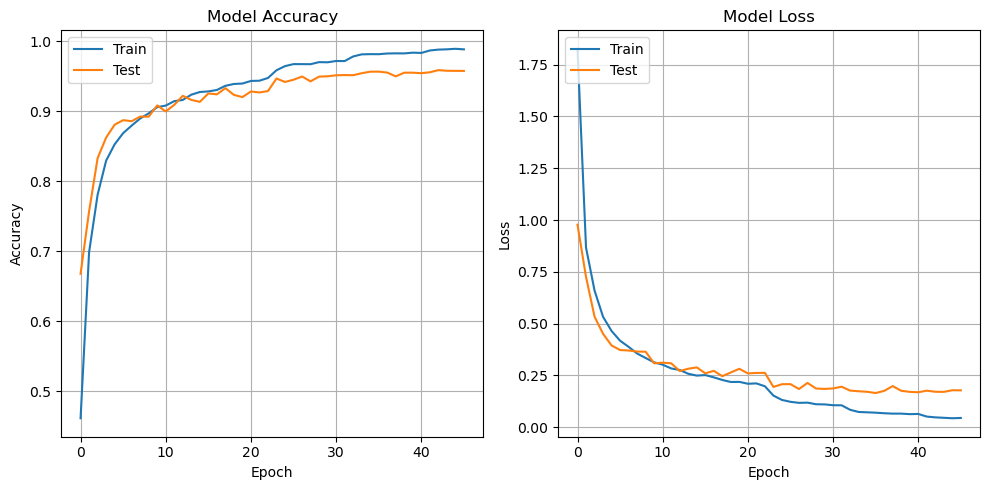

In [33]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.grid(True)
# Turn on the grid

plt.tight_layout()
plt.show()

In [34]:
loss, acc = sa4_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Adam model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9572 - loss: 0.1849
Restored model, accuracy of Adam model: 95.74%


# **Nadam**

In [35]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, BatchNormalization
from keras.models import Model
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import tensorflow as tf

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa10_model = custom_model()
sa10_model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)



# Add this callback to your list of callbacks
callbacks = [early_stopping, lr_reduction]

# Change the optimizer to Nadam
opt = Nadam()

# Compile the model
sa10_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_10 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_10 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_10[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_10 (Dropout)          │ (None, 180, 128)          │               0 │ activation_10[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_11 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_10[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_11 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_11[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_11 (Dropout)          │ (None, 180, 128)          │               0 │ activation_11[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_5               │ (None, 60, 128)           │               0 │ dropout_11[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_12 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_5[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_12 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_12[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_12 (Dropout)          │ (None, 60, 128)           │               0 │ activation_12[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_13 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_12[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_13 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_13[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_13 (Dropout)          │ (None, 60, 128)           │               0 │ activation_13[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_6               │ (None, 20, 128)           │               0 │ dropout_13[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_8 (Conv1D)             │ (None, 180, 128)          │             768 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Train the model with the new settings
history = sa10_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test), callbacks=callbacks)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 134s 392ms/step - accuracy: 0.3848 - loss: 2.9235 - val_accuracy: 0.6960 - val_loss: 0.9333 - learning_rate: 0.0010
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 124s 380ms/step - accuracy: 0.7268 - loss: 0.8307 - val_accuracy: 0.7857 - val_loss: 0.6638 - learning_rate: 0.0010
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 129s 395ms/step - accuracy: 0.8095 - loss: 0.5875 - val_accuracy: 0.8647 - val_loss: 0.4452 - learning_rate: 0.0010
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 127s 389ms/step - accuracy: 0.8517 - loss: 0.4636 - val_accuracy: 0.8687 - val_loss: 0.4137 - learning_rate: 0.0010
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 415ms/step - accuracy: 0.8709 - loss: 0.4055 - val_accuracy: 0.8945 - val_loss: 0.3485 - learning_rate: 0.0010
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 131s 403ms/step - accuracy: 0.8837 - loss: 0.3648 - val_accuracy: 0.8893 - val_loss: 0.3539 - learning_rate: 0.0010
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 134s 412ms/step -

Epoch 42/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 127s 390ms/step - accuracy: 0.9856 - loss: 0.0606 - val_accuracy: 0.9599 - val_loss: 0.1661 - learning_rate: 2.5000e-04
Epoch 43/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 126s 388ms/step - accuracy: 0.9868 - loss: 0.0505 - val_accuracy: 0.9570 - val_loss: 0.1815 - learning_rate: 2.5000e-04
Epoch 44/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 126s 387ms/step - accuracy: 0.9880 - loss: 0.0462 - val_accuracy: 0.9597 - val_loss: 0.1774 - learning_rate: 2.5000e-04
Epoch 45/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 128s 394ms/step - accuracy: 0.9884 - loss: 0.0460 - val_accuracy: 0.9576 - val_loss: 0.1795 - learning_rate: 2.5000e-04
Epoch 46/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 132s 406ms/step - accuracy: 0.9882 - loss: 0.0458 - val_accuracy: 0.9591 - val_loss: 0.1651 - learning_rate: 2.5000e-04
Epoch 47/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 128s 394ms/step - accuracy: 0.9898 - loss: 0.0408 - val_accuracy: 0.9577 - val_loss: 0.1733 - learning_rate: 2.5000e-04
Epoch 48/100
326/326 ━━━━━━━

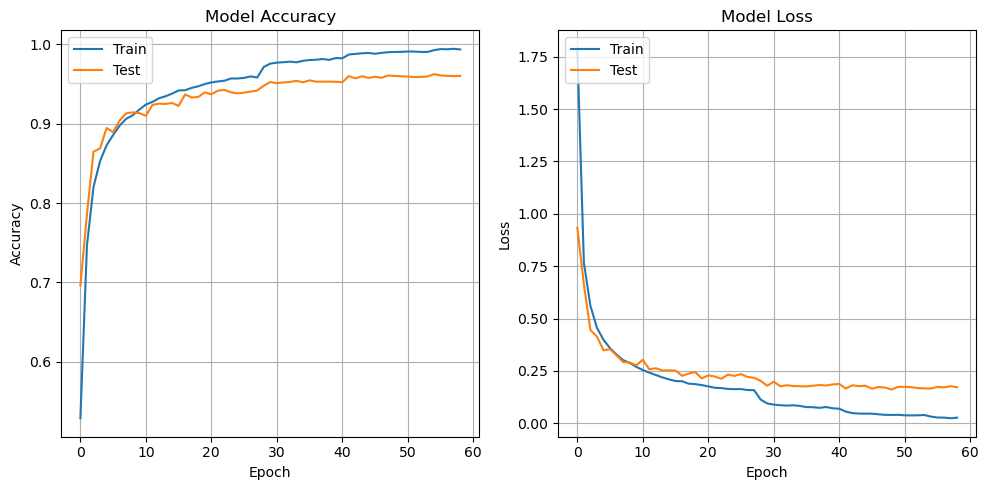

In [37]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)


# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

In [38]:
loss, acc = sa10_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Nadam model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9594 - loss: 0.1813
Restored model, accuracy of Nadam model: 96.02%


# RMSprop()

In [39]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2
from keras.optimizers import Nadam

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa3_model = custom_model()
sa3_model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)



# Add this callback to your list of callbacks
callbacks = [early_stopping, lr_reduction]

# Change the optimizer to  RMSprop
opt = RMSprop()

# Compile the model
sa3_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_18 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_18 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_18[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_18 (Dropout)          │ (None, 180, 128)          │               0 │ activation_18[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_19 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_18[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_19 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_19[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_19 (Dropout)          │ (None, 180, 128)          │               0 │ activation_19[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_9               │ (None, 60, 128)           │               0 │ dropout_19[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_20 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_20 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_20[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_20 (Dropout)          │ (None, 60, 128)           │               0 │ activation_20[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_21 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_20[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_21 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_21[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_21 (Dropout)          │ (None, 60, 128)           │               0 │ activation_21[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_10              │ (None, 20, 128)           │               0 │ dropout_21[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_16 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Train the model with the new settings
history = sa3_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test), callbacks=callbacks)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 138s 409ms/step - accuracy: 0.2908 - loss: 2.8381 - val_accuracy: 0.5417 - val_loss: 1.2763 - learning_rate: 0.0010
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 130s 399ms/step - accuracy: 0.5512 - loss: 1.2338 - val_accuracy: 0.6681 - val_loss: 0.9473 - learning_rate: 0.0010
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 129s 396ms/step - accuracy: 0.6691 - loss: 0.9336 - val_accuracy: 0.6788 - val_loss: 0.9263 - learning_rate: 0.0010
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 134s 412ms/step - accuracy: 0.7205 - loss: 0.8057 - val_accuracy: 0.7606 - val_loss: 0.7284 - learning_rate: 0.0010
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 129s 394ms/step - accuracy: 0.7604 - loss: 0.7098 - val_accuracy: 0.7923 - val_loss: 0.6442 - learning_rate: 0.0010
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 129s 397ms/step - accuracy: 0.7925 - loss: 0.6293 - val_accuracy: 0.8023 - val_loss: 0.6254 - learning_rate: 0.0010
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 134s 412ms/step -

Epoch 44/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 139s 426ms/step - accuracy: 0.9618 - loss: 0.1567 - val_accuracy: 0.9457 - val_loss: 0.2172 - learning_rate: 0.0010
Epoch 45/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 139s 425ms/step - accuracy: 0.9628 - loss: 0.1525 - val_accuracy: 0.9449 - val_loss: 0.2289 - learning_rate: 0.0010
Epoch 46/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 138s 424ms/step - accuracy: 0.9629 - loss: 0.1524 - val_accuracy: 0.9463 - val_loss: 0.2292 - learning_rate: 0.0010
Epoch 47/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 140s 431ms/step - accuracy: 0.9647 - loss: 0.1478 - val_accuracy: 0.9416 - val_loss: 0.2585 - learning_rate: 0.0010
Epoch 48/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 139s 426ms/step - accuracy: 0.9656 - loss: 0.1433 - val_accuracy: 0.9427 - val_loss: 0.2336 - learning_rate: 0.0010
Epoch 49/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9631 - loss: 0.1456
Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
326/326 ━━━━━━━━━━━━━━━━━━━━ 138s 425ms/ste

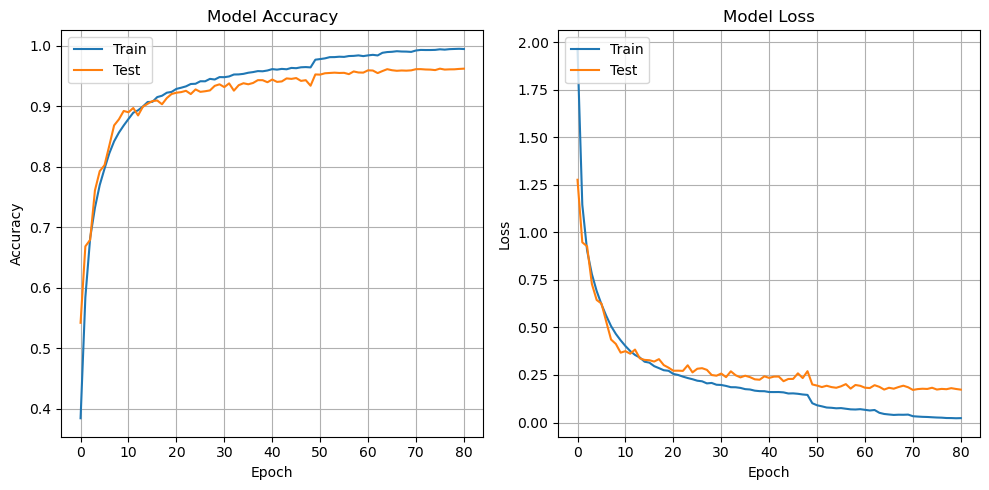

In [41]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
loss, acc = sa3_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of RMSprop model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9608 - loss: 0.1798
Restored model, accuracy of RMSprop model: 96.18%


# **Adamax()**

In [43]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import Adamax
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa1_model = custom_model()
sa1_model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)



# Add this callback to your list of callbacks
callbacks = [early_stopping, lr_reduction]


# Change the optimizer to Adamax
opt = Adamax()

# Compile the model
sa1_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_26 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_26 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_26[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_26 (Dropout)          │ (None, 180, 128)          │               0 │ activation_26[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_27 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_26[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_27 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_27[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_27 (Dropout)          │ (None, 180, 128)          │               0 │ activation_27[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_13              │ (None, 60, 128)           │               0 │ dropout_27[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_28 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_13[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_28 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_28[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_28 (Dropout)          │ (None, 60, 128)           │               0 │ activation_28[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_29 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_28[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_29 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_29[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_29 (Dropout)          │ (None, 60, 128)           │               0 │ activation_29[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_14              │ (None, 20, 128)           │               0 │ dropout_29[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_24 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Train the model with the new settings
history = sa1_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test), callbacks=callbacks)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 147s 435ms/step - accuracy: 0.3343 - loss: 3.2602 - val_accuracy: 0.6188 - val_loss: 1.3564 - learning_rate: 0.0010
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 143s 439ms/step - accuracy: 0.6065 - loss: 1.3216 - val_accuracy: 0.7082 - val_loss: 1.0124 - learning_rate: 0.0010
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 144s 441ms/step - accuracy: 0.6943 - loss: 1.0158 - val_accuracy: 0.7357 - val_loss: 0.8824 - learning_rate: 0.0010
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 146s 447ms/step - accuracy: 0.7353 - loss: 0.8725 - val_accuracy: 0.7800 - val_loss: 0.7618 - learning_rate: 0.0010
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 141s 432ms/step - accuracy: 0.7723 - loss: 0.7458 - val_accuracy: 0.8265 - val_loss: 0.6186 - learning_rate: 0.0010
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 134s 411ms/step - accuracy: 0.8094 - loss: 0.6516 - val_accuracy: 0.8454 - val_loss: 0.5515 - learning_rate: 0.0010
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 414ms/step -

Epoch 44/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 139s 426ms/step - accuracy: 0.9658 - loss: 0.1189 - val_accuracy: 0.9497 - val_loss: 0.1855 - learning_rate: 0.0010
Epoch 45/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 138s 422ms/step - accuracy: 0.9638 - loss: 0.1236 - val_accuracy: 0.9507 - val_loss: 0.1798 - learning_rate: 0.0010
Epoch 46/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 137s 419ms/step - accuracy: 0.9688 - loss: 0.1125 - val_accuracy: 0.9493 - val_loss: 0.1779 - learning_rate: 0.0010
Epoch 47/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 137s 420ms/step - accuracy: 0.9671 - loss: 0.1141 - val_accuracy: 0.9478 - val_loss: 0.1801 - learning_rate: 0.0010
Epoch 48/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 137s 421ms/step - accuracy: 0.9666 - loss: 0.1172 - val_accuracy: 0.9491 - val_loss: 0.1803 - learning_rate: 0.0010
Epoch 49/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 139s 426ms/step - accuracy: 0.9678 - loss: 0.1111 - val_accuracy: 0.9464 - val_loss: 0.1864 - learning_rate: 0.0010
Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 138s 423ms

326/326 ━━━━━━━━━━━━━━━━━━━━ 143s 439ms/step - accuracy: 0.9898 - loss: 0.0442 - val_accuracy: 0.9633 - val_loss: 0.1462 - learning_rate: 1.2500e-04
Epoch 84/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 144s 440ms/step - accuracy: 0.9911 - loss: 0.0385 - val_accuracy: 0.9631 - val_loss: 0.1463 - learning_rate: 1.2500e-04
Epoch 85/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 143s 439ms/step - accuracy: 0.9917 - loss: 0.0375 - val_accuracy: 0.9626 - val_loss: 0.1479 - learning_rate: 1.2500e-04
Epoch 86/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 143s 440ms/step - accuracy: 0.9916 - loss: 0.0362 - val_accuracy: 0.9625 - val_loss: 0.1512 - learning_rate: 1.2500e-04
Epoch 87/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 144s 441ms/step - accuracy: 0.9910 - loss: 0.0378 - val_accuracy: 0.9639 - val_loss: 0.1472 - learning_rate: 1.2500e-04
Epoch 88/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9922 - loss: 0.0354
Epoch 88: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
326/326 ━━━━━━━━━━━━━━━━━━━━ 144s 441

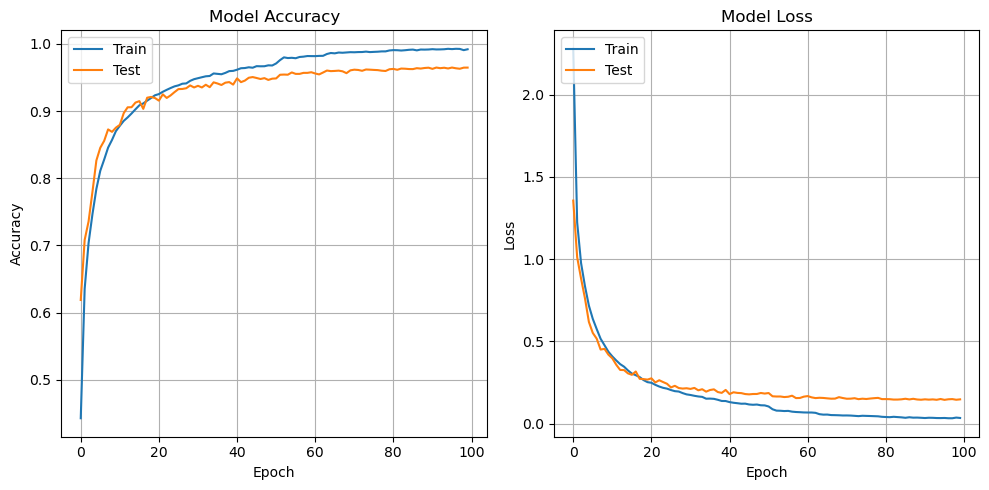

In [45]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
loss, acc = sa1_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Adamax model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9641 - loss: 0.1561
Restored model, accuracy of Adamax model: 96.48%


# **Adagrad()**

In [47]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import Adagrad
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa6_model = custom_model()
sa6_model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)



# Add this callback to your list of callbacks
callbacks = [early_stopping, lr_reduction]

# Change the optimizer to  Adagrad
opt = Adagrad()

# Compile the model
sa6_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_34 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_34 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_34[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_34 (Dropout)          │ (None, 180, 128)          │               0 │ activation_34[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_35 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_34[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_35 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_35[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_35 (Dropout)          │ (None, 180, 128)          │               0 │ activation_35[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_17              │ (None, 60, 128)           │               0 │ dropout_35[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_36 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_17[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_36 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_36[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_36 (Dropout)          │ (None, 60, 128)           │               0 │ activation_36[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_37 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_36[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_37 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_37[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_37 (Dropout)          │ (None, 60, 128)           │               0 │ activation_37[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_18              │ (None, 20, 128)           │               0 │ dropout_37[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_32 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Train the model with the new settings
history = sa6_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test), callbacks=callbacks)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 153s 454ms/step - accuracy: 0.1516 - loss: 6.0912 - val_accuracy: 0.1554 - val_loss: 5.9201 - learning_rate: 0.0010
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 146s 449ms/step - accuracy: 0.1720 - loss: 5.8717 - val_accuracy: 0.2325 - val_loss: 5.7384 - learning_rate: 0.0010
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 145s 446ms/step - accuracy: 0.2126 - loss: 5.6936 - val_accuracy: 0.2534 - val_loss: 5.5649 - learning_rate: 0.0010
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 145s 446ms/step - accuracy: 0.2466 - loss: 5.5200 - val_accuracy: 0.2538 - val_loss: 5.3875 - learning_rate: 0.0010
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 146s 448ms/step - accuracy: 0.2514 - loss: 5.3402 - val_accuracy: 0.2710 - val_loss: 5.1996 - learning_rate: 0.0010
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 146s 449ms/step - accuracy: 0.2623 - loss: 5.1471 - val_accuracy: 0.2927 - val_loss: 5.0012 - learning_rate: 0.0010
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 146s 448ms/step -

Epoch 44/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 154s 472ms/step - accuracy: 0.6112 - loss: 1.8797 - val_accuracy: 0.6464 - val_loss: 1.7866 - learning_rate: 0.0010
Epoch 45/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 152s 466ms/step - accuracy: 0.6128 - loss: 1.8434 - val_accuracy: 0.6383 - val_loss: 1.7715 - learning_rate: 0.0010
Epoch 46/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 152s 465ms/step - accuracy: 0.6149 - loss: 1.8099 - val_accuracy: 0.6510 - val_loss: 1.7321 - learning_rate: 0.0010
Epoch 47/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 152s 465ms/step - accuracy: 0.6204 - loss: 1.7744 - val_accuracy: 0.6598 - val_loss: 1.6892 - learning_rate: 0.0010
Epoch 48/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 152s 467ms/step - accuracy: 0.6166 - loss: 1.7523 - val_accuracy: 0.6617 - val_loss: 1.6621 - learning_rate: 0.0010
Epoch 49/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 152s 466ms/step - accuracy: 0.6261 - loss: 1.7204 - val_accuracy: 0.6581 - val_loss: 1.6411 - learning_rate: 0.0010
Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 152s 467ms

Epoch 87/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 160s 492ms/step - accuracy: 0.7116 - loss: 1.0784 - val_accuracy: 0.7521 - val_loss: 0.9995 - learning_rate: 0.0010
Epoch 88/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 161s 494ms/step - accuracy: 0.7091 - loss: 1.0714 - val_accuracy: 0.7437 - val_loss: 1.0076 - learning_rate: 0.0010
Epoch 89/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 162s 496ms/step - accuracy: 0.7159 - loss: 1.0613 - val_accuracy: 0.7531 - val_loss: 0.9874 - learning_rate: 0.0010
Epoch 90/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 165s 506ms/step - accuracy: 0.7149 - loss: 1.0508 - val_accuracy: 0.7454 - val_loss: 0.9898 - learning_rate: 0.0010
Epoch 91/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 162s 497ms/step - accuracy: 0.7229 - loss: 1.0392 - val_accuracy: 0.7491 - val_loss: 0.9786 - learning_rate: 0.0010
Epoch 92/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 162s 498ms/step - accuracy: 0.7189 - loss: 1.0357 - val_accuracy: 0.7495 - val_loss: 0.9671 - learning_rate: 0.0010
Epoch 93/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 162s 498ms

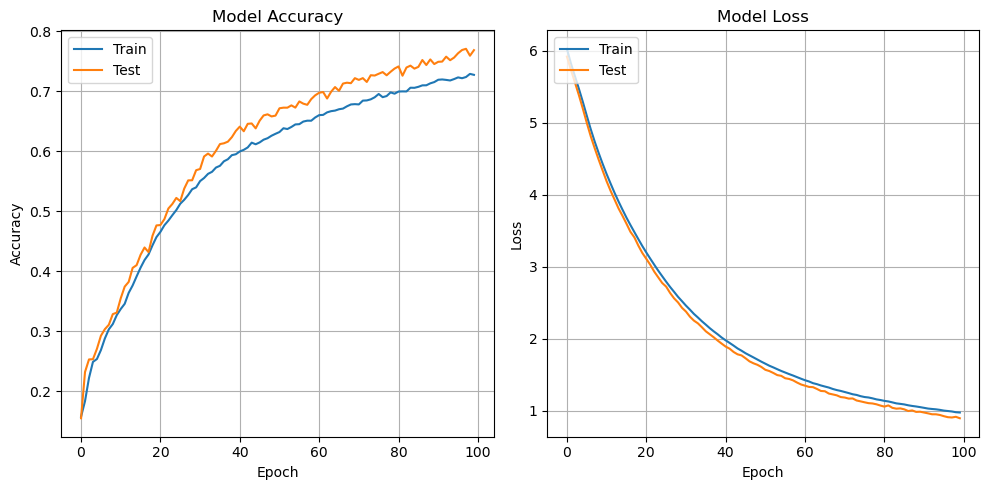

In [49]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
loss, acc = sa6_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Adagrad model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.7673 - loss: 0.9045
Restored model, accuracy of Adagrad model: 76.85%


# **Adadelta()**

In [51]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa7_model = custom_model()
sa7_model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)



# Add this callback to your list of callbacks
callbacks = [early_stopping, lr_reduction]

# Change the optimizer to Adadelta
opt = Adadelta()

# Compile the model
sa7_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_42 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_42 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_42[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_42 (Dropout)          │ (None, 180, 128)          │               0 │ activation_42[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_43 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_42[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_43 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_43[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_43 (Dropout)          │ (None, 180, 128)          │               0 │ activation_43[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_21              │ (None, 60, 128)           │               0 │ dropout_43[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_44 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_21[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_44 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_44[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_44 (Dropout)          │ (None, 60, 128)           │               0 │ activation_44[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_45 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_44[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_45 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_45[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_45 (Dropout)          │ (None, 60, 128)           │               0 │ activation_45[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_22              │ (None, 20, 128)           │               0 │ dropout_45[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_40 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train the model with the new settings
history = sa7_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test), callbacks=callbacks)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 174s 519ms/step - accuracy: 0.1553 - loss: 6.1244 - val_accuracy: 0.1568 - val_loss: 6.0790 - learning_rate: 0.0010
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 169s 517ms/step - accuracy: 0.1609 - loss: 6.0594 - val_accuracy: 0.1534 - val_loss: 6.0165 - learning_rate: 0.0010
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 169s 518ms/step - accuracy: 0.1599 - loss: 5.9979 - val_accuracy: 0.1522 - val_loss: 5.9576 - learning_rate: 0.0010
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 169s 518ms/step - accuracy: 0.1586 - loss: 5.9392 - val_accuracy: 0.1521 - val_loss: 5.9016 - learning_rate: 0.0010
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 169s 519ms/step - accuracy: 0.1593 - loss: 5.8849 - val_accuracy: 0.1531 - val_loss: 5.8482 - learning_rate: 0.0010
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 169s 520ms/step - accuracy: 0.1608 - loss: 5.8314 - val_accuracy: 0.1538 - val_loss: 5.7968 - learning_rate: 0.0010
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 169s 518ms/step -

Epoch 44/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 179s 551ms/step - accuracy: 0.2947 - loss: 4.2442 - val_accuracy: 0.2896 - val_loss: 4.2042 - learning_rate: 0.0010
Epoch 45/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 180s 552ms/step - accuracy: 0.2973 - loss: 4.2093 - val_accuracy: 0.2915 - val_loss: 4.1675 - learning_rate: 0.0010
Epoch 46/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 182s 557ms/step - accuracy: 0.2971 - loss: 4.1749 - val_accuracy: 0.2914 - val_loss: 4.1359 - learning_rate: 0.0010
Epoch 47/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 180s 552ms/step - accuracy: 0.3033 - loss: 4.1392 - val_accuracy: 0.2953 - val_loss: 4.1013 - learning_rate: 0.0010
Epoch 48/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 180s 551ms/step - accuracy: 0.3083 - loss: 4.1050 - val_accuracy: 0.3030 - val_loss: 4.0662 - learning_rate: 0.0010
Epoch 49/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 181s 556ms/step - accuracy: 0.3102 - loss: 4.0714 - val_accuracy: 0.3081 - val_loss: 4.0335 - learning_rate: 0.0010
Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 182s 560ms

Epoch 87/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 196s 600ms/step - accuracy: 0.3823 - loss: 3.1661 - val_accuracy: 0.3839 - val_loss: 3.1172 - learning_rate: 0.0010
Epoch 88/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 196s 603ms/step - accuracy: 0.3814 - loss: 3.1406 - val_accuracy: 0.3866 - val_loss: 3.0998 - learning_rate: 0.0010
Epoch 89/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 197s 603ms/step - accuracy: 0.3824 - loss: 3.1269 - val_accuracy: 0.3853 - val_loss: 3.0826 - learning_rate: 0.0010
Epoch 90/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 197s 603ms/step - accuracy: 0.3835 - loss: 3.1116 - val_accuracy: 0.3848 - val_loss: 3.0677 - learning_rate: 0.0010
Epoch 91/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 198s 608ms/step - accuracy: 0.3900 - loss: 3.0933 - val_accuracy: 0.3901 - val_loss: 3.0446 - learning_rate: 0.0010
Epoch 92/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 197s 604ms/step - accuracy: 0.3883 - loss: 3.0775 - val_accuracy: 0.3947 - val_loss: 3.0264 - learning_rate: 0.0010
Epoch 93/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 198s 606ms

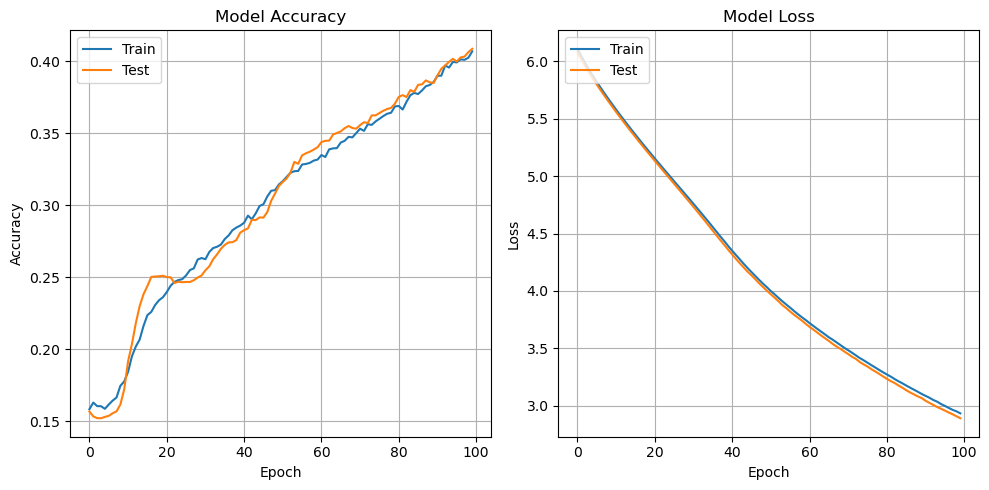

In [53]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
loss, acc = sa7_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of Adadelta model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.4067 - loss: 2.8982
Restored model, accuracy of Adadelta model: 40.85%


# **SGD()**

In [55]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa8_model = custom_model()
sa8_model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)



# Add this callback to your list of callbacks
callbacks = [early_stopping, lr_reduction]

# Change the optimizer to SGD
opt = SGD()

# Compile the model
sa8_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_50 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_50 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_50[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_50 (Dropout)          │ (None, 180, 128)          │               0 │ activation_50[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_51 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_50[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_51 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_51[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_51 (Dropout)          │ (None, 180, 128)          │               0 │ activation_51[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_25              │ (None, 60, 128)           │               0 │ dropout_51[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_52 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_25[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_52 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_52[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_52 (Dropout)          │ (None, 60, 128)           │               0 │ activation_52[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_53 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_52[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_53 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_53[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_53 (Dropout)          │ (None, 60, 128)           │               0 │ activation_53[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_26              │ (None, 20, 128)           │               0 │ dropout_53[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_48 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Train the model with the new settings
history = sa8_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test), callbacks=callbacks)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 205s 620ms/step - accuracy: 0.1737 - loss: 5.9734 - val_accuracy: 0.2248 - val_loss: 5.5261 - learning_rate: 0.0100
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 201s 617ms/step - accuracy: 0.2499 - loss: 5.3855 - val_accuracy: 0.2801 - val_loss: 4.9280 - learning_rate: 0.0100
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 201s 617ms/step - accuracy: 0.2992 - loss: 4.7850 - val_accuracy: 0.3519 - val_loss: 4.3837 - learning_rate: 0.0100
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 201s 616ms/step - accuracy: 0.3372 - loss: 4.2953 - val_accuracy: 0.3691 - val_loss: 3.9900 - learning_rate: 0.0100
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 200s 613ms/step - accuracy: 0.3820 - loss: 3.8605 - val_accuracy: 0.4270 - val_loss: 3.5644 - learning_rate: 0.0100
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 200s 613ms/step - accuracy: 0.4293 - loss: 3.4878 - val_accuracy: 0.4726 - val_loss: 3.2002 - learning_rate: 0.0100
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 200s 615ms/step -

Epoch 44/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 251s 771ms/step - accuracy: 0.8216 - loss: 0.5669 - val_accuracy: 0.8324 - val_loss: 0.5411 - learning_rate: 0.0100
Epoch 45/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 245s 751ms/step - accuracy: 0.8260 - loss: 0.5523 - val_accuracy: 0.8454 - val_loss: 0.5197 - learning_rate: 0.0100
Epoch 46/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 244s 750ms/step - accuracy: 0.8250 - loss: 0.5581 - val_accuracy: 0.8571 - val_loss: 0.4889 - learning_rate: 0.0100
Epoch 47/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 244s 749ms/step - accuracy: 0.8281 - loss: 0.5409 - val_accuracy: 0.8442 - val_loss: 0.5089 - learning_rate: 0.0100
Epoch 48/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 262s 803ms/step - accuracy: 0.8321 - loss: 0.5330 - val_accuracy: 0.8490 - val_loss: 0.4906 - learning_rate: 0.0100
Epoch 49/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 216s 661ms/step - accuracy: 0.8322 - loss: 0.5290 - val_accuracy: 0.8377 - val_loss: 0.5223 - learning_rate: 0.0100
Epoch 50/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 210s 646ms

Epoch 86/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 221s 678ms/step - accuracy: 0.9029 - loss: 0.3240 - val_accuracy: 0.9106 - val_loss: 0.3097 - learning_rate: 0.0050
Epoch 87/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 220s 675ms/step - accuracy: 0.9068 - loss: 0.3202 - val_accuracy: 0.9083 - val_loss: 0.3139 - learning_rate: 0.0050
Epoch 88/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 220s 675ms/step - accuracy: 0.9069 - loss: 0.3135 - val_accuracy: 0.9069 - val_loss: 0.3167 - learning_rate: 0.0050
Epoch 89/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 220s 677ms/step - accuracy: 0.9056 - loss: 0.3158 - val_accuracy: 0.9086 - val_loss: 0.3129 - learning_rate: 0.0050
Epoch 90/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 223s 684ms/step - accuracy: 0.9027 - loss: 0.3180 - val_accuracy: 0.9064 - val_loss: 0.3148 - learning_rate: 0.0050
Epoch 91/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.9049 - loss: 0.3186
Epoch 91: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
326/326 ━━━━━━━━━━━━━━━━━━━━ 220s 674ms/ste

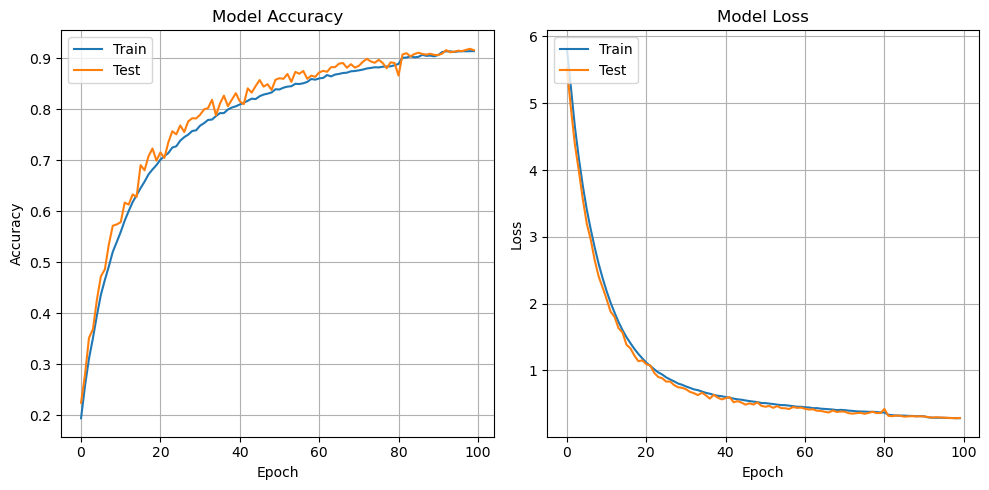

In [57]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
loss, acc = sa8_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of SGD model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.9146 - loss: 0.2913
Restored model, accuracy of SGD model: 91.55%
